# Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as patches
import seaborn as sns
import datetime as dt
from matplotlib.ticker import FuncFormatter
from babel.numbers import format_currency
from unidecode import unidecode

In [ ]:
def commas(x):
    if pd.isna(x):
        return x
    elif isinstance(x, float):
        return f"{x:,.2f}"
    elif isinstance(x, int):
        return f"{x:,}"
    else:
        return x
    
def thousands_formatter(x, _):
    if x >= 1_000_000:
        return f'{x/1_000_000:.1f}M'
    if x >= 1000:
        return f'{x:,.0f}'
    return str(int(x))

pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)


# Data Analyst

## Gathering Data

In [3]:
customer_dataset_df = pd.read_csv(r'C:\Users\farid\VSCode\Data Analyst\Dataset\Dataset - E-commerce Public\customers_dataset.csv')
geolocation_dataset_df = pd.read_csv(r'C:\Users\farid\VSCode\Data Analyst\Dataset\Dataset - E-commerce Public\geolocation_dataset.csv')
product_dataset_df = pd.read_csv(r'C:\Users\farid\VSCode\Data Analyst\Dataset\Dataset - E-commerce Public\products_dataset.csv')
product_category_name_df = pd.read_csv(r'C:\Users\farid\VSCode\Data Analyst\Dataset\Dataset - E-commerce Public\product_category_name_translation.csv')
sellers_dataset_df = pd.read_csv(r'C:\Users\farid\VSCode\Data Analyst\Dataset\Dataset - E-commerce Public\sellers_dataset.csv')
order_items_dataset_df = pd.read_csv(r'C:\Users\farid\VSCode\Data Analyst\Dataset\Dataset - E-commerce Public\order_items_dataset.csv')
order_dataset_df = pd.read_csv(r'C:\Users\farid\VSCode\Data Analyst\Dataset\Dataset - E-commerce Public\orders_dataset.csv')
order_payments_dataset_df = pd.read_csv(r'C:\Users\farid\VSCode\Data Analyst\Dataset\Dataset - E-commerce Public\order_payments_dataset.csv')
order_review_dataset_df = pd.read_csv(r'C:\Users\farid\VSCode\Data Analyst\Dataset\Dataset - E-commerce Public\order_reviews_dataset.csv')

In [4]:
product_category_name_df.loc[len(product_category_name_df)] = ['portateis_cozinha_e_preparadores_de_alimentos', 'portable_kitchen_food_preparers']
product_category_name_df.loc[len(product_category_name_df)] = ['pc_gamer', 'pc_gamer']

In [5]:
merged = pd.merge(customer_dataset_df, order_dataset_df, on='customer_id', how='left')
merged_df = pd.merge(merged, order_review_dataset_df, on='order_id', how='left')
merged_df = pd.merge(merged_df, order_payments_dataset_df, on='order_id', how='left')
merged_df = pd.merge(merged_df, order_items_dataset_df, on='order_id', how='left')
merged_df = pd.merge(merged_df, product_dataset_df, on='product_id', how='left')
merged_df = pd.merge(merged_df, sellers_dataset_df, on='seller_id', how='left')
merged_df = pd.merge(merged_df, geolocation_dataset_df, left_on='seller_zip_code_prefix',right_on='geolocation_zip_code_prefix', how='left')
merged_df = pd.merge(merged_df, product_category_name_df, on='product_category_name', how='left')

## Data Cleaning and Manipulation

### Drop Duplicates

In [6]:
merged_df.duplicated().sum()

np.int64(4208445)

In [7]:
merged_df.drop_duplicates(subset=['order_id'], keep='last', inplace=True)

In [8]:
merged_df.duplicated().sum()

np.int64(0)

### Data Type

In [9]:
df_datetime = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date", 'review_creation_date', 'review_answer_timestamp', 'shipping_limit_date']
merged_df[df_datetime] = merged_df[df_datetime].apply(pd.to_datetime)
merged_df[df_datetime] = merged_df[df_datetime].apply(lambda x: x.dt.date)
merged_df[df_datetime] = merged_df[df_datetime].apply(pd.to_datetime)

merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99441 entries, 138 to 17094340
Data columns (total 45 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer_id                    99441 non-null  object        
 1   customer_unique_id             99441 non-null  object        
 2   customer_zip_code_prefix       99441 non-null  int64         
 3   customer_city                  99441 non-null  object        
 4   customer_state                 99441 non-null  object        
 5   order_id                       99441 non-null  object        
 6   order_status                   99441 non-null  object        
 7   order_purchase_timestamp       99441 non-null  datetime64[ns]
 8   order_approved_at              99281 non-null  datetime64[ns]
 9   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 10  order_delivered_customer_date  96476 non-null  datetime64[ns]
 11  order_estimated

### Drop NaN and Fillna

In [10]:
merged_df.isna().sum()

customer_id                          0
customer_unique_id                   0
customer_zip_code_prefix             0
customer_city                        0
customer_state                       0
order_id                             0
order_status                         0
order_purchase_timestamp             0
order_approved_at                  160
order_delivered_carrier_date      1783
order_delivered_customer_date     2965
order_estimated_delivery_date        0
review_id                          768
review_score                       768
review_comment_title             87890
review_comment_message           58658
review_creation_date               768
review_answer_timestamp            768
payment_sequential                   1
payment_type                         1
payment_installments                 1
payment_value                        1
order_item_id                      775
product_id                         775
seller_id                          775
shipping_limit_date      

In [11]:
merged_df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,product_category_name_english
138,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16,2017-05-16,2017-05-23,2017-05-25,2017-06-05,88b8b52d46df026a9d1ad2136a59b30b,4.0,NaN,NaN,2017-05-26,2017-05-30,1.0,credit_card,2.0,146.87,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22,124.99,21.88,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,8577.0,itaquaquecetuba,SP,8577.0,-23.494316,-46.364539,itaquaquecetuba,SP,office_furniture
309,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12,2018-01-12,2018-01-15,2018-01-29,2018-02-06,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,NaN,NaN,2018-01-30,2018-02-10,1.0,credit_card,8.0,335.48,1.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18,289.00,46.48,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,88303.0,itajai,SC,88303.0,-26.913214,-48.677675,itajaí,SC,housewares
448,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19,2018-05-20,2018-06-11,2018-06-14,2018-06-13,5ad6695d76ee186dc473c42706984d87,5.0,NaN,NaN,2018-06-15,2018-06-15,1.0,credit_card,7.0,157.73,1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05,139.94,17.79,moveis_escritorio,55.0,955.0,1.0,8267.0,52.0,52.0,17.0,8577.0,itaquaquecetuba,SP,8577.0,-23.494316,-46.364539,itaquaquecetuba,SP,office_furniture
587,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13,2018-03-13,2018-03-27,2018-03-28,2018-04-10,059a801bb31f6aab2266e672cab87bc5,5.0,NaN,NaN,2018-03-29,2018-04-02,1.0,credit_card,1.0,173.30,1.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27,149.94,23.36,moveis_escritorio,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0,8577.0,itaquaquecetuba,SP,8577.0,-23.494316,-46.364539,itaquaquecetuba,SP,office_furniture
873,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29,2018-07-29,2018-07-30,2018-08-09,2018-08-15,8490879d58d6c5d7773f2739a03f089a,5.0,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10,2018-08-17,1.0,credit_card,8.0,252.25,1.0,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31,230.00,22.25,casa_conforto,61.0,407.0,1.0,5200.0,45.0,15.0,35.0,14940.0,ibitinga,SP,14940.0,-21.754867,-48.838906,ibitinga,SP,home_confort
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17093851,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07,2018-04-07,2018-04-11,2018-04-13,2018-04-25,36e2cdbaa9f639b57c53b37ac798fee8,4.0,Recomendo,NaN,2018-04-14,2018-04-28,1.0,credit_card,6.0,88.78,1.0,ccb4503d9d43d245d3b295d0544f988b,527801b552d0077ffd170872eb496

In [12]:
# Mengisi nilai NaN pada 'order_delivered_customer_date' berdasarkan kondisi 'order_status'
merged_df['order_delivered_customer_date'] = merged_df.apply(
    lambda row: row['order_estimated_delivery_date']
    if pd.isna(row['order_delivered_customer_date']) and row['order_status'] in ['shipped', 'invoiced', 'processing', 'delivered', 'approved']
    else (pd.NaT if row['order_status'] == 'canceled' else row['order_delivered_customer_date']),
    axis=1)

In [13]:
# Mengisi atau mengubah nilai di 'order_delivered_customer_date' sesuai dengan 'order_delivered_carrier_date'
merged_df['order_delivered_customer_date'] = merged_df.apply(
    lambda row: row['order_delivered_carrier_date'] 
    if pd.isna(row['order_delivered_customer_date']) 
    else row['order_delivered_customer_date'],
    axis=1
)

In [14]:
merged_df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,product_category_name_english
138,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16,2017-05-16,2017-05-23,2017-05-25,2017-06-05,88b8b52d46df026a9d1ad2136a59b30b,4.0,NaN,NaN,2017-05-26,2017-05-30,1.0,credit_card,2.0,146.87,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22,124.99,21.88,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,8577.0,itaquaquecetuba,SP,8577.0,-23.494316,-46.364539,itaquaquecetuba,SP,office_furniture
309,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12,2018-01-12,2018-01-15,2018-01-29,2018-02-06,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,NaN,NaN,2018-01-30,2018-02-10,1.0,credit_card,8.0,335.48,1.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18,289.00,46.48,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,88303.0,itajai,SC,88303.0,-26.913214,-48.677675,itajaí,SC,housewares
448,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19,2018-05-20,2018-06-11,2018-06-14,2018-06-13,5ad6695d76ee186dc473c42706984d87,5.0,NaN,NaN,2018-06-15,2018-06-15,1.0,credit_card,7.0,157.73,1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05,139.94,17.79,moveis_escritorio,55.0,955.0,1.0,8267.0,52.0,52.0,17.0,8577.0,itaquaquecetuba,SP,8577.0,-23.494316,-46.364539,itaquaquecetuba,SP,office_furniture
587,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13,2018-03-13,2018-03-27,2018-03-28,2018-04-10,059a801bb31f6aab2266e672cab87bc5,5.0,NaN,NaN,2018-03-29,2018-04-02,1.0,credit_card,1.0,173.30,1.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27,149.94,23.36,moveis_escritorio,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0,8577.0,itaquaquecetuba,SP,8577.0,-23.494316,-46.364539,itaquaquecetuba,SP,office_furniture
873,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29,2018-07-29,2018-07-30,2018-08-09,2018-08-15,8490879d58d6c5d7773f2739a03f089a,5.0,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10,2018-08-17,1.0,credit_card,8.0,252.25,1.0,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31,230.00,22.25,casa_conforto,61.0,407.0,1.0,5200.0,45.0,15.0,35.0,14940.0,ibitinga,SP,14940.0,-21.754867,-48.838906,ibitinga,SP,home_confort
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17093851,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07,2018-04-07,2018-04-11,2018-04-13,2018-04-25,36e2cdbaa9f639b57c53b37ac798fee8,4.0,Recomendo,NaN,2018-04-14,2018-04-28,1.0,credit_card,6.0,88.78,1.0,ccb4503d9d43d245d3b295d0544f988b,527801b552d0077ffd170872eb496

In [15]:
merged_df = merged_df[merged_df['order_status'] != 'unavailable']
merged_df = merged_df.dropna(subset=['product_category_name'])
merged_df['freight_value'] = merged_df['order_item_id'] * merged_df['freight_value']
merged_df['payment_value'] = (merged_df['order_item_id'] * merged_df['price']) + merged_df['freight_value']

In [16]:
import random

merged_df['review_score'] = merged_df['review_score'].fillna(merged_df.apply(lambda row: random.randint(1, 2) if row['order_status'] == 'canceled' else random.randint(1, 5) ,axis=1))
merged_df['review_comment_message'] = merged_df['review_comment_message'].fillna('no review')
merged_df['review_comment_title'] = merged_df['review_comment_title'].fillna('no review')
merged_df['review_id'] = merged_df['review_id'].fillna('no review')
merged_df['payment_type'] = merged_df['payment_type'].fillna('credit_card')

merged_df['review_creation_date'] = merged_df['review_creation_date'].fillna(merged_df['order_estimated_delivery_date'])
merged_df['review_answer_timestamp'] = merged_df['review_answer_timestamp'].fillna(merged_df['order_estimated_delivery_date'])
merged_df['geolocation_zip_code_prefix'] = merged_df['geolocation_zip_code_prefix'].fillna(merged_df['customer_zip_code_prefix'])
merged_df['geolocation_lat'] = merged_df['geolocation_lat'].fillna(method='ffill')
merged_df['geolocation_lng'] = merged_df['geolocation_lng'].fillna(method='ffill')
merged_df['geolocation_city'] = merged_df['geolocation_city'].fillna(merged_df['customer_city'])
merged_df['geolocation_state'] = merged_df['geolocation_state'].fillna(merged_df['customer_state'])
merged_df['order_approved_at'] = merged_df['order_approved_at'].fillna(merged_df['order_purchase_timestamp'])

merged_df[['payment_sequential', 'payment_installments']] = merged_df[['payment_sequential', 'payment_installments']].fillna(1)
merged_df[['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']] = merged_df[['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']].fillna(1)

C:\Users\farid\AppData\Local\Temp\ipykernel_7592\820069757.py:12: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_df['geolocation_lat'] = merged_df['geolocation_lat'].fillna(method='ffill')
C:\Users\farid\AppData\Local\Temp\ipykernel_7592\820069757.py:13: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_df['geolocation_lng'] = merged_df['geolocation_lng'].fillna(method='ffill')


In [17]:
merged_df.isna().sum()

customer_id                        0
customer_unique_id                 0
customer_zip_code_prefix           0
customer_city                      0
customer_state                     0
order_id                           0
order_status                       0
order_purchase_timestamp           0
order_approved_at                  0
order_delivered_carrier_date     970
order_delivered_customer_date    374
order_estimated_delivery_date      0
review_id                          0
review_score                       0
review_comment_title               0
review_comment_message             0
review_creation_date               0
review_answer_timestamp            0
payment_sequential                 0
payment_type                       0
payment_installments               0
payment_value                      0
order_item_id                      0
product_id                         0
seller_id                          0
shipping_limit_date                0
price                              0
f

In [18]:
df_int = ['customer_zip_code_prefix','review_score','payment_sequential','payment_installments','order_item_id','product_name_lenght','product_description_lenght','product_weight_g','product_length_cm','product_height_cm','product_width_cm','product_photos_qty','seller_zip_code_prefix','geolocation_zip_code_prefix']
merged_df[df_int] = merged_df[df_int].astype(int)
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97242 entries, 138 to 17094340
Data columns (total 45 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer_id                    97242 non-null  object        
 1   customer_unique_id             97242 non-null  object        
 2   customer_zip_code_prefix       97242 non-null  int64         
 3   customer_city                  97242 non-null  object        
 4   customer_state                 97242 non-null  object        
 5   order_id                       97242 non-null  object        
 6   order_status                   97242 non-null  object        
 7   order_purchase_timestamp       97242 non-null  datetime64[ns]
 8   order_approved_at              97242 non-null  datetime64[ns]
 9   order_delivered_carrier_date   96272 non-null  datetime64[ns]
 10  order_delivered_customer_date  96868 non-null  datetime64[ns]
 11  order_estimated

### Deleting 2016 and 2018 month 9 data because it can affect for analysis

In [19]:
merged_year = merged_df.groupby([merged_df['order_purchase_timestamp'].dt.year.rename('year'), merged_df['order_purchase_timestamp'].dt.month.rename('month')]).agg(
    total_order=('order_item_id', 'count')
).reset_index()

merged_year.set_index("year").map(commas)

,month,total_order
year,,
2016,9,3
2016,10,300
2016,12,1
2017,1,778
2017,2,"1,681"
2017,3,"2,587"
2017,4,"2,329"
2017,5,"3,576"
2017,6,"3,162"


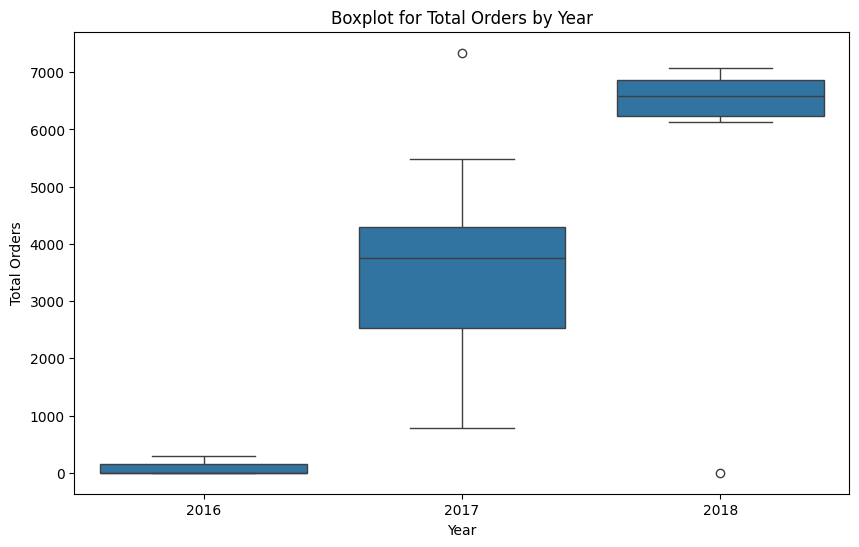

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the boxplot for total_order to detect outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x='year', y='total_order', data=merged_year)

# Customize plot
plt.title('Boxplot for Total Orders by Year')
plt.xlabel('Year')
plt.ylabel('Total Orders')

# Show plot
plt.show()

In [21]:
merged_df[(merged_df['order_purchase_timestamp'].dt.year == 2016) | ((merged_df['order_purchase_timestamp'].dt.year == 2018) & (merged_df['order_purchase_timestamp'].dt.month == 9))]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,product_category_name_english
58698,77069f163bef4933c6efeea244b3f606,99e41e69b60bd63edd83935499523063,21616,rio de janeiro,RJ,8213bc96304fc0881189c4525f3002f7,delivered,2016-10-10,2016-10-10,2016-10-14,2016-10-17,2016-12-02,4062b881e2dd16a2ea180333dcfbe5ca,5,no review,no review,2016-10-20,2016-10-21,1,credit_card,1,48.55,1,2504bf725d7aa06820b73b85c5ca6653,1554a68530182680ad5c8b042c3ab563,2016-10-14,32.99,15.56,utilidades_domesticas,44,250,2,1500,32,5,28,37580,monte siao,MG,37580,-22.432149,-46.582346,monte siao,MG,housewares
63700,17e6d37366dc8c8865588b0d1740d606,3c34090736785a45dd8cbf536ad289c4,86181,cambe,PR,3379d980824f0aa5dab057f2530759bb,delivered,2016-10-10,2016-10-12,2016-10-16,2016-10-19,2016-12-02,b977b767d10b380552343a815b19a490,5,no review,Excelente,2016-10-25,2016-10-26,1,boleto,1,87.90,1,33fac76e7f17367dedaef7954bbb33b4,56642bcb79900e777d68e91915cb4267,2016-10-16,72.00,15.90,beleza_saude,63,1113,2,550,20,20,20,3701,sao paulo,SP,3701,-23.512648,-46.550862,sao paulo,SP,health_beauty
130232,1013b3cb87e89aa951b7f556f8c26d33,0032c76b20340da25249092a268ce66c,13515,charqueada,SP,59fa27082bb77c5dbd8a6568f3b34380,delivered,2016-10-06,2016-10-06,2016-10-30,2016-11-01,2016-11-28,141e625514063d7a6df6b1254f735c0c,4,no review,"gostei do preço, e um produto com selo do Inme...",2016-11-02,2016-11-03,1,credit_card,1,144.94,1,4e0946aebc8e1d7521219ec1e7380aed,817f85dbb65aa3e70831d90fe75cdf89,2016-10-21,128.90,16.04,brinquedos,48,485,1,5470,48,27,42,18530,tiete,SP,18530,-23.112274,-47.716327,tiete,SP,toys
158859,edf0b9f3196ff6f4702be2d540f684d4,171d92af5bf025428dfc2fd869eb8a04,21715,rio de janeiro,RJ,e90f9a57c17a06b37c5830a2ab1bd209,delivered,2016-10-07,2016-10-08,2016-10-12,2016-10-15,2016-12-07,37e997267cf911f765204bbd5fa7aed3,5,no review,"Excelente, entrega dentro prazo.",2016-10-20,2016-10-21,1,boleto,1,611.56,1,6e2c62713ec17c681eacdf653dddb4e5,9df5750209b83567ec144eb299d7d634,2016-10-12,590.00,21.56,ferramentas_jardim,50,1430,5,300,17,4,11,93032,sao leopoldo,RS,93032,-29.772399,-51.132930,sao leopoldo,RS,garden_tools
327418,5bef68c4d2d04c09aee2195ff540f131,d8e40a4b16990a6fd1095feae46aa1af,13562,sao carlos,SP,719628a909505f12f342015fd53a8d43,delivered,2016-10-05,2016-10-06,2016-10-15,2016-10-18,2016-11-25,c4f839d01cffa0ee89d827f28c0c2fae,5,no review,no review,2016-10-19,2016-10-20,1,credit_card,4,40.86,1,407e01944d78001dbd21da4c2059b8dc,e8f6dc8e6a1dcde89d20e3995c8d90b3,2016-10-10,29.90,10.96,telefonia,51,1570,1,300,16,4,11,3476,sao paulo,SP,3476,-23.569821,-46.511502,sao paulo,SP,telephony
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16911327,0c63b4438ff050942153aaa4c19ad1d3,8ca747eb93e7b8d6a56532b8f074d185,38414,uberlandia,MG,12ca240539e7029e0328f0a410c12ad1,delivered,2016-10-10,2016-10-10,2016-10-14,2016-10-17,2016-12-02,132d7c47599263f5a0a604763bc6454b,4,no review,no review,2016-10-25,2016-11-12,1,credit_card,10,297.91,1,a25d948ddec359c8d80978d139a4db83,86bb7c4b535e49a541baf3266b1c95b1,2016-10-14,279.90,18.01,brinquedos,43,1784,2,900,38,24,38,14401,franca,SP,14401,-20.529029,-47.377951,franca,SP,toys
16938036,

In [22]:
merged_df = merged_df[merged_df['order_purchase_timestamp'].dt.year != 2016]
merged_df = merged_df[~((merged_df['order_purchase_timestamp'].dt.year == 2018) & (merged_df['order_purchase_timestamp'].dt.month == 9))]

In [23]:
merged_df[(merged_df['order_purchase_timestamp'].dt.year == 2016) | ((merged_df['order_purchase_timestamp'].dt.year == 2018) & (merged_df['order_purchase_timestamp'].dt.month == 9))]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,product_category_name_english


### Change language Brazil to English

In [24]:
# Mengganti dari bahasa Brazil ke bahasa Inggris
merged_df['product_category_name'] = merged_df['product_category_name_english']
merged_df = merged_df.drop(columns=['product_category_name_english'])
merged_df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
138,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16,2017-05-16,2017-05-23,2017-05-25,2017-06-05,88b8b52d46df026a9d1ad2136a59b30b,4,no review,no review,2017-05-26,2017-05-30,1,credit_card,2,146.87,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22,124.99,21.88,office_furniture,41,1141,1,8683,54,64,31,8577,itaquaquecetuba,SP,8577,-23.494316,-46.364539,itaquaquecetuba,SP
309,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12,2018-01-12,2018-01-15,2018-01-29,2018-02-06,02fc48a9efa3e3d0f1a8ea26507eeec3,5,no review,no review,2018-01-30,2018-02-10,1,credit_card,8,335.48,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18,289.00,46.48,housewares,43,1002,3,10150,89,15,40,88303,itajai,SC,88303,-26.913214,-48.677675,itajaí,SC
448,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19,2018-05-20,2018-06-11,2018-06-14,2018-06-13,5ad6695d76ee186dc473c42706984d87,5,no review,no review,2018-06-15,2018-06-15,1,credit_card,7,157.73,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05,139.94,17.79,office_furniture,55,955,1,8267,52,52,17,8577,itaquaquecetuba,SP,8577,-23.494316,-46.364539,itaquaquecetuba,SP
587,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13,2018-03-13,2018-03-27,2018-03-28,2018-04-10,059a801bb31f6aab2266e672cab87bc5,5,no review,no review,2018-03-29,2018-04-02,1,credit_card,1,173.30,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27,149.94,23.36,office_furniture,48,1066,1,12160,56,51,28,8577,itaquaquecetuba,SP,8577,-23.494316,-46.364539,itaquaquecetuba,SP
873,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29,2018-07-29,2018-07-30,2018-08-09,2018-08-15,8490879d58d6c5d7773f2739a03f089a,5,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10,2018-08-17,1,credit_card,8,252.25,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31,230.00,22.25,home_confort,61,407,1,5200,45,15,35,14940,ibitinga,SP,14940,-21.754867,-48.838906,ibitinga,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17093851,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07,2018-04-07,2018-04-11,2018-04-13,2018-04-25,36e2cdbaa9f639b57c53b37ac798fee8,4,Recomendo,no review,2018-04-14,2018-04-28,1,credit_card,6,88.78,1,ccb4503d9d43d245d3b295d0544f988b,527801b552d0077ffd170872eb49683b,2018-04-12,74.90,13.88,books_general_interest,51,489,2,611,22,22,23,17400,garca,SP,17400,-22.208468,-49.656367,garca,SP
17094079,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,tabo

### Fix unnecessary symbols and Text

In [25]:
df_unicode = ['geolocation_city', 'review_comment_title', 'review_comment_message']
merged_df[df_unicode] = merged_df[df_unicode].map(unidecode)

df_title = ['seller_city','order_status','customer_city','geolocation_city']
merged_df[df_title] = merged_df[df_title].apply(lambda col: col.str.title())

df_capitalize = ['review_comment_title','review_comment_message']
merged_df[df_capitalize] = merged_df[df_capitalize].apply(lambda col: col.str.capitalize())

df_replace = ['payment_type','product_category_name']
merged_df[df_replace] = merged_df[df_replace].apply(lambda col: col.str.replace('_', ' ', regex=False).str.title())

In [26]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96937 entries, 138 to 17094340
Data columns (total 44 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer_id                    96937 non-null  object        
 1   customer_unique_id             96937 non-null  object        
 2   customer_zip_code_prefix       96937 non-null  int64         
 3   customer_city                  96937 non-null  object        
 4   customer_state                 96937 non-null  object        
 5   order_id                       96937 non-null  object        
 6   order_status                   96937 non-null  object        
 7   order_purchase_timestamp       96937 non-null  datetime64[ns]
 8   order_approved_at              96937 non-null  datetime64[ns]
 9   order_delivered_carrier_date   95993 non-null  datetime64[ns]
 10  order_delivered_customer_date  96571 non-null  datetime64[ns]
 11  order_estimated

In [27]:
state_name = {
    'SP': 'São Paulo',
    'SC': 'Santa Catarina',
    'RJ': 'Rio de Janeiro',
    'PR': 'Paraná',
    'MG': 'Minas Gerais',
    'ES': 'Espírito Santo',
    'RS': 'Rio Grande do Sul',
    'DF': 'Distrito Federal',
    'PE': 'Pernambuco',
    'MA': 'Maranhão',
    'BA': 'Bahia',
    'GO': 'Goiás',
    'MT': 'Mato Grosso',
    'MS': 'Mato Grosso do Sul',
    'RO': 'Rondônia',
    'PB': 'Paraíba',
    'CE': 'Ceará',
    'PA': 'Pará',
    'RN': 'Rio Grande do Norte',
    'PI': 'Piauí',
    'SE': 'Sergipe',
    'AC': 'Acre',
    'AM': 'Amazonas',
    'AP': 'Amapá',
    'AL': 'Alagoas',
    'TO': 'Tocantins',
    'RR': 'Roraima'
}

merged_df.loc[:, ['customer_state', 'seller_state']] = merged_df[['customer_state', 'seller_state']].replace(state_name)

In [28]:
merged_df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
138,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Franca,São Paulo,00e7ee1b050b8499577073aeb2a297a1,Delivered,2017-05-16,2017-05-16,2017-05-23,2017-05-25,2017-06-05,88b8b52d46df026a9d1ad2136a59b30b,4,No review,No review,2017-05-26,2017-05-30,1,Credit Card,2,146.87,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22,124.99,21.88,Office Furniture,41,1141,1,8683,54,64,31,8577,Itaquaquecetuba,São Paulo,8577,-23.494316,-46.364539,Itaquaquecetuba,SP
309,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Sao Bernardo Do Campo,São Paulo,29150127e6685892b6eab3eec79f59c7,Delivered,2018-01-12,2018-01-12,2018-01-15,2018-01-29,2018-02-06,02fc48a9efa3e3d0f1a8ea26507eeec3,5,No review,No review,2018-01-30,2018-02-10,1,Credit Card,8,335.48,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18,289.00,46.48,Housewares,43,1002,3,10150,89,15,40,88303,Itajai,Santa Catarina,88303,-26.913214,-48.677675,Itajai,SC
448,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Sao Paulo,São Paulo,b2059ed67ce144a36e2aa97d2c9e9ad2,Delivered,2018-05-19,2018-05-20,2018-06-11,2018-06-14,2018-06-13,5ad6695d76ee186dc473c42706984d87,5,No review,No review,2018-06-15,2018-06-15,1,Credit Card,7,157.73,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05,139.94,17.79,Office Furniture,55,955,1,8267,52,52,17,8577,Itaquaquecetuba,São Paulo,8577,-23.494316,-46.364539,Itaquaquecetuba,SP
587,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Mogi Das Cruzes,São Paulo,951670f92359f4fe4a63112aa7306eba,Delivered,2018-03-13,2018-03-13,2018-03-27,2018-03-28,2018-04-10,059a801bb31f6aab2266e672cab87bc5,5,No review,No review,2018-03-29,2018-04-02,1,Credit Card,1,173.30,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27,149.94,23.36,Office Furniture,48,1066,1,12160,56,51,28,8577,Itaquaquecetuba,São Paulo,8577,-23.494316,-46.364539,Itaquaquecetuba,SP
873,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Campinas,São Paulo,6b7d50bd145f6fc7f33cebabd7e49d0f,Delivered,2018-07-29,2018-07-29,2018-07-30,2018-08-09,2018-08-15,8490879d58d6c5d7773f2739a03f089a,5,A melhor nota,O baratheon e esxelente amo adoro o baratheon,2018-08-10,2018-08-17,1,Credit Card,8,252.25,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31,230.00,22.25,Home Confort,61,407,1,5200,45,15,35,14940,Ibitinga,São Paulo,14940,-21.754867,-48.838906,Ibitinga,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17093851,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,Sao Paulo,São Paulo,6760e20addcf0121e9d58f2f1ff14298,Delivered,2018-04-07,2018-04-07,2018-04-11,2018-04-13,2018-04-25,36e2cdbaa9f639b57c53b37ac798fee8,4,Recomendo,No review,2018-04-14,2018-04-28,1,Credit Card,6,88.78,1,ccb4503d9d43d245d3b295d0544f988b,527801b552d0077ffd170872eb49683b,2018-04-12,74.90,13.88,Books General Interest,51,489,2,611,22,22,23,17400,Garca,São Paulo,17400,-22.208468,-49.656367,Garc

### Fixed Columns

In [29]:
merged_df = merged_df[[
    'customer_unique_id','customer_id','seller_id','order_id','product_id','product_category_name','price','order_item_id','freight_value','payment_value','payment_type',
    'payment_sequential','payment_installments','order_purchase_timestamp','order_approved_at','order_delivered_carrier_date','order_delivered_customer_date',
    'order_estimated_delivery_date','order_status','shipping_limit_date','review_score','review_comment_title','review_comment_message','customer_city',
    'seller_city','customer_state','seller_state','geolocation_state','customer_zip_code_prefix','seller_zip_code_prefix','geolocation_lat','geolocation_lng']]

In [30]:
merged_df

,customer_unique_id,customer_id,seller_id,order_id,product_id,product_category_name,price,order_item_id,freight_value,payment_value,payment_type,payment_sequential,payment_installments,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_status,shipping_limit_date,review_score,review_comment_title,review_comment_message,customer_city,seller_city,customer_state,seller_state,geolocation_state,customer_zip_code_prefix,seller_zip_code_prefix,geolocation_lat,geolocation_lng
138,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,7c67e1448b00f6e969d365cea6b010ab,00e7ee1b050b8499577073aeb2a297a1,a9516a079e37a9c9c36b9b78b10169e8,Office Furniture,124.99,1,21.88,146.87,Credit Card,1,2,2017-05-16,2017-05-16,2017-05-23,2017-05-25,2017-06-05,Delivered,2017-05-22,4,No review,No review,Franca,Itaquaquecetuba,São Paulo,São Paulo,SP,14409,8577,-23.494316,-46.364539
309,290c77bc529b7ac935b93aa66c333dc3,18955e83d337fd6b2def6b18a428ac77,b8bc237ba3788b23da09c0f1f3a3288c,29150127e6685892b6eab3eec79f59c7,4aa6014eceb682077f9dc4bffebc05b0,Housewares,289.00,1,46.48,335.48,Credit Card,1,8,2018-01-12,2018-01-12,2018-01-15,2018-01-29,2018-02-06,Delivered,2018-01-18,5,No review,No review,Sao Bernardo Do Campo,Itajai,São Paulo,Santa Catarina,SC,9790,88303,-26.913214,-48.677675
448,060e732b5b29e8181a18229c7b0b2b5e,4e7b3e00288586ebd08712fdd0374a03,7c67e1448b00f6e969d365cea6b010ab,b2059ed67ce144a36e2aa97d2c9e9ad2,bd07b66896d6f1494f5b86251848ced7,Office Furniture,139.94,1,17.79,157.73,Credit Card,1,7,2018-05-19,2018-05-20,2018-06-11,2018-06-14,2018-06-13,Delivered,2018-06-05,5,No review,No review,Sao Paulo,Itaquaquecetuba,São Paulo,São Paulo,SP,1151,8577,-23.494316,-46.364539
587,259dac757896d24d7702b9acbbff3f3c,b2b6027bc5c5109e529d4dc6358b12c3,7c67e1448b00f6e969d365cea6b010ab,951670f92359f4fe4a63112aa7306eba,a5647c44af977b148e0a3a4751a09e2e,Office Furniture,149.94,1,23.36,173.30,Credit Card,1,1,2018-03-13,2018-03-13,2018-03-27,2018-03-28,2018-04-10,Delivered,2018-03-27,5,No review,No review,Mogi Das Cruzes,Itaquaquecetuba,São Paulo,São Paulo,SP,8775,8577,-23.494316,-46.364539
873,345ecd01c38d18a9036ed96c73b8d066,4f2d8ab171c80ec8364f7c12e35b23ad,4a3ca9315b744ce9f8e9374361493884,6b7d50bd145f6fc7f33cebabd7e49d0f,9391a573abe00141c56e38d84d7d5b3b,Home Confort,230.00,1,22.25,252.25,Credit Card,1,8,2018-07-29,2018-07-29,2018-07-30,2018-08-09,2018-08-15,Delivered,2018-07-31,5,A melhor nota,O baratheon e esxelente amo adoro o baratheon,Campinas,Ibitinga,São Paulo,São Paulo,SP,13056,14940,-21.754867,-48.838906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17093851,1a29b476fee25c95fbafc67c5ac95cf8,17ddf5dd5d51696bb3d7c6291687be6f,527801b552d0077ffd170872eb49683b,6760e20addcf0121e9d58f2f1ff14298,ccb4503d9d43d245d3b295d0544f988b,Books General Interest,74.90,1,13.88,88.78,Credit Card,1,6,2018-04-07,2018-04-07,2018-04-11,2018-04-13,2018-04-25,Delivered,2018-04-12,4,Recomendo,No review,Sao Paulo,Garca,São Paulo,São Paulo,SP,3937,17400,-22.208468,-49.656367
17094079,d52a67c98be1cf6a5c84435bd38d095d,e7b71a9017aa05c9a7fd292d714858e8,3fd1e727ba94cfe122d165e176ce7967,9ec0c8947d973db4f4e8dcf1fbfa8f1b,9ede6b0570a75a4b9de4f383329f99ee,Sports Leisure,114.90,1,14.16,129.06,Credit Card,1,3,2018-04-04,2018-04-04,2018-04-05,2018-04-11,2018-04-20,Delivered,2018-04-10,5,No review,No review,Taboao Da Serra,Araraquara,São Paulo,São Paulo,SP,6764,14802,-21.763230,-48.182883
17094099,e9f50caf99f032f0bf3c55141f019d99,5e28dfe12db7fb50a4b2f691faecea5e,d9e7e7778b32987280a6f2cb9a39c57d,fed4434add09a6f332ea398efd656a5c,7a5d2e1e131a860ae7d18f6fffa9d689,Health Beauty,37.00,1,19.04,56.04,Credit Card,1,5,2018-04-08,2018-04-08,2018-04-09,2018-05-09,2018-05-02,Delivered,2018-04-12,1,Chateada,Esperava qualidade no atendimento e estou tend...,Fortaleza,Sao Paulo,Ceará,São Paulo,SP,60115,3304,-23.543453,-46.577495
17094269,73c2

In [31]:
merged_clean = merged_df.copy()

column_rename = {
    'order_item_id': 'qty',
    'payment_value': 'total_sales_value',
    'order_approved_at': 'order_approved',
    'order_delivered_carrier_date': 'order_delivered_carrier',
    'order_delivered_customer_date': 'order_delivered_customer',
    'order_estimated_delivery_date': 'order_estimated_delivery',
    'review_comment_title': 'review_title',
    'review_comment_message': 'review_message',
    'customer_zip_code_prefix': 'customer_zip_code',
    'seller_zip_code_prefix': 'seller_zip_code',
    'geolocation_lat': 'latitude',
    'geolocation_lng': 'longitude'
}

merged_clean.rename(columns=column_rename, inplace=True)

In [32]:
merged_clean.sort_values(by=['qty'], ascending=False).head(10).map(commas)

,customer_unique_id,customer_id,seller_id,order_id,product_id,product_category_name,price,qty,freight_value,total_sales_value,payment_type,payment_sequential,payment_installments,order_purchase_timestamp,order_approved,order_delivered_carrier,order_delivered_customer,order_estimated_delivery,order_status,shipping_limit_date,review_score,review_title,review_message,customer_city,seller_city,customer_state,seller_state,geolocation_state,customer_zip_code,seller_zip_code,latitude,longitude
8098232,4546caea018ad8c692964e3382debd19,fc3d1daec319d62d49bfb5e1f83123e9,2709af9587499e95e803a6498a5a56e9,8272b63d03f5f79c56e9e4120aec44ef,79ce45dbc2ea29b22b5a261bbb7b7ee7,Health Beauty,7.80,21,137.97,301.77,Credit Card,1,2,2017-07-16,2017-07-17,2017-07-20,2017-07-31,2017-07-28,Delivered,2017-07-21,1,No review,Eu estou tentando cancelar faz tempo devido o ...,Sao Paulo,Sao Paulo,São Paulo,São Paulo,SP,"5,882","3,813",-23.49,-46.47
12411523,698e1cf81d01a3d389d96145f7fa6df8,bd5d39761aa56689a265d95d8d32b8be,ce27a3cc3c8cc1ea79d11e561e9bebb6,ab14fdcfbe524636d65ee38360e22ce8,9571759451b1d780ee7c15012ea109d4,Auto,98.70,20,288.80,"2,262.80",Credit Card,1,4,2017-08-23,2017-08-24,2017-08-25,2017-09-02,2017-09-21,Delivered,2017-08-30,1,No review,No review,Goiania,Sao Paulo,Goiás,São Paulo,SP,"74,825","3,006",-23.54,-46.62
3060900,c402f431464c72e27330a67f7b94d4fb,be1b70680b9f9694d8c70f41fa3dc92b,8e6d7754bc7e0f22c96d255ebda59eba,1b15974a0141d54e36626dca3fdc731a,ee3d532c8a438679776d222e997606b3,Computers Accessories,100.00,20,202.40,"2,202.40",Boleto,1,1,2018-02-22,2018-02-24,2018-03-02,2018-03-05,2018-03-08,Delivered,2018-03-01,1,No review,No review,Sao Paulo,Sao Jose Dos Campos,São Paulo,São Paulo,SP,"3,029","12,233",-23.25,-45.89
1215593,11f97da02237a49c8e783dfda6f50e8e,adb32467ecc74b53576d9d13a5a55891,0b36063d5818f81ccb94b54adfaebbf5,9ef13efd6949e4573a18964dd1bbe7f5,37eb69aca8718e843d897aa7b82f462d,Garden Tools,51.00,15,18.00,783.00,Credit Card,1,10,2017-01-30,2017-01-30,2017-02-01,2017-02-14,2017-03-07,Delivered,2017-02-03,5,No review,No review,Goiania,Jaragua Do Sul,Goiás,Santa Catarina,SC,"74,885","89,255",-26.47,-49.10
13460968,0f5ac8d5c31de21d2f25e24be15bbffb,10de381f8a8d23fff822753305f71cae,f326006815956455b2859abd58fe7e39,428a2f660dc84138d969ccd69a0ab6d5,89b190a046022486c635022524a974a8,Furniture Decor,65.49,15,243.30,"1,225.65",Credit Card,1,10,2017-11-23,2017-11-24,2017-11-28,2017-12-13,2017-12-19,Delivered,2017-11-30,5,No review,No review,Uniao Da Vitoria,Fernandopolis,Paraná,São Paulo,SP,"84,600","15,601",-20.28,-50.26
13898914,f7ea4eef770a388bd5b225acfc546604,a7693fba2ff9583c78751f2b66ecab9d,e7d5b006eb624f13074497221eb37807,9bdc4d4c71aa1de4606060929dee888c,44a5d24dd383324a421569ca697b13c2,Telephony,29.99,14,108.92,528.78,Credit Card,1,6,2018-02-21,2018-02-22,2018-02-27,2018-03-01,2018-03-07,Delivered,2018-02-28,1,No review,Comprei 14 unidades e recebi somente 9. ainda ...,Indaiatuba,Santo Andre,São Paulo,São Paulo,SP,"13,330","9,291",-23.64,-46.52
9727156,31e412b9fb766b6794724ed17a41dfa6,d5f2b3f597c7ccafbb5cac0bcc3d6024,1f50f920176fa81dab994f9023523100,73c8ab38f07dc94389065f7eba4f297a,422879e10f46682990de24d770e7f83d,Garden Tools,59.00,14,188.02,"1,014.02",Boleto,1,1,2017-12-13,2017-12-15,2017-12-15,2017-12-28,2018-01-08,Delivered,2017-12-21,1,No review,No review,Santos,Sao Jose Do Rio Preto,São Paulo,São Paulo,SP,"11,065","15,025",-20.81,-49.39
7452521,7582a5a77fc2976628f46a13ec91b375,7d321bd4e8ba1caf74c4c1aabd9ae524,e7d5b006eb624f13074497221eb37807,37ee401157a3a0b28c9c6d0ed8c3b24b,d34c07a2d817ac73f4caf8c574215fed,Telephony,29.99,13,96.07,485.94,Boleto,1,1,2018-04-12,2018-04-14,2018-04-20,2018-04-23,2018-04-26,Delivered,2018-04-19,3,Pedido incompleto,Comprei o total de 13 capas para tablets e inf...,Sao Paulo,Santo Andre,São Paulo,São Paulo,SP,"5,006","9,291",-23.64,-46.52
16864105,ce9f8b9c31d83341764708396ac7e38b,0d93f21f3e8543a9d0d8ece01561f5b2,98dac6635aee4995d501a3972e047414,2c2a19b5703863c908512d135aa6accc,03e1c946c0ddfc58724ff262aef08

## Exploratory Data Analysis (EDA)

In [33]:
merged_clean['delivery_estimation_days'] = (merged_clean['order_estimated_delivery'] - merged_clean['order_delivered_carrier']).dt.days
merged_clean['delivery_delay_days'] = (merged_clean['order_delivered_customer'] - merged_clean['order_estimated_delivery']).dt.days
merged_clean[merged_clean['delivery_delay_days'] < 0].head()

,customer_unique_id,customer_id,seller_id,order_id,product_id,product_category_name,price,qty,freight_value,total_sales_value,payment_type,payment_sequential,payment_installments,order_purchase_timestamp,order_approved,order_delivered_carrier,order_delivered_customer,order_estimated_delivery,order_status,shipping_limit_date,review_score,review_title,review_message,customer_city,seller_city,customer_state,seller_state,geolocation_state,customer_zip_code,seller_zip_code,latitude,longitude,delivery_estimation_days,delivery_delay_days
138,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,7c67e1448b00f6e969d365cea6b010ab,00e7ee1b050b8499577073aeb2a297a1,a9516a079e37a9c9c36b9b78b10169e8,Office Furniture,124.99,1,21.88,146.87,Credit Card,1,2,2017-05-16,2017-05-16,2017-05-23,2017-05-25,2017-06-05,Delivered,2017-05-22,4,No review,No review,Franca,Itaquaquecetuba,São Paulo,São Paulo,SP,14409,8577,-23.494316,-46.364539,13.0,-11.0
309,290c77bc529b7ac935b93aa66c333dc3,18955e83d337fd6b2def6b18a428ac77,b8bc237ba3788b23da09c0f1f3a3288c,29150127e6685892b6eab3eec79f59c7,4aa6014eceb682077f9dc4bffebc05b0,Housewares,289.00,1,46.48,335.48,Credit Card,1,8,2018-01-12,2018-01-12,2018-01-15,2018-01-29,2018-02-06,Delivered,2018-01-18,5,No review,No review,Sao Bernardo Do Campo,Itajai,São Paulo,Santa Catarina,SC,9790,88303,-26.913214,-48.677675,22.0,-8.0
587,259dac757896d24d7702b9acbbff3f3c,b2b6027bc5c5109e529d4dc6358b12c3,7c67e1448b00f6e969d365cea6b010ab,951670f92359f4fe4a63112aa7306eba,a5647c44af977b148e0a3a4751a09e2e,Office Furniture,149.94,1,23.36,173.30,Credit Card,1,1,2018-03-13,2018-03-13,2018-03-27,2018-03-28,2018-04-10,Delivered,2018-03-27,5,No review,No review,Mogi Das Cruzes,Itaquaquecetuba,São Paulo,São Paulo,SP,8775,8577,-23.494316,-46.364539,14.0,-13.0
873,345ecd01c38d18a9036ed96c73b8d066,4f2d8ab171c80ec8364f7c12e35b23ad,4a3ca9315b744ce9f8e9374361493884,6b7d50bd145f6fc7f33cebabd7e49d0f,9391a573abe00141c56e38d84d7d5b3b,Home Confort,230.00,1,22.25,252.25,Credit Card,1,8,2018-07-29,2018-07-29,2018-07-30,2018-08-09,2018-08-15,Delivered,2018-07-31,5,A melhor nota,O baratheon e esxelente amo adoro o baratheon,Campinas,Ibitinga,São Paulo,São Paulo,SP,13056,14940,-21.754867,-48.838906,16.0,-6.0
913,4c93744516667ad3b8f1fb645a3116a4,879864dab9bc3047522c92c82e1212b8,8f2ce03f928b567e3d56181ae20ae952,5741ea1f91b5fbab2bd2dc653a5b5099,0be701e03657109a8a4d5168122777fb,Sports Leisure,259.90,1,22.31,282.21,Debit Card,1,1,2017-09-14,2017-09-14,2017-09-18,2017-09-28,2017-10-04,Delivered,2017-09-20,5,No review,Loja responsavel,Jaragua Do Sul,Pirituba,Santa Catarina,São Paulo,SP,89254,5141,-23.491300,-46.731735,16.0,-6.0


In [34]:
merged_clean[merged_clean['delivery_delay_days']==0]

,customer_unique_id,customer_id,seller_id,order_id,product_id,product_category_name,price,qty,freight_value,total_sales_value,payment_type,payment_sequential,payment_installments,order_purchase_timestamp,order_approved,order_delivered_carrier,order_delivered_customer,order_estimated_delivery,order_status,shipping_limit_date,review_score,review_title,review_message,customer_city,seller_city,customer_state,seller_state,geolocation_state,customer_zip_code,seller_zip_code,latitude,longitude,delivery_estimation_days,delivery_delay_days
7001,e079b18794454de9d2be5c12b4392294,b2bed119388167a954382cca36c4777f,1900267e848ceeba8fa32d80c1a5f5a8,77b062be7c5bd21712905feb8e1cfeed,17606c7d7254ed1f0351fd48a28be932,Bed Bath Table,44.99,2,32.28,122.26,Credit Card,1,8,2017-06-14,2017-06-15,2017-06-22,2017-07-07,2017-07-07,Delivered,2017-06-21,5,No review,No review,Resende,Ibitinga,Rio de Janeiro,São Paulo,SP,27525,14940,-21.754867,-48.838906,15.0,0.0
10197,a8ae36a2bb6c2bbc3b5d62ede131c9ef,c132855c926907970dcf6f2bf0b33a24,3092c0b297aacfb4bb6e056ebe13b9b8,b5172d4a722c0ebb34c29bbbb7a3cb42,76d58c2f53f7d340cb9fe2d8514e38ae,Consoles Games,129.90,1,13.35,143.25,Boleto,1,1,2018-04-17,2018-04-18,NaT,2018-05-24,2018-05-24,Invoiced,2018-05-09,1,No review,Comprei o produto fiz o pagamento na semana qu...,Taquarituba,Aruja,São Paulo,São Paulo,SP,18740,7402,-23.394235,-46.315770,NaN,0.0
13589,b157c176c3fe04914fde33f2dc8b878a,4c7241af24b5344cb01fe687643de4fe,77530e9772f57a62c906e1c21538ab82,ad380680e87dea0f2abf5cd5bace626c,13c270dd3d811877114b2a225436a79a,Furniture Decor,49.00,1,25.38,74.38,Credit Card,1,1,2018-01-21,2018-01-22,2018-01-24,2018-02-20,2018-02-20,Shipped,2018-01-26,3,No review,"Nao recebi o produto ainda, mas aguardo recebe...",Fortaleza,Curitiba,Ceará,Paraná,PR,60336,80310,-25.460082,-49.315440,27.0,0.0
17788,2b6082a140c439e2df870c85b0aa5e88,ae76a4650235ab18764708174f1da31e,cca3071e3e9bb7d12640c9fbe2301306,4c33ec562d9dc5655e160913aa86eb53,07c055536ebf10dfbb6c6db6dbfc36e5,Furniture Decor,45.90,1,12.69,58.59,Credit Card,1,5,2017-08-11,2017-08-12,2017-08-14,2017-09-11,2017-09-11,Shipped,2017-08-17,1,No review,Fiz a compra e nao entregou em minha casa. fiz...,Sao Paulo,Ibitinga,São Paulo,São Paulo,SP,2983,14940,-21.754867,-48.838906,28.0,0.0
19229,13ac6da47fef1b17b16f511e03b57918,8891eb5ca0e28df961b2b5b8f3c0eb23,4e922959ae960d389249c378d1c939f5,ff536d93ae4214b4d51c2894ccfc569f,53d2c16e7356d124bb2a3f64ca920754,Sports Leisure,39.00,1,8.27,47.27,Credit Card,1,1,2017-12-21,2017-12-22,2018-01-03,2018-01-10,2018-01-10,Shipped,2017-12-29,3,No review,Chigling,Sao Paulo,Jacarei,São Paulo,São Paulo,SP,2632,12327,-23.300522,-45.971021,7.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17059292,5b66137675c164a7df3b639bf1e86134,6a65b5d6d4f4c9dfda93798cf014ee47,92eb0f42c21942b6552362b9b114707d,8c0dd54ff6a273a02de12494c6bf299f,41db6d8062fcd38410c699743ccc0265,Telephony,13.47,1,7.39,20.86,Credit Card,1,1,2018-07-17,2018-07-18,2018-07-30,2018-08-02,2018-08-02,Shipped,2018-07-30,5,No review,No review,Sao Paulo,Sao Paulo,São Paulo,São Paulo,SP,3959,3504,-23.538785,-46.538130,3.0,0.0
17064645,6edd9e4a22b7ab02db2a87f13bfd2d2a,9ce70b8dafe76524f3d5e5e68cbf29f5,95f83f51203c626648c875dd41874c7f,e5e59fe47003046e2ed48ebb641564b2,a0b7d5a992ccda646f2d34e418fff5a0,Furniture Decor,69.90,1,28.80,98.70,Credit Card,1,2,2018-04-27,2018-04-27,2018-05-02,2018-05-23,2018-05-23,Shipped,2018-05-04,5,No review,No review,Ribeirao Preto,Borda Da Mata,São Paulo,Minas Gerais,MG,14093,37564,-22.258834,-46.147881,21.0,0.0
17066154,205a1c797b2c6e626d560900a3ebde6b,2a6fc1968c4a29c9c258bb1994afbc7f,cca3071e3e9bb7d12640c9fbe2301306,12d9fe1a3efa51a7fae337cba819adc1,61509eaebb2d4bd1a7511b1a75703f8c,Housewares,24.90,1,14.52,39.42,Boleto,1,1,2017-02-08,2017-02-09,2017-02-09,2017-03-17,2017-03-17,Shipped,2017-02-18,4,No review,Dentro do prazo e em perfeito estado!! gostei!!!,Volta Redonda,Ibitinga,Rio de Janei

In [35]:
total_orders = pd.DataFrame({'order': [merged_clean['qty'].count()]}, index=['total'])
total_orders.map(commas)

,order
total,"96,937"


In [36]:
total_price = pd.DataFrame({'price': [merged_clean['total_sales_value'].sum()]}, index=['total'])
total_price.map(commas)

,price
total,"15,564,822.34"


In [37]:
avg_ratings = pd.DataFrame({'ratings': [merged_clean['review_score'].mean()]}, index=['average'])
avg_ratings.map(commas)

,ratings
average,4.10


In [38]:
avg_estimation_delivery = pd.DataFrame({'days': [merged_clean['delivery_estimation_days'].mean()]}, index=['average'])
avg_estimation_delivery.map(commas)

,days
average,21.12


In [39]:
avg_delay_days = pd.DataFrame({'days': [-merged_clean['delivery_delay_days'].mean()]}, index=['average'])
avg_delay_days.map(commas)

,days
average,11.62


### Total Rating

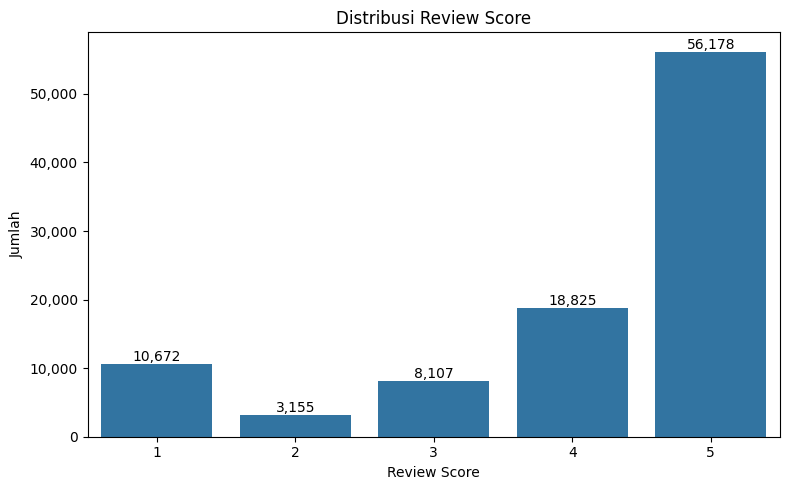

In [40]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='review_score', data=merged_clean)
plt.title('Distribusi Review Score')
plt.xlabel('Review Score')
plt.ylabel('Jumlah')
for bar in ax.patches:
    ax.annotate(f'{int(bar.get_height()):,}', 
                (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                ha='center', va='bottom', fontsize=10)
ax.yaxis.set_major_formatter(FuncFormatter(thousands_formatter))
plt.tight_layout()
plt.show()

In [41]:
avg_rating_per_year = merged_clean.groupby(merged_clean['order_purchase_timestamp'].dt.year)['review_score'].mean().reset_index()
avg_rating_per_year['review_score'] = avg_rating_per_year['review_score'].round(2)
avg_rating_per_year.rename(columns={'order_purchase_timestamp':'year','review_score': 'avg_review_score'}, inplace=True)
avg_rating_per_year

,year,avg_review_score
0,2017,4.11
1,2018,4.09


In [42]:
avg_rating_per_month = merged_clean.groupby([merged_clean['order_purchase_timestamp'].dt.year.rename('year'), merged_clean['order_purchase_timestamp'].dt.month.rename('month')]).agg(
    avg_review_score=('review_score', 'mean'),
    total_order=('qty', 'count')
).reset_index()

avg_rating_per_month = avg_rating_per_month.set_index('year')
avg_rating_per_month.map(commas)

,month,avg_review_score,total_order
year,,,
2017,1,4.07,778
2017,2,4.07,"1,681"
2017,3,4.10,"2,587"
2017,4,4.04,"2,329"
2017,5,4.16,"3,576"
2017,6,4.17,"3,162"
2017,7,4.20,"3,916"
2017,8,4.25,"4,227"
2017,9,4.20,"4,181"


In [43]:
avg_rating_per_quarter = merged_clean.groupby([merged_clean['order_purchase_timestamp'].dt.year.rename('year'),merged_clean['order_purchase_timestamp'].dt.quarter.rename('quarter')]).agg(
    avg_review_score=('review_score', 'mean'),
    total_order=('qty', 'count')).reset_index()
avg_rating_per_quarter.set_index('year').map(commas)

,quarter,avg_review_score,total_order
year,,,
2017,1,4.09,"5,046"
2017,2,4.13,"9,067"
2017,3,4.22,"12,324"
2017,4,4.02,"17,338"
2018,1,3.88,"20,688"
2018,2,4.21,"19,818"
2018,3,4.27,"12,656"


### Data Penjualan

#### Data Penjualan secara keseluruhan

In [44]:
category_sales = merged_clean.groupby('product_category_name').agg(
    total_orders=('qty', 'count'),
    total_sales_value=('total_sales_value', 'sum'),
    mean_sales_value=('total_sales_value', 'mean'),
    avg_shipping_cost=('freight_value', 'mean'),
    avg_review_score=('review_score', 'mean')
).reset_index()

category_sales.sort_values(by=['total_sales_value'], ascending=False).map(commas)

,product_category_name,total_orders,total_sales_value,mean_sales_value,avg_shipping_cost,avg_review_score
43,Health Beauty,"8,759","1,434,718.63",163.80,20.72,4.18
72,Watches Gifts,"5,601","1,303,791.41",232.78,17.97,4.06
7,Bed Bath Table,"9,321","1,243,509.56",133.41,21.97,3.97
67,Sports Leisure,"7,669","1,151,648.81",150.17,21.96,4.17
15,Computers Accessories,"6,648","1,056,115.73",158.86,22.04,4.02
...,...,...,...,...,...,...
35,Flowers,27,"1,491.82",55.25,17.35,4.41
46,Home Comfort 2,24,"1,209.75",50.41,17.65,3.88
11,Cds Dvds Musicals,12,954.99,79.58,18.75,4.67
29,Fashion Childrens Clothes,6,568.80,94.80,13.16,4.33


In [45]:
category_sales.nlargest(1, 'total_sales_value')

,product_category_name,total_orders,total_sales_value,mean_sales_value,avg_shipping_cost,avg_review_score
43,Health Beauty,8759,1434718.63,163.799364,20.719852,4.178103


In [46]:
category_sales.nsmallest(1, 'total_sales_value')

,product_category_name,total_orders,total_sales_value,mean_sales_value,avg_shipping_cost,avg_review_score
63,Security And Services,2,324.51,162.255,20.61,2.5


#### Data penjualan pertahun

In [47]:
category_sales_year = merged_clean.groupby([merged_clean['order_purchase_timestamp'].dt.year.rename('year'), 'product_category_name']).agg(
    total_orders=('qty', 'count'),
    total_sales_value=('total_sales_value', 'sum'),
    mean_sales_value=('total_sales_value', 'mean'),
    avg_shipping_cost=('freight_value', 'mean'),
    avg_review_score=('review_score', 'mean')
).reset_index()

category_sales_year.sort_values(by=['total_sales_value', 'total_orders'], ascending=False).set_index(['year', 'product_category_name']).map(commas)

total_orders total_sales_value  \
year product_category_name                                      
2018 Health Beauty                    5,381        885,555.57   
     Watches Gifts                    3,480        772,655.26   
     Bed Bath Table                   4,872        653,038.64   
     Sports Leisure                   4,037        621,765.41   
     Computers Accessories            4,042        593,077.82   
...                                     ...               ...   
     Home Comfort 2                       7            302.67   
2017 Arts And Craftmanship                2            204.88   
2018 Cds Dvds Musicals                    1            117.58   
2017 Diapers And Hygiene                  1             99.70   
2018 Fashion Childrens Clothes            1             97.48   

                               mean_sales_value avg_shipping_cost  \
year product_category_name                                          
2018 Health Beauty                       164.57             21.01   
     Watches Gifts                       222.03             18.14   
     Bed Bath Table                      134.04             23.21   
     Sports Leisure                      154.02             22.23   
     Computers Accessories               146.73             22.10   
...                                         ...               ...   
     Home Comfort 2                       43.24             19.81   
2017 Arts And Craftmanship               102.44             15.50   
2018 Cds Dvds Musicals                   117.58             52.58   
2017 Diapers And Hygiene                  99.70             23.70   
2018 Fashion Childrens Clothes            97.48              7.49   

                               avg_review_score  
year product_category_name                       
2018 Health Beauty                         4.18  
     Watches Gifts                         4.02  
     Bed Bath Table                        3.97  
     Sports Leisure                        4.11  
     Computers Accessories                 3.99  
...                                         ...  
     Home Comfort 2                        2.43  
2017 Arts And Craftmanship                 5.00  
2018 Cds Dvds Musicals                     5.00  
2017 Diapers And Hygiene                   1.00  
2018 Fashion Childrens Clothes             5.00  

[144 rows x 5 columns]

##### Data penjualan terbesar dan terendah pertahun

In [48]:
max_sales_per_year = category_sales_year.loc[category_sales_year.groupby('year')['total_sales_value'].idxmax()]
min_sales_per_year = category_sales_year.loc[category_sales_year.groupby('year')['total_sales_value'].idxmin()]

pd.concat([
    max_sales_per_year.sort_values(by=['total_sales_value'], ascending=False).set_index('year').map(commas), 
    min_sales_per_year.set_index('year').map(commas)
], axis=1, keys=['Penjualan Tertinggi', 'Penjualan Terendah'])

Penjualan Tertinggi                                                  \
     product_category_name total_orders total_sales_value mean_sales_value   
year                                                                         
2018         Health Beauty        5,381        885,555.57           164.57   
2017        Bed Bath Table        4,449        590,470.92           132.72   

                                                Penjualan Terendah  \
     avg_shipping_cost avg_review_score      product_category_name   
year                                                                 
2018             21.01             4.18  Fashion Childrens Clothes   
2017             20.62             3.97        Diapers And Hygiene   

                                                                        \
     total_orders total_sales_value mean_sales_value avg_shipping_cost   
year                                                                     
2018            1             97.48            97.48              7.49   
2017            1             99.70            99.70             23.70   

                       
     avg_review_score  
year                   
2018             5.00  
2017             1.00

#### Data penjualan per bulan

In [49]:
category_sales_monthly = merged_clean.groupby([merged_clean['order_purchase_timestamp'].dt.year.rename('year'), merged_clean['order_purchase_timestamp'].dt.month.rename('month')]).agg(
    total_orders=('qty', 'count'),
    total_sales_value=('total_sales_value', 'sum'),
    mean_sales_value=('total_sales_value', 'mean'),
    avg_shipping_cost=('freight_value', 'mean'),
    avg_review_score=('review_score', 'mean')
).reset_index()

# Membulatkan skor ulasan rata-rata dan menghitung pertumbuhan penjualan serta perubahan
category_sales_monthly['sales_growth'] = category_sales_monthly['total_sales_value'].pct_change() * 100
category_sales_monthly['sales_growth'] = category_sales_monthly['sales_growth'].apply(lambda x: f"{x:,.2f}%" if pd.notna(x) else "NaN")

# Menghitung perubahan penjualan dan tren penjualan
category_sales_monthly['sales_change'] = category_sales_monthly['total_sales_value'].diff()
category_sales_monthly.loc[0, 'sales_change'] = None
category_sales_monthly['sales_trend'] = category_sales_monthly['sales_change'].apply(lambda x: 'None' if pd.isna(x) else ('Naik' if x > 0 else 'Turun'))

category_sales_monthly.sort_values(by=['year', 'month'], ascending=True).set_index(['year', 'month']).map(commas)

total_orders total_sales_value mean_sales_value avg_shipping_cost  \
year month                                                                     
2017 1              778        134,832.61           173.31             21.52   
     2            1,681        275,696.36           164.01             22.54   
     3            2,587        424,467.78           164.08             21.96   
     4            2,329        402,829.71           172.96             21.87   
     5            3,576        571,658.34           159.86             21.90   
     6            3,162        497,314.69           157.28             21.77   
     7            3,916        579,008.13           147.86             21.80   
     8            4,227        658,892.95           155.88             21.84   
     9            4,181        713,428.89           170.64             22.66   
     10           4,510        748,369.66           165.94             22.79   
     11           7,340      1,164,240.42           158.62             22.71   
     12           5,488        841,606.57           153.35             21.34   
2018 1            7,038      1,081,806.96           153.71             21.91   
     2            6,585        973,098.58           147.78             21.46   
     3            7,065      1,135,824.67           160.77             23.97   
     4            6,863      1,148,748.33           167.38             23.49   
     5            6,817      1,137,265.87           166.83             22.30   
     6            6,138      1,019,110.25           166.03             25.46   
     7            6,233      1,053,478.56           169.02             26.00   
     8            6,423      1,003,143.01           156.18             23.08   

           avg_review_score sales_growth sales_change sales_trend  
year month                                                         
2017 1                 4.07          NaN          NaN        None  
     2                 4.07      104.47%   140,863.75        Naik  
     3                 4.10       53.96%   148,771.42        Naik  
     4                 4.04       -5.10%   -21,638.07       Turun  
     5                 4.16       41.91%   168,828.63        Naik  
     6                 4.17      -13.00%   -74,343.65       Turun  
     7                 4.20       16.43%    81,693.44        Naik  
     8                 4.25       13.80%    79,884.82        Naik  
     9                 4.20        8.28%    54,535.94        Naik  
     10                4.15        4.90%    34,940.77        Naik  
     11                3.93       55.57%   415,870.76        Naik  
     12                4.04      -27.71%  -322,633.85       Turun  
2018 1                 4.06       28.54%   240,200.39        Naik  
     2                 3.83      -10.05%  -108,708.38       Turun  
     3                 3.75       16.72%   162,726.09        Naik  
     4                 4.15        1.14%    12,923.66        Naik  
     5                 4.20       -1.00%   -11,482.46       Turun  
     6                 4.28      -10.39%  -118,155.62       Turun  
     7                 4.26        3.37%    34,368.31        Naik  
     8                 4.27       -4.78%   -50,335.55       Turun

In [50]:
# Mengelompokkan data berdasarkan tahun, bulan, dan kategori produk
category_sales_quarter = merged_clean.groupby([merged_clean['order_purchase_timestamp'].dt.year.rename('year'), merged_clean['order_purchase_timestamp'].dt.quarter.rename('quarter'), 'product_category_name']).agg(
    total_orders=('qty', 'count'),
    total_sales_value=('total_sales_value', 'sum'),
    mean_sales_value=('total_sales_value', 'mean'),
    avg_shipping_cost=('freight_value', 'mean'),
    avg_review_score=('review_score', 'mean')
).reset_index()

category_sales_quarter = category_sales_quarter.sort_values(by=['year', 'quarter', 'total_sales_value', 'total_orders'], ascending=[True, True, False, False])
category_sales_quarter.set_index(['year','quarter']).map(commas)

product_category_name total_orders  \
year quarter                                                   
2017 1                          Furniture Decor          613   
     1                            Health Beauty          430   
     1                           Sports Leisure          372   
     1                           Bed Bath Table          435   
     1                             Garden Tools          223   
...                                         ...          ...   
2018 3        Furniture Mattress And Upholstery            1   
     3                             Dvds Blu Ray            2   
     3                           Home Comfort 2            2   
     3                                  Flowers            2   
     3                            Fashion Sport            1   

             total_sales_value mean_sales_value avg_shipping_cost  \
year quarter                                                        
2017 1               70,559.05           115.10             22.90   
     1               70,375.19           163.66             20.08   
     1               62,245.29           167.33             24.60   
     1               55,431.27           127.43             20.22   
     1               50,973.98           228.58             26.68   
...                        ...              ...               ...   
2018 3                  141.83           141.83             11.93   
     3                  113.17            56.58             10.14   
     3                   85.44            42.72             23.37   
     3                   83.36            41.68             17.69   
     3                   83.05            83.05             13.15   

             avg_review_score  
year quarter                   
2017 1                   3.95  
     1                   4.14  
     1                   4.15  
     1                   4.07  
     1                   3.87  
...                       ...  
2018 3                   3.00  
     3                   3.50  
     3                   3.50  
     3                   5.00  
     3                   3.00  

[466 rows x 6 columns]

#### Data penjualan perQuartal

In [51]:
# Mengelompokkan data berdasarkan tahun dan kuartal
sales_quarter = merged_clean.groupby([merged_clean['order_purchase_timestamp'].dt.year.rename('year'), merged_clean['order_purchase_timestamp'].dt.quarter.rename('quarter')]).agg(
    total_orders=('qty', 'count'),
    total_sales_value=('total_sales_value', 'sum'),
    mean_sales_value=('total_sales_value', 'mean'),
    avg_shipping_cost=('freight_value', 'mean'),
    avg_review_score=('review_score', 'mean')
).reset_index().sort_values(by=['year', 'quarter'], ascending=True)

sales_quarter.set_index(['year', 'quarter']).map(commas)

total_orders total_sales_value mean_sales_value  \
year quarter                                                   
2017 1              5,046        834,996.75           165.48   
     2              9,067      1,471,802.74           162.33   
     3             12,324      1,951,329.97           158.34   
     4             17,338      2,754,216.65           158.85   
2018 1             20,688      3,190,730.21           154.23   
     2             19,818      3,305,124.45           166.77   
     3             12,656      2,056,621.57           162.50   

             avg_shipping_cost avg_review_score  
year quarter                                     
2017 1                   22.08             4.09  
     2                   21.84             4.13  
     3                   22.10             4.22  
     4                   22.29             4.02  
2018 1                   22.47             3.88  
     2                   23.69             4.21  
     3                   24.52             4.27

#### Presentase keberhasilan pengiriman secara keseluruhan

In [52]:
status_counts = merged_clean['order_status'].value_counts()
status_percentage = (status_counts / status_counts.sum()) * 100

status_distribution = pd.DataFrame({
    'Order Status': status_counts.index,
    'Total Count': status_counts.values,
    'Percentage (%)': status_percentage.apply(lambda x: f"{x:.2f}%")})

status_distribution.map(commas).reset_index(drop=True)

,Order Status,Total Count,Percentage (%)
0,Delivered,"94,854",97.85%
1,Shipped,"1,073",1.11%
2,Canceled,434,0.45%
3,Invoiced,288,0.30%
4,Processing,286,0.30%
5,Approved,2,0.00%


#### Presentase keberhasilan pengiriman pertahun

In [53]:
yearly_status_count = merged_clean.groupby([merged_clean['order_purchase_timestamp'].dt.year.rename('year'), 'order_status']).size().unstack(fill_value=0)
total_per_year = yearly_status_count.sum(axis=1)
yearly_percentage = yearly_status_count.div(total_per_year, axis=0).mul(100).map(lambda x: f"{x:.2f}%")

yearly_percentage.map(commas)

order_status,Approved,Canceled,Delivered,Invoiced,Processing,Shipped
year,,,,,,
2017,0.00%,0.44%,97.46%,0.39%,0.53%,1.18%
2018,0.00%,0.45%,98.18%,0.22%,0.11%,1.05%


### Order delay

#### Pesanan yang tercancel

In [54]:
merged_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96937 entries, 138 to 17094340
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   customer_unique_id        96937 non-null  object        
 1   customer_id               96937 non-null  object        
 2   seller_id                 96937 non-null  object        
 3   order_id                  96937 non-null  object        
 4   product_id                96937 non-null  object        
 5   product_category_name     96937 non-null  object        
 6   price                     96937 non-null  float64       
 7   qty                       96937 non-null  int64         
 8   freight_value             96937 non-null  float64       
 9   total_sales_value         96937 non-null  float64       
 10  payment_type              96937 non-null  object        
 11  payment_sequential        96937 non-null  int64         
 12  payment_installmen

In [55]:
canceled_orders = merged_clean[merged_clean['order_status'] == 'Canceled']

canceled_year = canceled_orders.groupby([canceled_orders['order_purchase_timestamp'].dt.year]).agg(
    canceled_orders=('order_id', 'count'),
    avg_score=('review_score', 'mean'))
canceled_year

,canceled_orders,avg_score
order_purchase_timestamp,,
2017,194,1.628866
2018,240,1.512500


In [56]:
canceled_state = canceled_orders.groupby(['customer_state']).agg(
    canceled_orders=('order_id', 'count'),
    avg_score=('review_score', 'mean'))
canceled_state.sort_values(by='canceled_orders', ascending=False).map(commas)

,canceled_orders,avg_score
customer_state,,
São Paulo,233,1.47
Rio de Janeiro,57,1.47
Minas Gerais,47,1.68
Paraná,16,1.31
Bahia,14,2.07
Rio Grande do Sul,12,1.67
Santa Catarina,11,1.64
Goiás,9,1.44
Espírito Santo,7,3.00


In [57]:
canceled_count_category = canceled_orders.groupby('product_category_name').agg(
    canceled_orders=('order_id', 'count'),
    avg_score=('review_score', 'mean'))
canceled_count_category.sort_values(by='canceled_orders', ascending=False).head(10).map(commas)

,canceled_orders,avg_score
product_category_name,,
Sports Leisure,45,1.44
Housewares,37,1.46
Computers Accessories,35,1.46
Health Beauty,34,1.82
Toys,28,1.82
Furniture Decor,24,1.17
Auto,23,1.78
Watches Gifts,20,1.40
Bed Bath Table,18,2.17


In [58]:
canceled_all = canceled_orders.groupby([canceled_orders['order_purchase_timestamp'].dt.year.rename('year'), 'product_category_name', 'customer_state']).agg(
    canceled_orders=('order_id', 'count'),
    avg_score=('review_score', 'mean'))
canceled_all.map(commas)

canceled_orders avg_score
year product_category_name customer_state                          
2017 Air Conditioning      São Paulo                    1      1.00
     Audio                 São Paulo                    1      1.00
     Auto                  Espírito Santo               1      5.00
                           Minas Gerais                 3      2.33
                           Paraná                       1      1.00
...                                                   ...       ...
2018 Watches Gifts         Bahia                        1      1.00
                           Maranhão                     1      1.00
                           Paraná                       1      2.00
                           Pernambuco                   1      1.00
                           São Paulo                    4      1.25

[212 rows x 2 columns]

#### Pesanan yang ontime

In [59]:
merged_clean['year'] = merged_clean['order_purchase_timestamp'].dt.year

In [60]:
ontime_orders = merged_clean[merged_clean['delivery_delay_days'] >= 0]

In [61]:
ontime_orders.groupby('year').size().reset_index(name='ontime_order_count').map(commas).set_index('year')

,ontime_order_count
year,
"2,017","3,735"
"2,018","5,620"


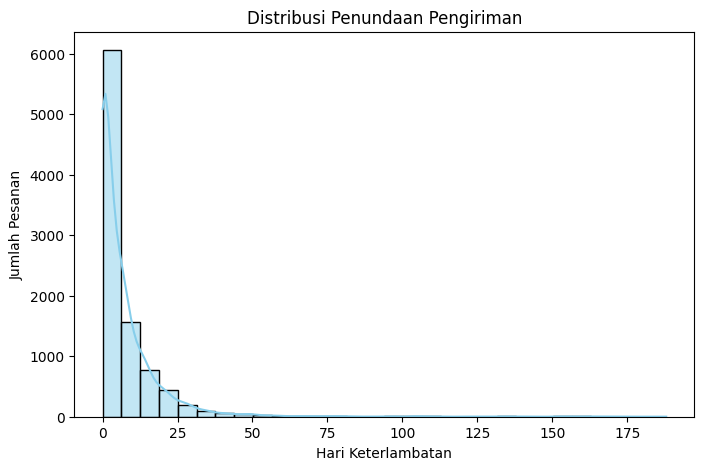

In [62]:
plt.figure(figsize=(8, 5))
sns.histplot(ontime_orders['delivery_delay_days'].dropna(), bins=30, kde=True, color='skyblue')
plt.title('Distribusi Penundaan Pengiriman')
plt.xlabel('Hari Keterlambatan')
plt.ylabel('Jumlah Pesanan')
plt.show()

#### Pesanan yang terlambat

In [63]:
late_orders = merged_clean[merged_clean['delivery_delay_days'] < 0]

In [64]:
late_orders.groupby('year').size().reset_index(name='late_order_count')

,year,late_order_count
0,2017,39847
1,2018,47369


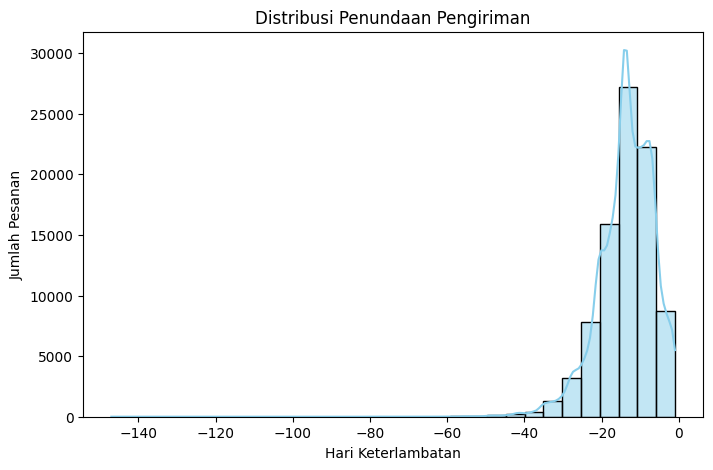

In [65]:
plt.figure(figsize=(8, 5))
sns.histplot(late_orders['delivery_delay_days'].dropna(), bins=30, kde=True, color='skyblue')
plt.title('Distribusi Penundaan Pengiriman')
plt.xlabel('Hari Keterlambatan')
plt.ylabel('Jumlah Pesanan')
plt.show()

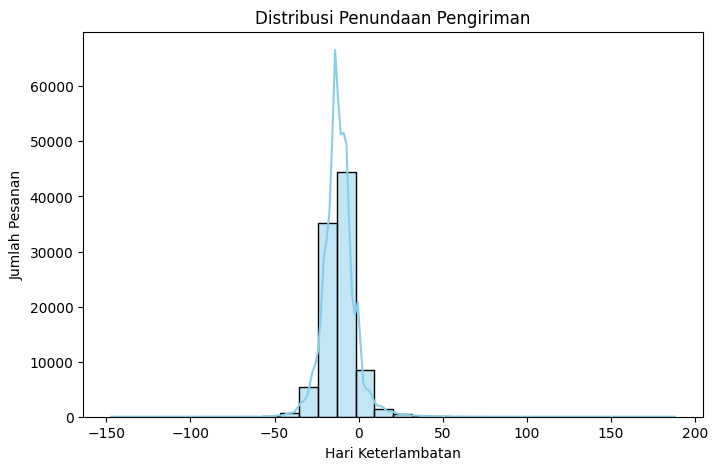

In [66]:
plt.figure(figsize=(8, 5))
sns.histplot(merged_clean['delivery_delay_days'].dropna(), bins=30, kde=True, color='skyblue')
plt.title('Distribusi Penundaan Pengiriman')
plt.xlabel('Hari Keterlambatan')
plt.ylabel('Jumlah Pesanan')
plt.show()

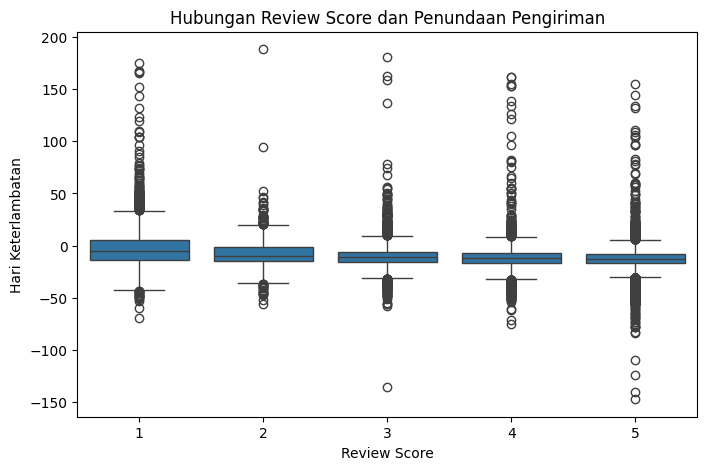

In [67]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='review_score', y='delivery_delay_days', data=merged_clean)
plt.title('Hubungan Review Score dan Penundaan Pengiriman')
plt.xlabel('Review Score')
plt.ylabel('Hari Keterlambatan')
plt.show()

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren total pesanan per kategori produk dari tahun 2016 hingga 2018 dan kategori apa saja yang palign banyak pendapatan dan penjualannya?

- **Tujuan**: Mengidentifikasi produk-produk yang memberikan kontribusi terbesar dalam penjualan dan yang memiliki penjualan paling rendah. Pengetahuan ini membantu dalam perencanaan stok dan kampanye pemasaran.
- **Metode**: Menggunakan grafik batang untuk membandingkan produk dengan total penjualan tertinggi dan terendah. Visualisasi ini memperlihatkan kategori produk mana yang perlu mendapatkan perhatian lebih, baik untuk promosi atau pembaruan produk.

In [68]:
category_sales_year.sort_values(by=['year', 'total_sales_value'], ascending=[True, False]).groupby('year').head(5).map(commas)

,year,product_category_name,total_orders,total_sales_value,mean_sales_value,avg_shipping_cost,avg_review_score
7,"2,017",Bed Bath Table,"4,449","590,470.92",132.72,20.62,3.97
43,"2,017",Health Beauty,"3,378","549,163.06",162.57,20.26,4.17
71,"2,017",Watches Gifts,"2,121","531,136.15",250.42,17.68,4.12
66,"2,017",Sports Leisure,"3,632","529,883.40",145.89,21.66,4.23
15,"2,017",Computers Accessories,"2,606","463,037.91",177.68,21.94,4.08
115,"2,018",Health Beauty,"5,381","885,555.57",164.57,21.01,4.18
143,"2,018",Watches Gifts,"3,480","772,655.26",222.03,18.14,4.02
79,"2,018",Bed Bath Table,"4,872","653,038.64",134.04,23.21,3.97
138,"2,018",Sports Leisure,"4,037","621,765.41",154.02,22.23,4.11
87,"2,018",Computers Accessories,"4,042","593,077.82",146.73,22.10,3.99


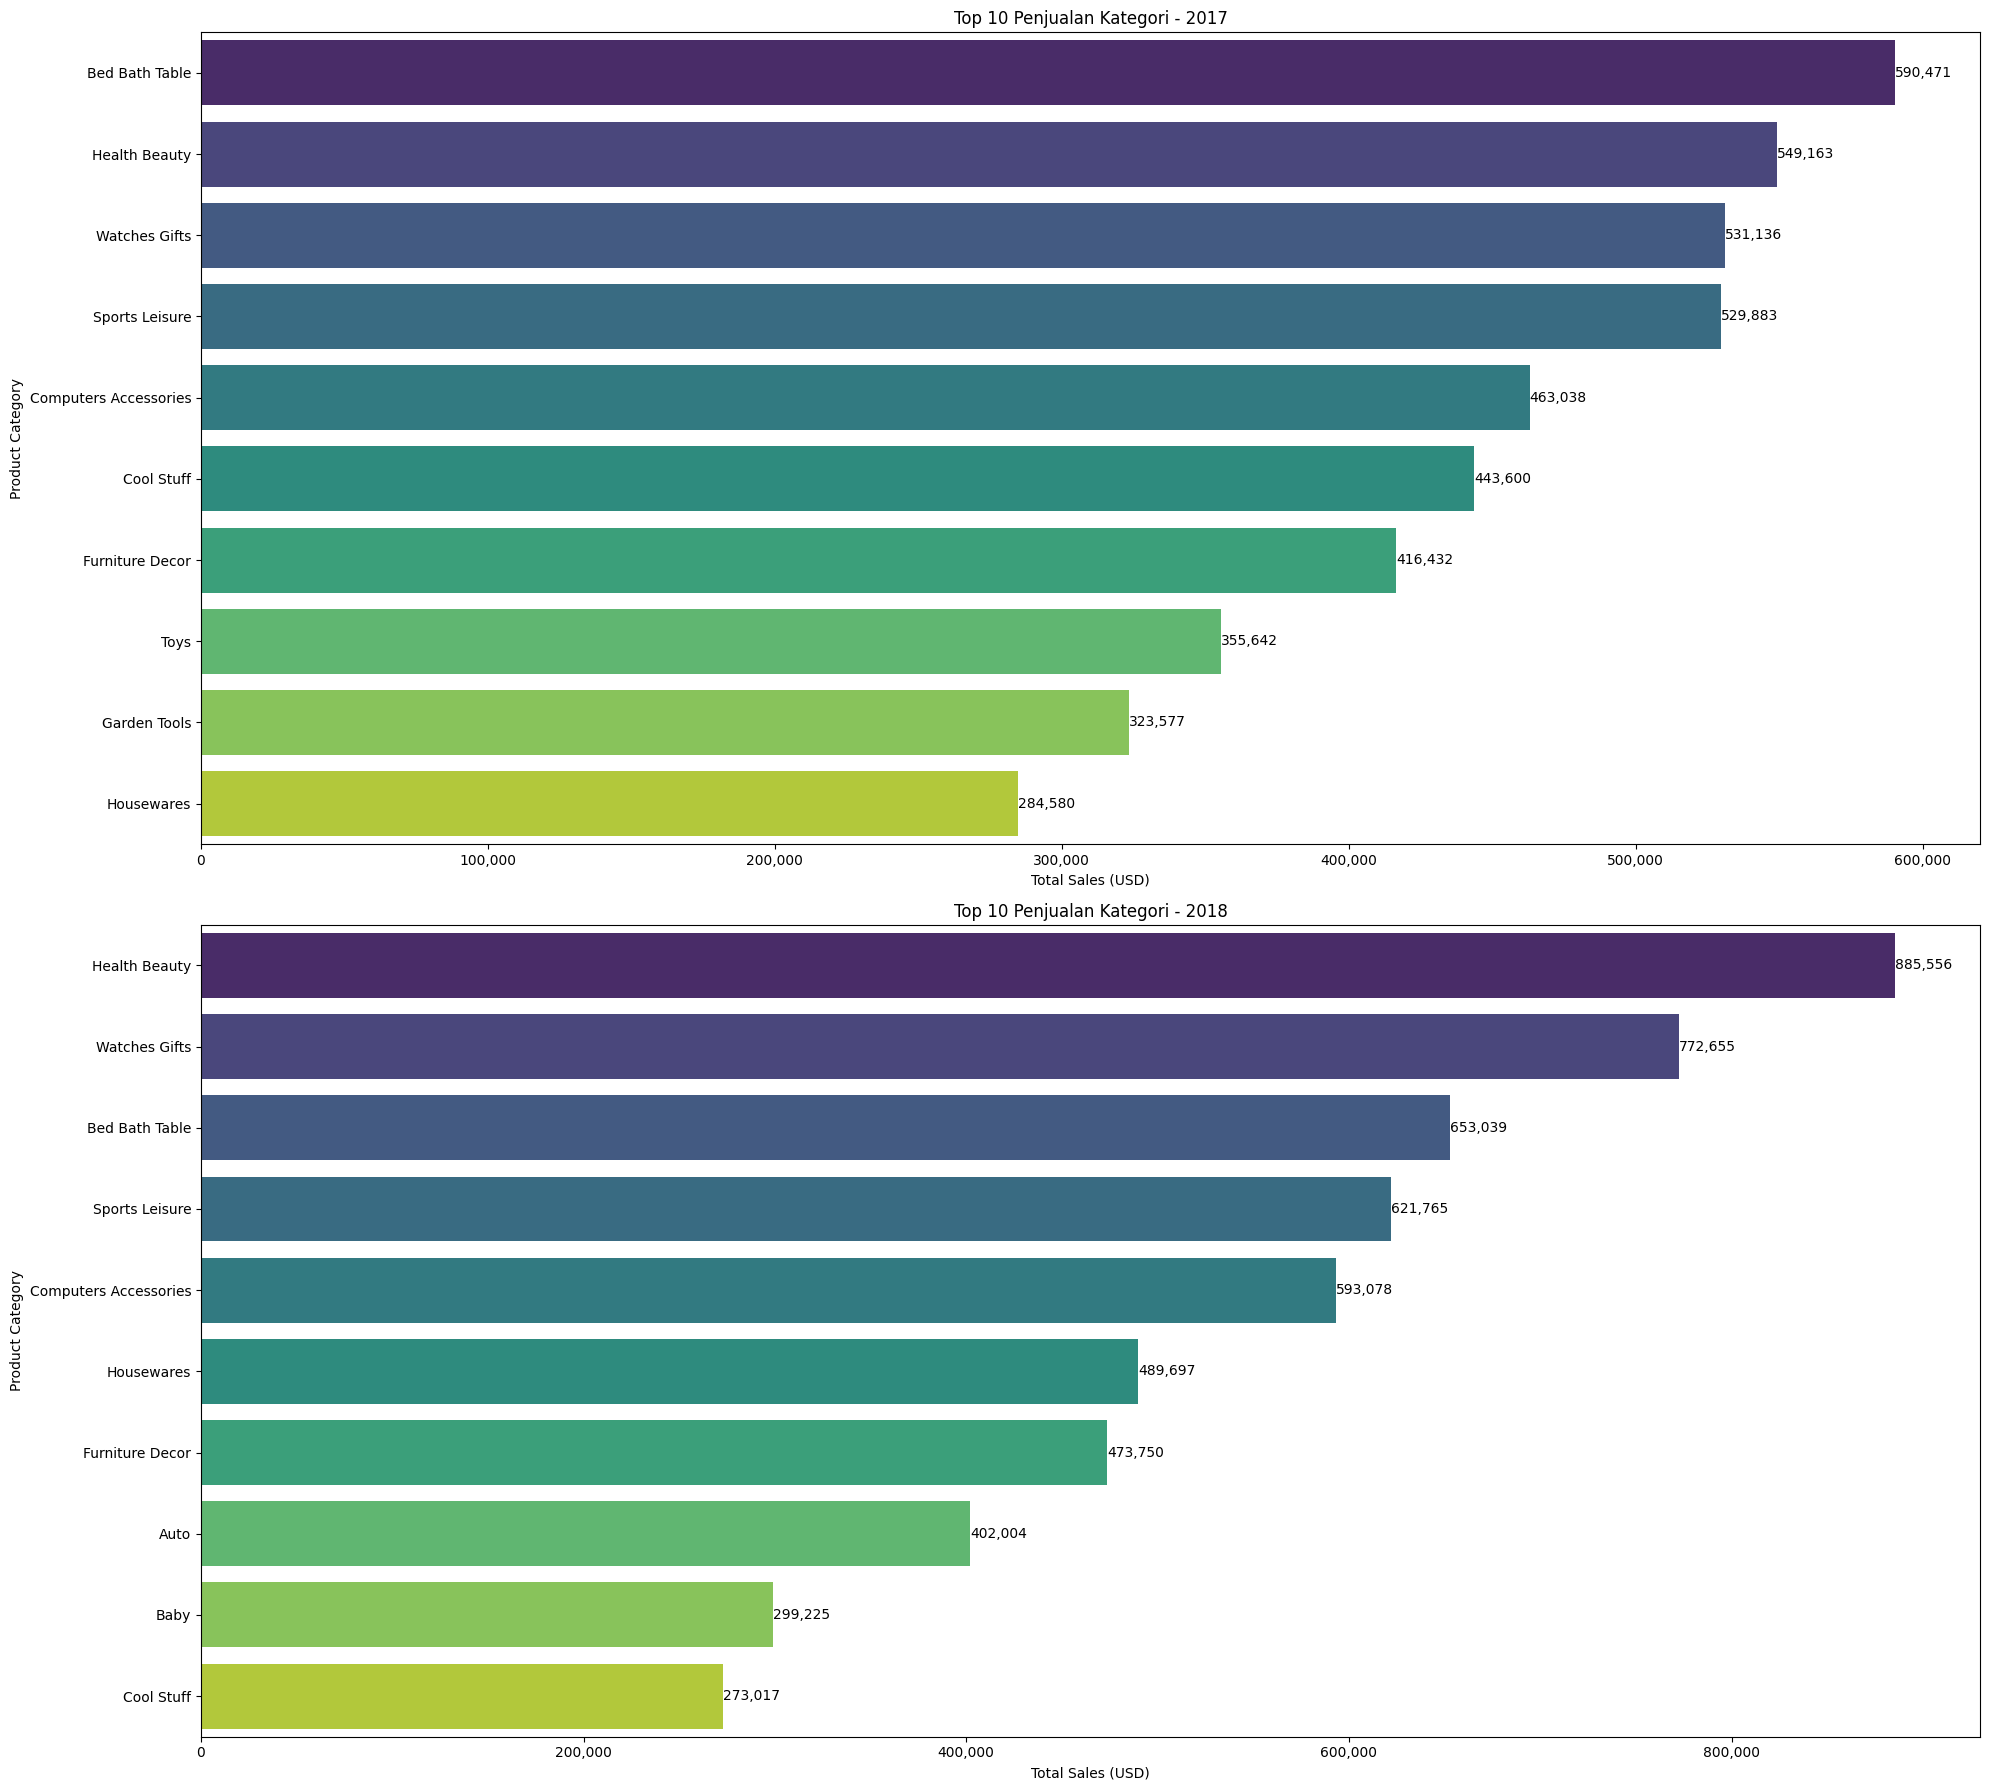

In [69]:
def get_top_data_bar_chart(category_sales_year):
    return {
        year: category_sales_year[category_sales_year['year'] == year].sort_values(by='total_sales_value', ascending=False).head(10)
        for year in [2017, 2018]
    }

def create_barplot(data, year, ax):
    sns.barplot(x='total_sales_value', y='product_category_name', data=data, ax=ax, palette="viridis", hue='product_category_name', legend=False)
    ax.set_title(f"Top 10 Penjualan Kategori - {year}")
    ax.set_xlabel("Total Sales (USD)")
    ax.set_ylabel("Product Category")
    for p in ax.patches:
        value = p.get_width()
        annotation = f'{value:,.0f}'
        ax.annotate(annotation,
                    (value, p.get_y() + p.get_height() / 2), 
                    ha='left', va='center')

def plot_barplots(top_data):
    fig, axes = plt.subplots(2, 1, figsize=(20, 18))
    for i, (year, data) in enumerate(top_data.items()):
        create_barplot(data, year, axes[i])
        axes[i].xaxis.set_major_formatter(FuncFormatter(thousands_formatter))
    plt.tight_layout()
    plt.show()

top_data = get_top_data_bar_chart(category_sales_year)
plot_barplots(top_data)

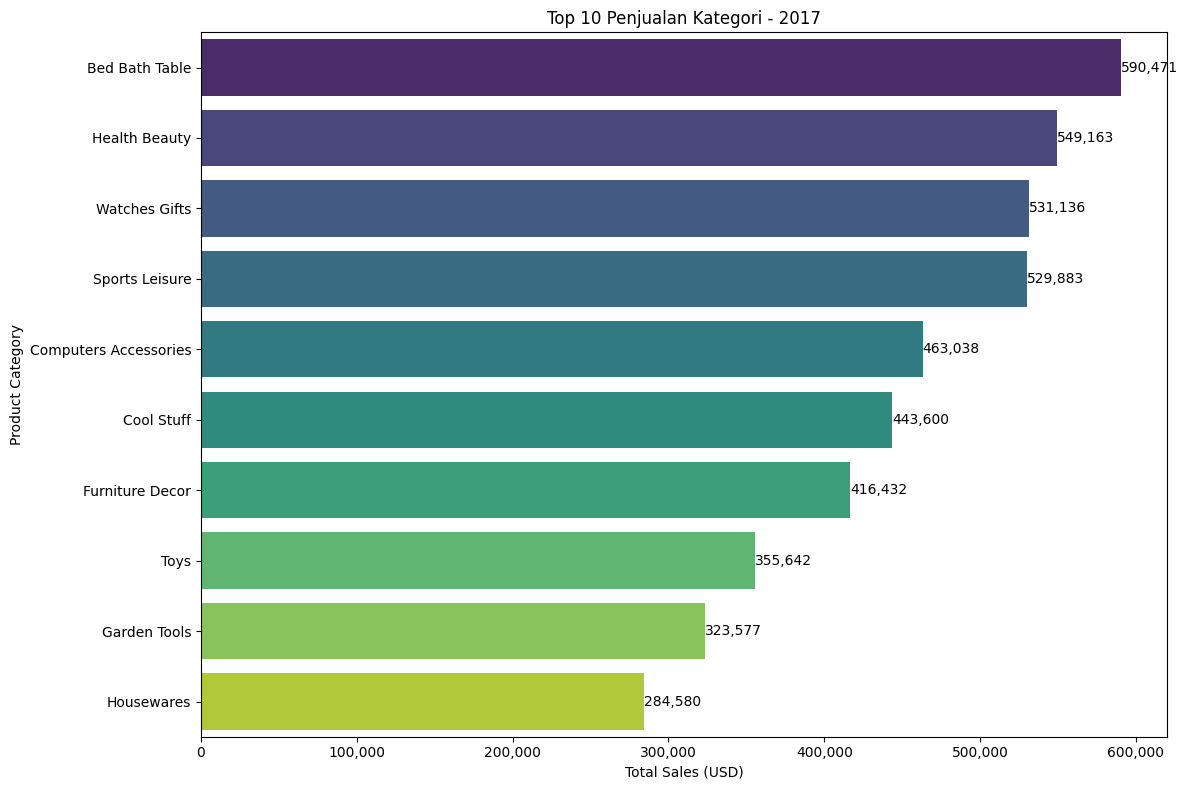

In [70]:
def get_top_data_bar_chart(category_sales_year):
    return {
        2017: category_sales_year[category_sales_year['year'] == 2017]
        .sort_values(by='total_sales_value', ascending=False).head(10)
    }

def create_barplot(data, year, ax):
    sns.barplot(x='total_sales_value', y='product_category_name', data=data, ax=ax, palette="viridis", hue='product_category_name', legend=False)
    ax.set_title(f"Top 10 Penjualan Kategori - {year}")  
    ax.set_xlabel("Total Sales (USD)")  
    ax.set_ylabel("Product Category")  
    for p in ax.patches:
        value = p.get_width()
        annotation = f'{value:,.0f}'
        ax.annotate(annotation, 
                    (value, p.get_y() + p.get_height() / 2), 
                    ha='left', va='center')

def plot_barplots(top_data):
    fig, axes = plt.subplots(1, 1, figsize=(12, 8))
    for year, data in top_data.items():
        create_barplot(data, year, axes)
        axes.xaxis.set_major_formatter(FuncFormatter(thousands_formatter))
    plt.tight_layout()
    plt.show()

top_data = get_top_data_bar_chart(category_sales_year)
plot_barplots(top_data)

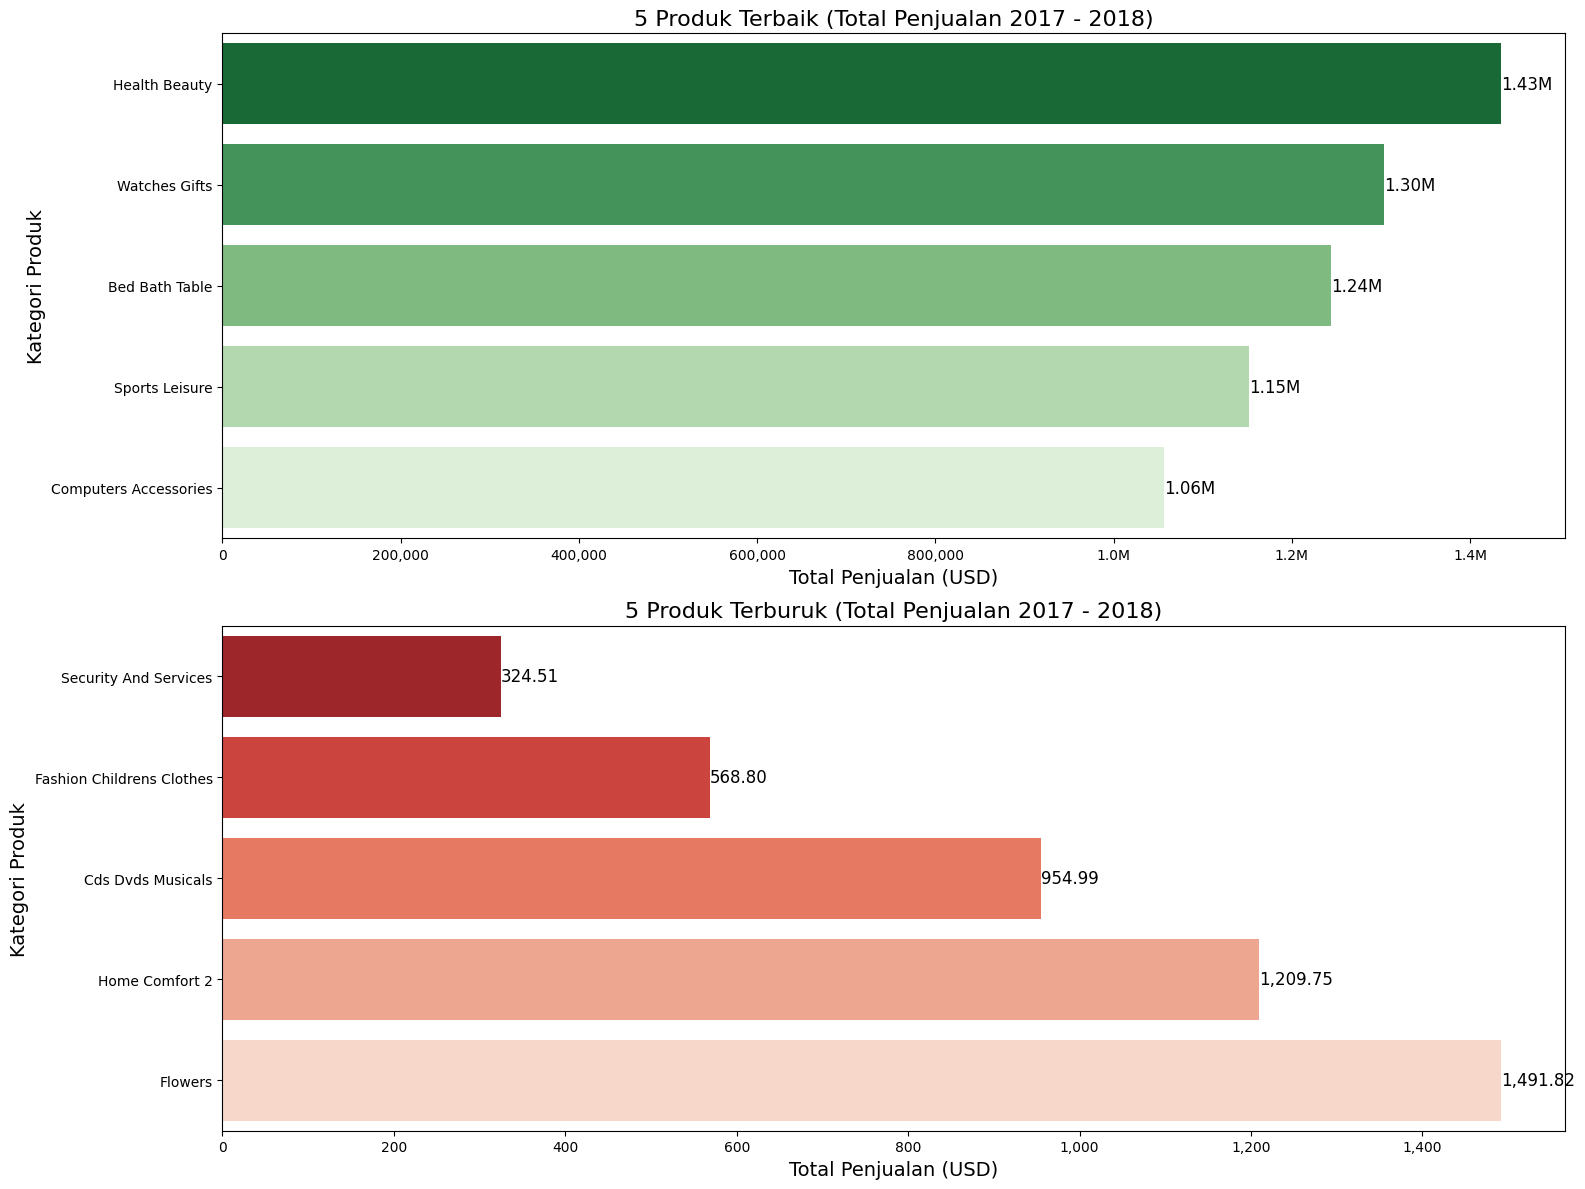

In [71]:
total_sales_by_category = category_sales_year.groupby('product_category_name').agg(total_sales_value=('total_sales_value', 'sum')).reset_index()
sorted_sales = total_sales_by_category.sort_values(by='total_sales_value', ascending=False)
top_5_products = sorted_sales.head(5)
bottom_5_products = sorted_sales.tail(5).sort_values(by='total_sales_value', ascending=True)

fig, ax = plt.subplots(2, 1, figsize=(16, 12))
sns.barplot(data=top_5_products, x='total_sales_value', y='product_category_name', ax=ax[0], palette="Greens_r", hue='product_category_name', legend=False)
ax[0].set_title("5 Produk Terbaik (Total Penjualan 2017 - 2018)", fontsize=16)
ax[0].set_xlabel("Total Penjualan (USD)", fontsize=14)
ax[0].set_ylabel("Kategori Produk", fontsize=14)
ax[0].xaxis.set_major_formatter(FuncFormatter(thousands_formatter))  
for p in ax[0].patches:
    value = p.get_width()
    if value >= 1_000_000:
        annotation = f'{value/1_000_000:.2f}M'
    elif value >= 1000:
        annotation = f'{value/1_000:.2f}K'
    else:
        annotation = f'{value:,.2f}'
    ax[0].annotate(annotation, 
                (value, p.get_y() + p.get_height() / 2), 
                ha='left', va='center', fontsize=12)

sns.barplot(data=bottom_5_products, x='total_sales_value', y='product_category_name', ax=ax[1], palette="Reds_r", hue='product_category_name', legend=False)
ax[1].set_title("5 Produk Terburuk (Total Penjualan 2017 - 2018)", fontsize=16)
ax[1].set_xlabel("Total Penjualan (USD)", fontsize=14)
ax[1].set_ylabel("Kategori Produk", fontsize=14)
ax[1].xaxis.set_major_formatter(FuncFormatter(thousands_formatter))  
for p in ax[1].patches:
    value = p.get_width()
    annotation = f'{value:,.2f}'
    ax[1].annotate(annotation,
                (value, p.get_y() + p.get_height() / 2), 
                ha='left', va='center', fontsize=12)

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

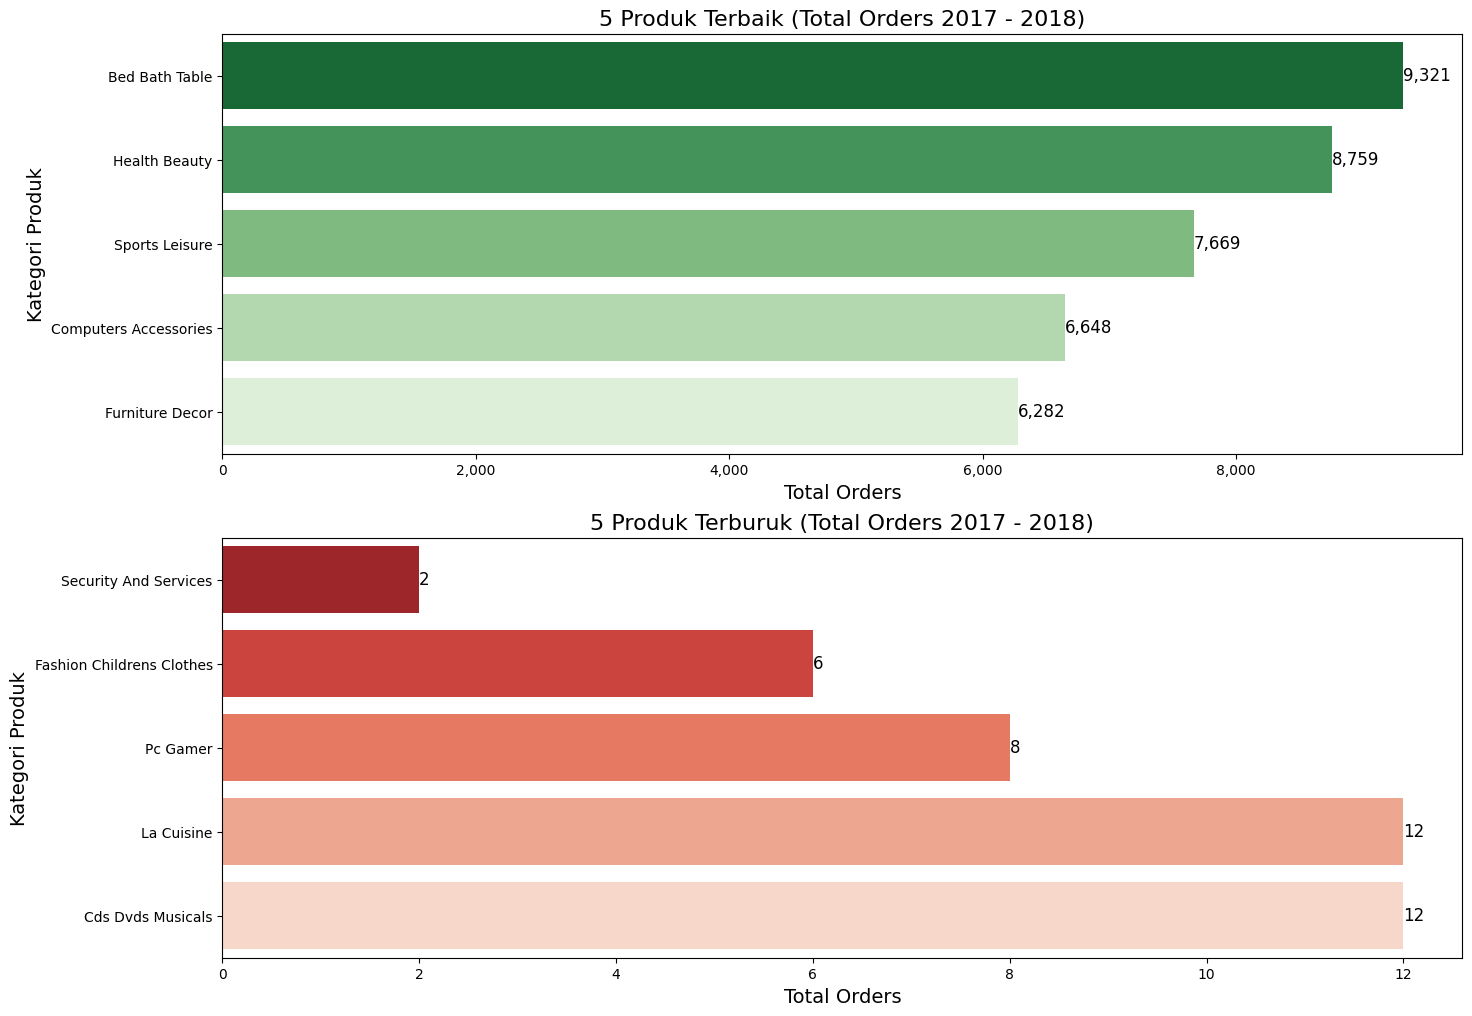

In [72]:
def prepare_order_data(category_sales_year):
    total_orders_by_category = category_sales_year.groupby('product_category_name').agg(
        total_orders=('total_orders', 'sum')
    ).reset_index()
    sorted_orders = total_orders_by_category.sort_values(by='total_orders', ascending=False)
    top_5_orders = sorted_orders.head(5)
    bottom_5_orders = sorted_orders.tail(5).sort_values(by='total_orders', ascending=True)
    return top_5_orders, bottom_5_orders

def create_barplot(ax, data, title, palette, xlabel="Total Orders", ylabel="Kategori Produk"):
    sns.barplot(data=data, x='total_orders', y='product_category_name', ax=ax, 
                palette=palette, hue='product_category_name', legend=False)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel(xlabel, fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14)
    ax.xaxis.set_major_formatter(FuncFormatter(thousands_formatter))
    
    for p in ax.patches:
        value = p.get_width()
        if value >= 1000:
            annotation = f'{value:,.0f}'
        else:
            annotation = f'{value:,.0f}'
        ax.annotate(annotation, 
                    (value, p.get_y() + p.get_height() / 2), 
                    ha='left', va='center', fontsize=12)

def visualize_top_bottom_orders(category_sales_year):
    top_5_orders, bottom_5_orders = prepare_order_data(category_sales_year)
    fig, ax = plt.subplots(2, 1, figsize=(16, 12))
    create_barplot(ax[0], top_5_orders, "5 Produk Terbaik (Total Orders 2017 - 2018)", "Greens_r")
    create_barplot(ax[1], bottom_5_orders, "5 Produk Terburuk (Total Orders 2017 - 2018)", "Reds_r")

plt.tight_layout()
plt.show()
visualize_top_bottom_orders(category_sales_year)

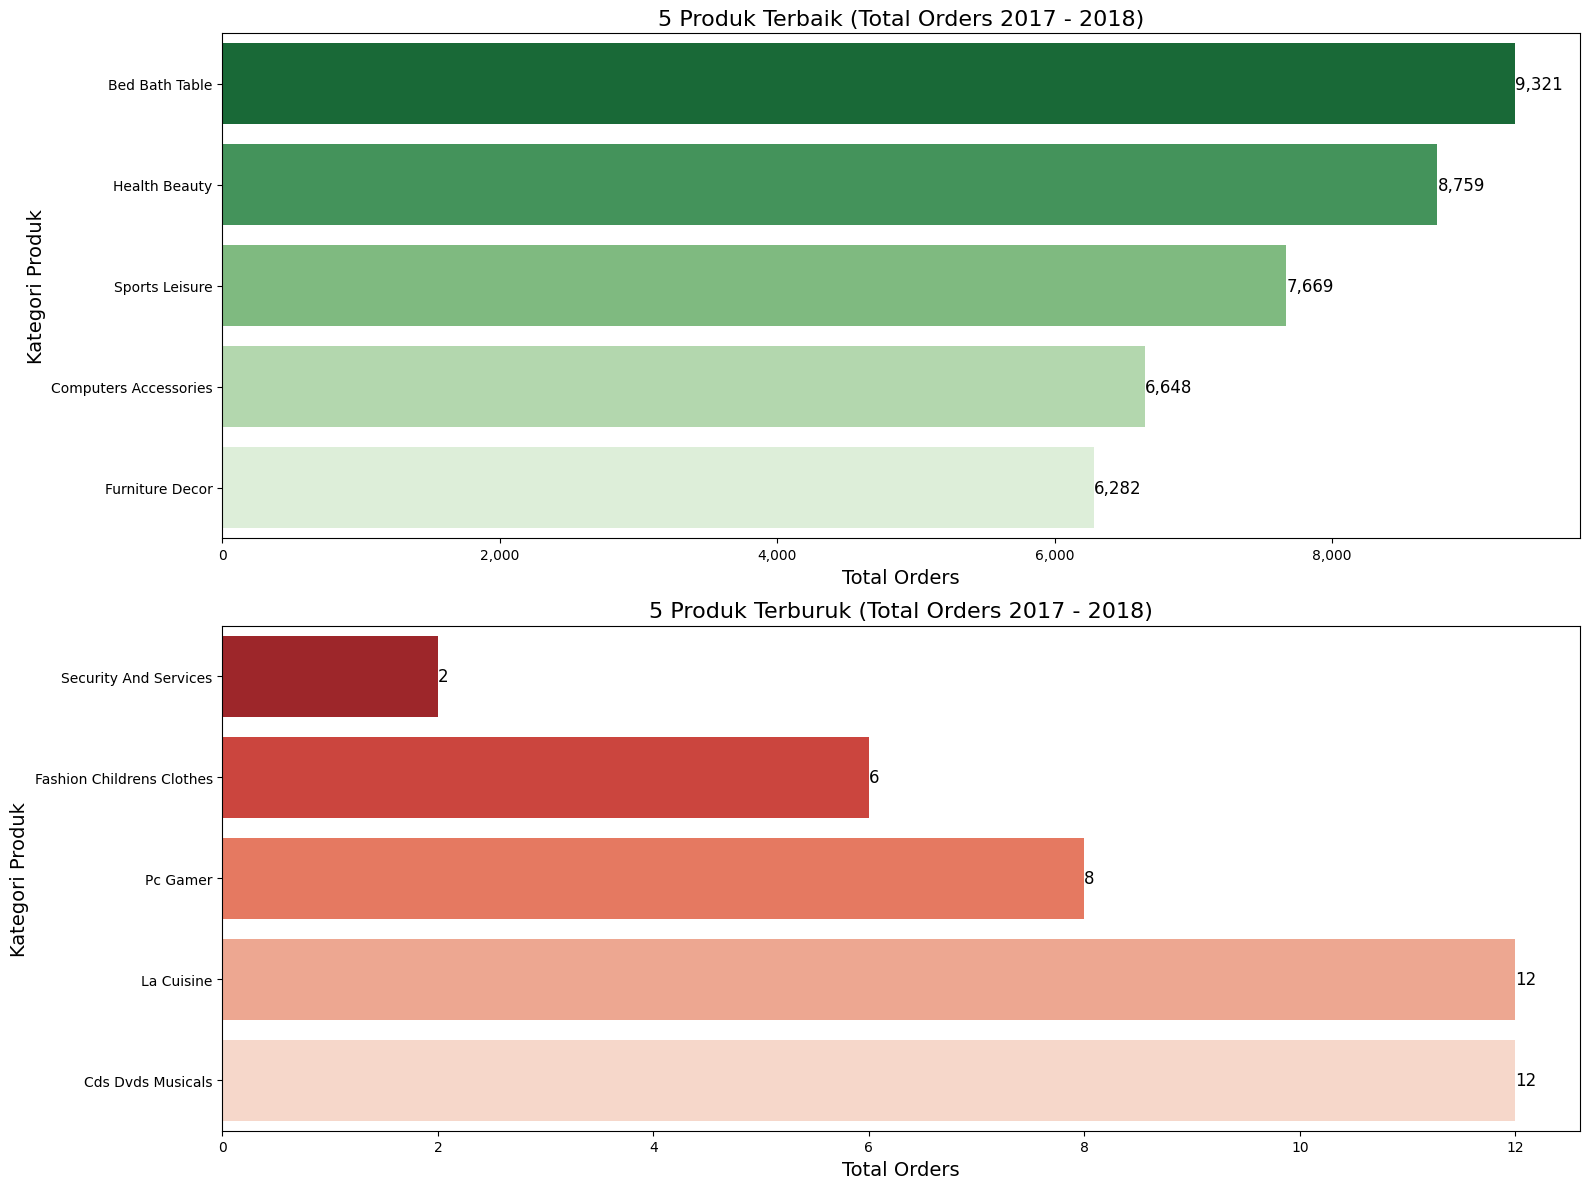

In [73]:
total_orders_by_category = category_sales_year.groupby('product_category_name').agg(
    total_orders=('total_orders', 'sum')
).reset_index()

sorted_orders = total_orders_by_category.sort_values(by='total_orders', ascending=False)
top_5_orders = sorted_orders.head(5)
bottom_5_orders = sorted_orders.tail(5).sort_values(by='total_orders', ascending=True)

fig, ax = plt.subplots(2, 1, figsize=(16, 12))
sns.barplot(data=top_5_orders, x='total_orders', y='product_category_name', ax=ax[0], palette="Greens_r", hue='product_category_name', legend=False)
ax[0].set_title("5 Produk Terbaik (Total Orders 2017 - 2018)", fontsize=16)
ax[0].set_xlabel("Total Orders", fontsize=14)
ax[0].set_ylabel("Kategori Produk", fontsize=14)
ax[0].xaxis.set_major_formatter(FuncFormatter(thousands_formatter))
for p in ax[0].patches:
    ax[0].annotate(f'{p.get_width():,.0f}', (p.get_width(), p.get_y() + p.get_height() / 2), ha='left', va='center', fontsize=12)

sns.barplot(data=bottom_5_orders, x='total_orders', y='product_category_name', ax=ax[1], palette="Reds_r", hue='product_category_name', legend=False)
ax[1].set_title("5 Produk Terburuk (Total Orders 2017 - 2018)", fontsize=16)
ax[1].set_xlabel("Total Orders", fontsize=14)
ax[1].set_ylabel("Kategori Produk", fontsize=14)
ax[1].xaxis.set_major_formatter(FuncFormatter(thousands_formatter))
for p in ax[1].patches:
    ax[1].annotate(f'{p.get_width():,.0f}', (p.get_width(), p.get_y() + p.get_height() / 2), ha='left', va='center', fontsize=12)

plt.tight_layout()
plt.show()

#### Kesimpulan dan Insight
- Kategori produk seperti furniture_decor, health_beauty, dan watches_gifts menunjukkan penjualan yang konsisten tinggi selama tiga tahun berturut-turut.
- Terdapat pergeseran dalam kategori teratas dari tahun ke tahun, dengan beberapa kategori baru muncul dan beberapa kategori yang sebelumnya dominan mulai menurun.
- Produk terburuk seperti security_and_services dan fashion_children_clothes menunjukkan potensi untuk perbaikan, dengan penjualan yang jauh lebih rendah dibandingkan produk terbaik dan menunjukkan bahwa ada masalah dalam menarik pelanggan untuk kategori ini.
- Keterkaitan Antara Penjualan dan Pesanan: Kategori dengan total pesanan tinggi tetapi penjualan rendah mungkin menunjukkan masalah dalam konversi, yang perlu dianalisis lebih lanjut.
- Tren Pertumbuhan: Kategori yang menunjukkan pertumbuhan signifikan dalam penjualan dan pesanan dapat menjadi fokus untuk strategi pemasaran dan pengembangan produk.

#### Rekomendasi

- **Fokus pada Kategori Berkinerja Baik**: Tingkatkan pemasaran untuk kategori yang menunjukkan pertumbuhan, seperti health_beauty dan furniture_decor, untuk memanfaatkan momentum penjualan.
- **Analisis Produk Terburuk**: Lakukan analisis mendalam terhadap produk terburuk untuk memahami penyebab rendahnya penjualan dan pesanan. Pertimbangkan untuk melakukan survei pelanggan untuk mendapatkan umpan balik.
- **Optimalkan Rantai Pasokan**: Pastikan bahwa produk dengan total pesanan tinggi selalu tersedia untuk memenuhi permintaan dan menghindari kehilangan penjualan. - **Analisis 

### Pertanyaan 2: Bagaimana tren penjualan per kategori produk dari tahun 2017 hingga 2018, dan kategori mana yang menunjukkan pertumbuhan paling signifikan?

- **Tujuan**: Memahami kategori produk mana yang paling banyak terjual dan memberikan kontribusi terbesar terhadap total penjualan. Ini memungkinkan perusahaan untuk fokus pada kategori yang memiliki performa terbaik. 
- **Metode**: Menggunakan visualisasi garis untuk menunjukkan tren penjualan per kategori produk tiap tahun. Hasil ini memberikan gambaran yang jelas mengenai kategori produk dengan performa terbaik serta potensi untuk pengembangan lebih lanjut.

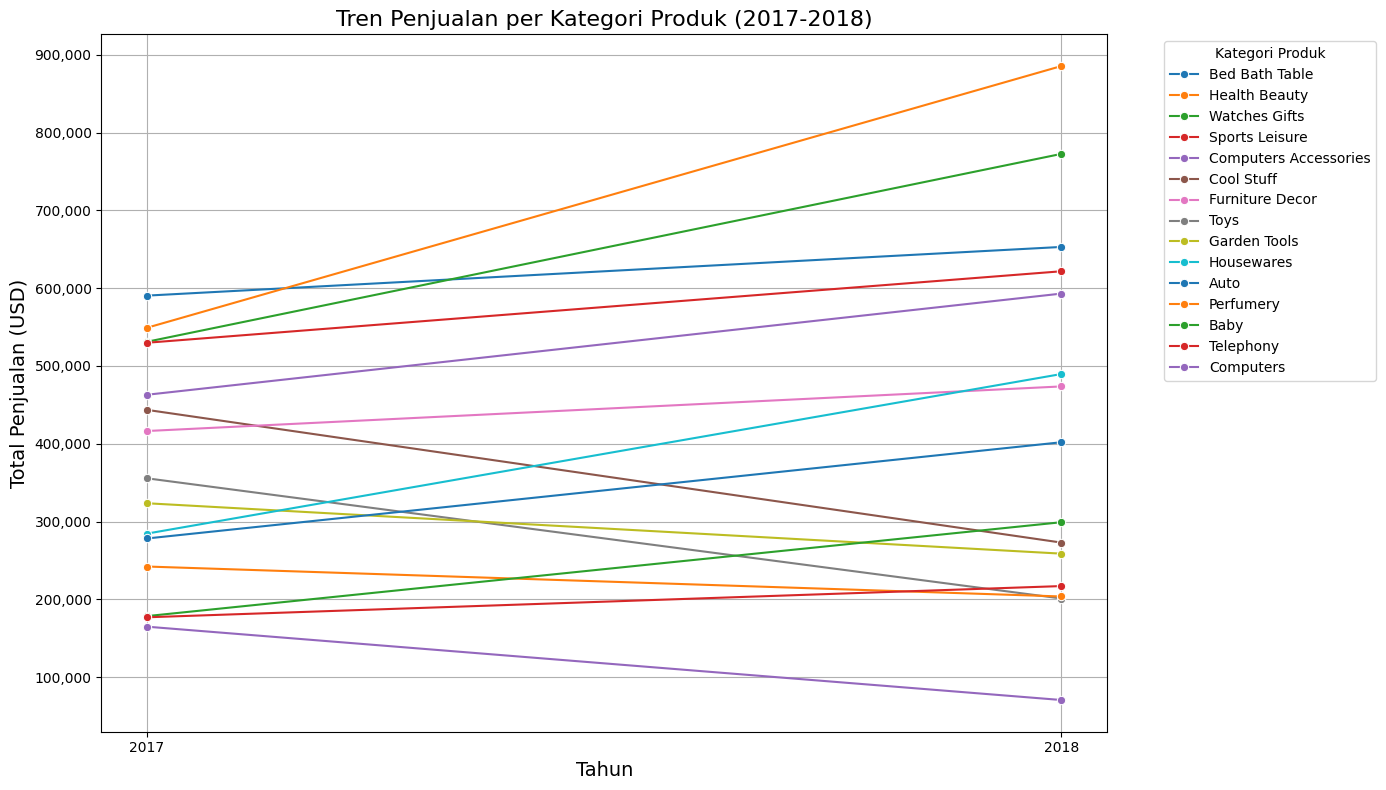

In [74]:
def get_top_data_line_chart(category_sales_year):
    return {
        year: category_sales_year[category_sales_year['year'] == year].sort_values(by='total_sales_value', ascending=False).head(15)
        for year in [2017, 2018]
    }

def plot_line_chart(category_sales_year, top_data):
    filtered_combined_data = category_sales_year[category_sales_year['product_category_name'].isin(top_data[2017]['product_category_name'])]
    plt.figure(figsize=(14, 8))
    for category in top_data[2017]['product_category_name']:
        category_data = filtered_combined_data[filtered_combined_data['product_category_name'] == category]
        sns.lineplot(data=category_data, x='year', y='total_sales_value', label=category, marker='o')
    plt.title('Tren Penjualan per Kategori Produk (2017-2018)', fontsize=16)
    plt.xlabel('Tahun', fontsize=14)
    plt.ylabel('Total Penjualan (USD)', fontsize=14)
    plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands_formatter))
    plt.xticks(ticks=[2017, 2018], labels=[2017, 2018])
    plt.legend(title='Kategori Produk', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid()
    plt.tight_layout()
    plt.show()

top_data = get_top_data_line_chart(category_sales_year)
plot_line_chart(category_sales_year, top_data)

#### Produk dengan pertumbuhan paling signifikan adalah Small Appliances Home Oven And Coffee

In [75]:
category_sales_monthly_product = merged_clean.groupby([merged_clean['order_purchase_timestamp'].dt.year.rename('year'), merged_clean['order_purchase_timestamp'].dt.month.rename('month'),'product_category_name']).agg(
    total_orders=('qty', 'count'),
    total_sales_value=('total_sales_value', 'sum'),
    mean_sales_value=('total_sales_value', 'mean'),
    avg_shipping_cost=('freight_value', 'mean'),
    avg_review_score=('review_score', 'mean')
).reset_index()

category_sales_monthly_product.sort_values(by=['year', 'month'], ascending=True).set_index(['year', 'month']).map(commas)

product_category_name total_orders total_sales_value  \
year month                                                              
2017 1      Agro Industry And Commerce            2            107.76   
     1                Air Conditioning            3            738.36   
     1                            Auto           30          5,706.41   
     1                            Baby           32          7,067.04   
     1                  Bed Bath Table           44          4,999.04   
...                                ...          ...               ...   
2018 8                  Sports Leisure          433         60,337.92   
     8                      Stationery          158         18,646.94   
     8                       Telephony          246         42,440.27   
     8                            Toys          154         21,437.81   
     8                   Watches Gifts          389         79,300.95   

           mean_sales_value avg_shipping_cost avg_review_score  
year month                                                      
2017 1                53.88             20.90             4.50  
     1               246.12             24.89             3.00  
     1               190.21             20.40             3.47  
     1               220.84             22.63             4.53  
     1               113.61             20.55             4.16  
...                     ...               ...              ...  
2018 8               139.35             20.63             4.39  
     8               118.02             21.31             4.57  
     8               172.52             20.00             4.06  
     8               139.21             21.97             4.14  
     8               203.86             18.43             4.19  

[1223 rows x 6 columns]

In [76]:
total_sales_per_category = category_sales_monthly_product.groupby(['year', 'product_category_name'])['total_sales_value'].sum().reset_index()
sales_summary = total_sales_per_category.pivot(index='product_category_name', columns='year', values='total_sales_value').reset_index()
sales_summary['growth_2017_2018'] = (sales_summary[2018] - sales_summary[2017]) / sales_summary[2017] * 100

top_growth_category = sales_summary.loc[sales_summary['growth_2017_2018'].idxmax()]
top_category_name = top_growth_category['product_category_name']
top_category_growth = top_growth_category['growth_2017_2018']
sales_2017 = top_growth_category[2017]
sales_2018 = top_growth_category[2018]

print(f"Kategori dengan pertumbuhan paling signifikan dari 2017 ke 2018 adalah: {top_category_name}")
print(f"Total penjualan:")
print(f" - Tahun 2017: {sales_2017:.2f} USD")
print(f" - Tahun 2018: {sales_2018:.2f} USD")
print(f"Pertumbuhan dari 2017 ke 2018: {top_category_growth:.2f}%")

Kategori dengan pertumbuhan paling signifikan dari 2017 ke 2018 adalah: Small Appliances Home Oven And Coffee
Total penjualan:
 - Tahun 2017: 895.98 USD
 - Tahun 2018: 49533.59 USD
Pertumbuhan dari 2017 ke 2018: 5428.43%


#### Kesimpulan dan Insight
- Kategori **Small Appliances Home Oven And Coffee** menunjukkan pertumbuhan yang sangat signifikan, dengan peningkatan penjualan yang dramatis dari tahun 2017 ke 2018.
- Kategori **Small Appliances Home Oven And Coffee** mencatat pertumbuhan total yang luar biasa, dengan peningkatan sebesar **5,428.43%%** dari tahun 2017 ke 2018. Ini menunjukkan bahwa kategori ini telah berhasil menarik perhatian konsumen dan meningkatkan penjualannya secara drastis.
- Kategori seperti **Watches Gifts** dan **Health Beauty** menunjukkan pertumbuhan yang stabil, sementara kategori lain seperti **Garden Tool** dan **Auto** mengalami variasi yang lebih besar.
- Kategori **Beda Bath Table**, **Health Beauty** dan **Watches Gifts** juga menunjukkan pertumbuhan yang baik, tetapi tidak sebanding dengan **Small Appliances Home Oven And Coffee**.

#### Rekomendasi
- **Fokus pada Kategori Berkinerja Tinggi**: Perusahaan harus mempertimbangkan untuk meningkatkan investasi dalam kategori yang menunjukkan pertumbuhan tinggi, seperti **Small Appliances Home Oven And Coffee**, untuk memanfaatkan momentum ini.
- **Strategi Pemasaran Terintegrasi**: Kembangkan kampanye pemasaran yang terintegrasi untuk kategori yang saling terkait. Misalnya, mempromosikan **Furniture Decor** bersamaan dengan **Small Appliances Home Oven And Coffee** untuk menarik perhatian konsumen yang mencari solusi lengkap untuk rumah mereka.
- **Inovasi Produk**: Terus berinovasi dalam produk yang ditawarkan, terutama di kategori yang menunjukkan pertumbuhan. Memperkenalkan produk baru atau meningkatkan kualitas produk yang ada dapat membantu mempertahankan dan meningkatkan penjualan.

### Pertanyaan 3: Bagaimana tren penjualan per bulan dari tahun 2017 hingga 2018?

- **Tujuan**: Analisis ini bertujuan untuk menilai tren penjualan bulanan dan pola musiman yang terjadi sepanjang tahun. Dengan memetakan performa penjualan, kita dapat memahami fluktuasi yang terjadi setiap bulan. Selain itu, analisis ini juga bertujuan untuk mengidentifikasi bulan-bulan dengan pertumbuhan penjualan yang paling signifikan, baik positif maupun negatif. Informasi ini sangat berguna untuk perencanaan stok, serta pengembangan strategi pemasaran yang lebih efektif berdasarkan pola penjualan yang ada.
- **Metode**: Untuk menjawab pertanyaan ini, kita memvisualisasikan tren penjualan tiap bulan menggunakan grafik garis, yang memungkinkan kita untuk membandingkan penjualan bulanan antar tahun (2017-2018). Grafik ini akan memberikan gambaran yang jelas tentang pola penjualan musiman dan bagaimana penjualan berkembang sepanjang tahun. Selain itu, dengan menghitung pertumbuhan penjualan bulanan, kita dapat mengidentifikasi bulan-bulan yang menunjukkan perubahan signifikan dalam penjualan. Hasil pertumbuhan penjualan ini kemudian divisualisasikan dalam bentuk grafik batang untuk memudahkan evaluasi tentang bulan-bulan yang mengalami lonjakan atau penurunan tajam, yang mungkin terkait dengan faktor eksternal seperti kampanye pemasaran atau musim tertentu.

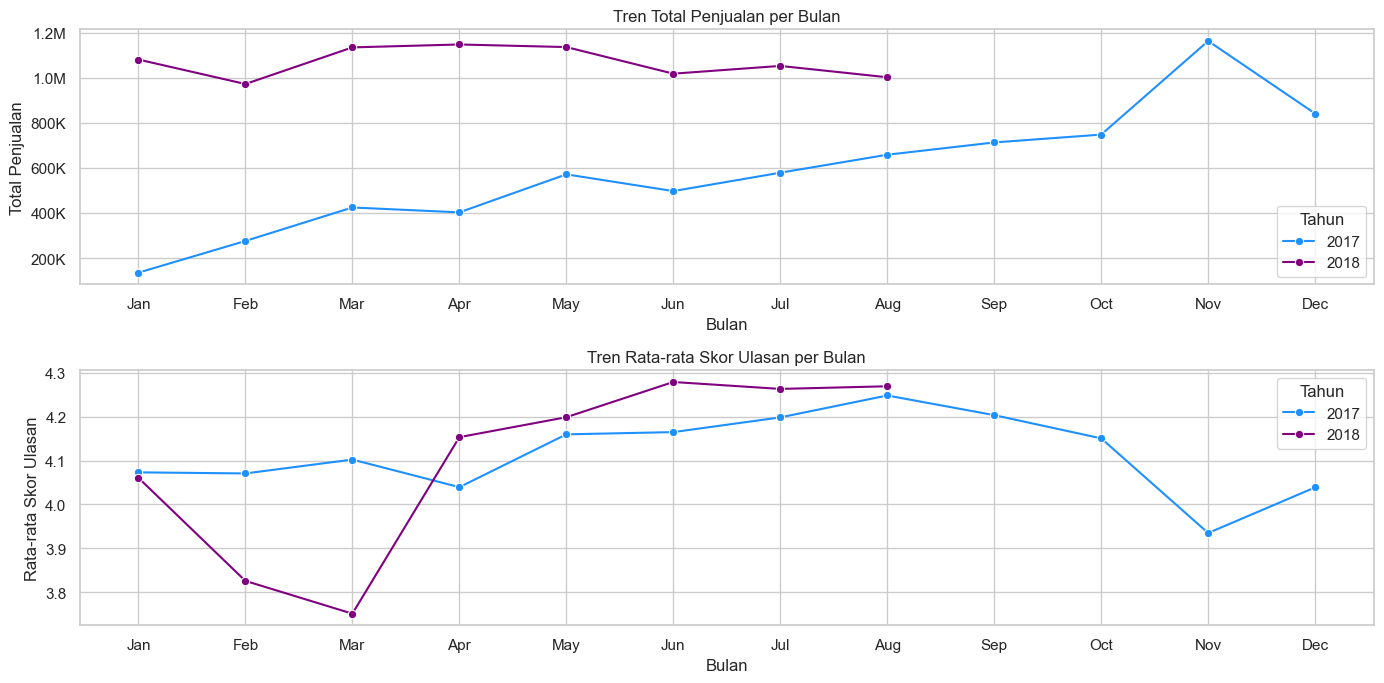

In [77]:
sns.set(style="whitegrid")
colors = {2017: '#1E90FF', 2018: '#800080'}
plt.figure(figsize=(14, 7))

def thousands_formatter(x, _):
    if x >= 1_000_000:
        return f'{x/1_000_000:.1f}M'
    if x >= 1000:
        return f'{x/1000:,.0f}K'
    return f'{x:,.1f}'

def plot_data(y_col, title, ylabel):
    plt.subplot(2, 1, 1 if y_col == 'total_sales_value' else 2)
    for year in colors.keys():
        subset = category_sales_monthly[category_sales_monthly['year'] == year]
        sns.lineplot(data=subset, x='month', y=y_col, label=year, color=colors[year], marker='o', errorbar=None)
    plt.title(title)
    plt.xlabel('Bulan')
    plt.ylabel(ylabel)
    plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands_formatter))
    plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.legend(title='Tahun')


plot_data('total_sales_value', 'Tren Total Penjualan per Bulan', 'Total Penjualan')
plot_data('avg_review_score', 'Tren Rata-rata Skor Ulasan per Bulan', 'Rata-rata Skor Ulasan')
plt.tight_layout()
plt.show()


#### Kesimpulan dan Insight yang didapat
- **Kesimpulan**: Perusahaan mengalami pertumbuhan penjualan dari tahun 2017 ke 2018, dengan puncak pada bulan Oktober 2018. Terdapat fluktuasi penjualan yang signifikan dari bulan ke bulan, terutama pada bulan September 2018. Secara umum, terdapat korelasi positif antara total penjualan dan rata-rata skor ulasan, meskipun terdapat beberapa fluktuasi.
- **Strategi Pemasaran**: Bulan-bulan dengan pertumbuhan tertinggi dalam penjualan menunjukkan bahwa strategi pemasaran yang efektif dapat menghasilkan hasil yang positif. Perusahaan harus menganalisis kampanye pemasaran yang dilakukan pada bulan-bulan tersebut untuk memahami apa yang berhasil dan menerapkannya di masa mendatang.

#### Rekomendasi
- **Peningkatan Kualitas**: Fokus pada peningkatan kualitas produk dan layanan untuk meningkatkan skor ulasan.
- **Analisis Data**: Lakukan analisis lebih mendalam untuk memahami faktor-faktor yang mempengaruhi fluktuasi dalam penjualan dan skor ulasan.
- **Kampanye Pemasaran**: Rencanakan kampanye pemasaran yang lebih terarah berdasarkan data historis untuk memaksimalkan pertumbuhan penjualan. 

# Clustering

In [78]:
import plotly.express as px
import warnings

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn import cluster
from datetime import datetime
from datetime import timedelta
from pandas.plotting import scatter_matrix
from yellowbrick.cluster import SilhouetteVisualizer

In [79]:
def thousands_formatter(x, _):
    if x >= 1_000_000:
        return f'{x/1_000_000:.1f}M'
    if x >= 1000:
        return f'{x:,.0f}'
    return f'{x:,.1f}'

warnings.filterwarnings("ignore", category=FutureWarning)


In [80]:
merged_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96937 entries, 138 to 17094340
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   customer_unique_id        96937 non-null  object        
 1   customer_id               96937 non-null  object        
 2   seller_id                 96937 non-null  object        
 3   order_id                  96937 non-null  object        
 4   product_id                96937 non-null  object        
 5   product_category_name     96937 non-null  object        
 6   price                     96937 non-null  float64       
 7   qty                       96937 non-null  int64         
 8   freight_value             96937 non-null  float64       
 9   total_sales_value         96937 non-null  float64       
 10  payment_type              96937 non-null  object        
 11  payment_sequential        96937 non-null  int64         
 12  payment_installmen

## Data Pre-Processing

In [81]:
df_cluster = merged_clean.copy()
df_cluster_delivered = df_cluster[df_cluster['order_status'] == 'Delivered']
df_cluster_delivered.head()

,customer_unique_id,customer_id,seller_id,order_id,product_id,product_category_name,price,qty,freight_value,total_sales_value,payment_type,payment_sequential,payment_installments,order_purchase_timestamp,order_approved,order_delivered_carrier,order_delivered_customer,order_estimated_delivery,order_status,shipping_limit_date,review_score,review_title,review_message,customer_city,seller_city,customer_state,seller_state,geolocation_state,customer_zip_code,seller_zip_code,latitude,longitude,delivery_estimation_days,delivery_delay_days,year
138,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,7c67e1448b00f6e969d365cea6b010ab,00e7ee1b050b8499577073aeb2a297a1,a9516a079e37a9c9c36b9b78b10169e8,Office Furniture,124.99,1,21.88,146.87,Credit Card,1,2,2017-05-16,2017-05-16,2017-05-23,2017-05-25,2017-06-05,Delivered,2017-05-22,4,No review,No review,Franca,Itaquaquecetuba,São Paulo,São Paulo,SP,14409,8577,-23.494316,-46.364539,13.0,-11.0,2017
309,290c77bc529b7ac935b93aa66c333dc3,18955e83d337fd6b2def6b18a428ac77,b8bc237ba3788b23da09c0f1f3a3288c,29150127e6685892b6eab3eec79f59c7,4aa6014eceb682077f9dc4bffebc05b0,Housewares,289.00,1,46.48,335.48,Credit Card,1,8,2018-01-12,2018-01-12,2018-01-15,2018-01-29,2018-02-06,Delivered,2018-01-18,5,No review,No review,Sao Bernardo Do Campo,Itajai,São Paulo,Santa Catarina,SC,9790,88303,-26.913214,-48.677675,22.0,-8.0,2018
448,060e732b5b29e8181a18229c7b0b2b5e,4e7b3e00288586ebd08712fdd0374a03,7c67e1448b00f6e969d365cea6b010ab,b2059ed67ce144a36e2aa97d2c9e9ad2,bd07b66896d6f1494f5b86251848ced7,Office Furniture,139.94,1,17.79,157.73,Credit Card,1,7,2018-05-19,2018-05-20,2018-06-11,2018-06-14,2018-06-13,Delivered,2018-06-05,5,No review,No review,Sao Paulo,Itaquaquecetuba,São Paulo,São Paulo,SP,1151,8577,-23.494316,-46.364539,2.0,1.0,2018
587,259dac757896d24d7702b9acbbff3f3c,b2b6027bc5c5109e529d4dc6358b12c3,7c67e1448b00f6e969d365cea6b010ab,951670f92359f4fe4a63112aa7306eba,a5647c44af977b148e0a3a4751a09e2e,Office Furniture,149.94,1,23.36,173.30,Credit Card,1,1,2018-03-13,2018-03-13,2018-03-27,2018-03-28,2018-04-10,Delivered,2018-03-27,5,No review,No review,Mogi Das Cruzes,Itaquaquecetuba,São Paulo,São Paulo,SP,8775,8577,-23.494316,-46.364539,14.0,-13.0,2018
873,345ecd01c38d18a9036ed96c73b8d066,4f2d8ab171c80ec8364f7c12e35b23ad,4a3ca9315b744ce9f8e9374361493884,6b7d50bd145f6fc7f33cebabd7e49d0f,9391a573abe00141c56e38d84d7d5b3b,Home Confort,230.00,1,22.25,252.25,Credit Card,1,8,2018-07-29,2018-07-29,2018-07-30,2018-08-09,2018-08-15,Delivered,2018-07-31,5,A melhor nota,O baratheon e esxelente amo adoro o baratheon,Campinas,Ibitinga,São Paulo,São Paulo,SP,13056,14940,-21.754867,-48.838906,16.0,-6.0,2018


In [82]:
seller = df_cluster.groupby('seller_id').agg({
    'order_id': 'nunique',
    'total_sales_value': 'sum'
}).reset_index()
seller.map(commas)

,seller_id,order_id,total_sales_value
0,0015a82c2db000af6aaaf3ae2ecb0532,3,"2,748.06"
1,001cca7ae9ae17fb1caed9dfb1094831,200,"34,098.69"
2,001e6ad469a905060d959994f1b41e4f,1,267.94
3,002100f778ceb8431b7a1020ff7ab48f,50,"1,985.06"
4,004c9cd9d87a3c30c522c48c4fc07416,147,"21,227.99"
...,...,...,...
2993,ffcfefa19b08742c5d315f2791395ee5,1,79.52
2994,ffdd9f82b9a447f6f8d4b91554cc7dd3,18,"2,828.66"
2995,ffeee66ac5d5a62fe688b9d26f83f534,14,"2,259.55"
2996,fffd5413c0700ac820c7069d66d98c89,59,"12,187.04"


## Check Distribution of variables

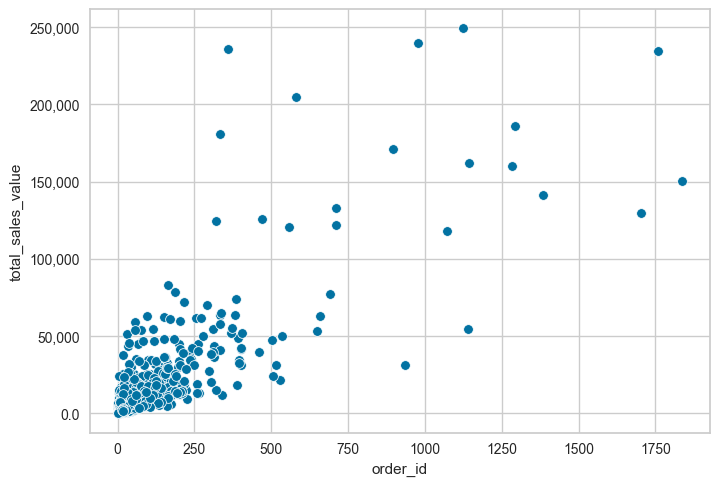

In [83]:
raw_scatter = sns.scatterplot(data = seller, x = 'order_id', y = 'total_sales_value')
plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

## RFM - K-means Testing

In [84]:
scaler = RobustScaler()
robust_df = seller.copy()
robust_df[['order_id', 'total_sales_value']] = scaler.fit_transform(robust_df[['order_id', 'total_sales_value']])
robust_df

,seller_id,order_id,total_sales_value
0,0015a82c2db000af6aaaf3ae2ecb0532,-0.151899,0.446377
1,001cca7ae9ae17fb1caed9dfb1094831,9.822785,8.610880
2,001e6ad469a905060d959994f1b41e4f,-0.253165,-0.199509
3,002100f778ceb8431b7a1020ff7ab48f,2.227848,0.247672
4,004c9cd9d87a3c30c522c48c4fc07416,7.139241,5.259022
...,...,...,...
2993,ffcfefa19b08742c5d315f2791395ee5,-0.253165,-0.248579
2994,ffdd9f82b9a447f6f8d4b91554cc7dd3,0.607595,0.467367
2995,ffeee66ac5d5a62fe688b9d26f83f534,0.405063,0.319157
2996,fffd5413c0700ac820c7069d66d98c89,2.683544,2.904528


In [85]:
c_segment = df_cluster.copy()

c_segment['order_id'] = c_segment['order_id'].str.replace(r'\D', '', regex=True)
c_segment['order_id'] = pd.to_numeric(c_segment['order_id'], errors='coerce', downcast='integer')

distortions = []
K = range(1,16)
for k in K:
    kmeanModel = cluster.KMeans(n_clusters=k, init = 'k-means++', n_init=10)
    kmeanModel.fit(c_segment[['total_sales_value','order_id']])
    distortions.append(kmeanModel.inertia_)

distortions

c:\Users\farid\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\dtypes\cast.py:377: RuntimeWarning: invalid value encountered in cast
  new_result = trans(result).astype(dtype)


[2.2054677990168217e+60,
 2.945889046010194e+59,
 1.2938921146921314e+59,
 4.3621387237510496e+58,
 2.496838021903411e+58,
 1.2959277080476983e+58,
 8.269092087813242e+57,
 4.3958389082746384e+57,
 3.1560273783188676e+57,
 2.4458055674099598e+57,
 1.8479003249076423e+57,
 1.2429486359689244e+57,
 8.991930022145471e+56,
 6.606816322069908e+56,
 5.113706017883948e+56]

<Figure size 1600x800 with 0 Axes>

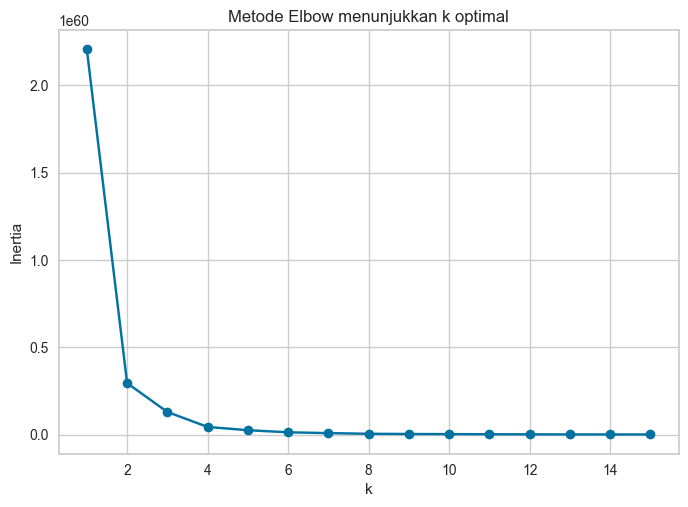

In [86]:
plt.figure(figsize=(16,8))
plt.figure()
plt.plot(K, distortions, '-o')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Metode Elbow menunjukkan k optimal')
plt.show()

### Clustering

In [87]:
cluster_result = seller.copy()
kmeans = KMeans(n_clusters=4)
kmeans.fit(seller[['total_sales_value','order_id']])
cluster_labels = kmeans.labels_
cluster_result['cluster'] = cluster_labels
cluster_result.sort_values(by='total_sales_value', ascending=False).head().map(commas)

,seller_id,order_id,total_sales_value,cluster
836,4869f7a5dfa277a7dca6462dcf3b52b2,"1,125","249,177.84",1
1490,7c67e1448b00f6e969d365cea6b010ab,977,"239,740.31",1
986,53243585a1d6dc2643021fd1853d8905,358,"235,856.68",1
860,4a3ca9315b744ce9f8e9374361493884,"1,757","234,565.66",1
2930,fa1c13f2614d7b5c4749cbc52fecda94,580,"204,490.55",1


In [88]:
cluster_result['cluster'].value_counts()

cluster
0    2520
3     380
2      79
1      19
Name: count, dtype: int64

<Axes: xlabel='order_id', ylabel='total_sales_value'>

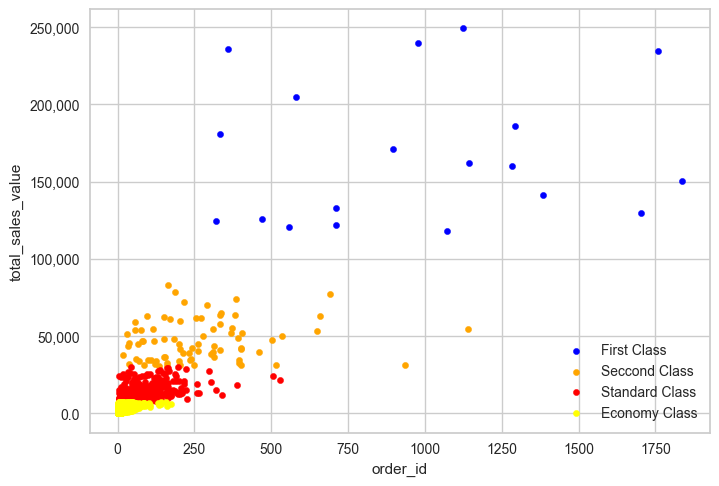

In [89]:
ax = cluster_result[cluster_result['cluster'] == 1].plot.scatter(x='order_id', y='total_sales_value', c='blue', label='First Class')
ax = cluster_result[cluster_result['cluster'] == 2].plot.scatter(x='order_id', y='total_sales_value', c='orange', label='Seccond Class', ax=ax)
ax = cluster_result[cluster_result['cluster'] == 3].plot.scatter(x='order_id', y='total_sales_value', c='red', label='Standard Class', ax=ax)
ax = cluster_result[cluster_result['cluster'] == 0].plot.scatter(x='order_id', y='total_sales_value', c='yellow', label='Economy Class', ax=ax)
plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands_formatter))
ax

## RFM - Scoring Method Seller

### 1. Clustering

In [90]:
base = df_cluster.copy()
timebound = base['order_purchase_timestamp'].max()

seller_rfm = base.groupby('seller_id').agg({
    'order_purchase_timestamp' : lambda x : (timebound- x.max()).days,
    'order_id' : 'nunique',
    'total_sales_value' : 'sum'
}).reset_index()
seller_rfm.columns = ['seller_id','recency','frequency','monetary']
seller_rfm.map(commas)

,seller_id,recency,frequency,monetary
0,0015a82c2db000af6aaaf3ae2ecb0532,315,3,"2,748.06"
1,001cca7ae9ae17fb1caed9dfb1094831,48,200,"34,098.69"
2,001e6ad469a905060d959994f1b41e4f,22,1,267.94
3,002100f778ceb8431b7a1020ff7ab48f,139,50,"1,985.06"
4,004c9cd9d87a3c30c522c48c4fc07416,120,147,"21,227.99"
...,...,...,...,...
2993,ffcfefa19b08742c5d315f2791395ee5,67,1,79.52
2994,ffdd9f82b9a447f6f8d4b91554cc7dd3,10,18,"2,828.66"
2995,ffeee66ac5d5a62fe688b9d26f83f534,107,14,"2,259.55"
2996,fffd5413c0700ac820c7069d66d98c89,3,59,"12,187.04"


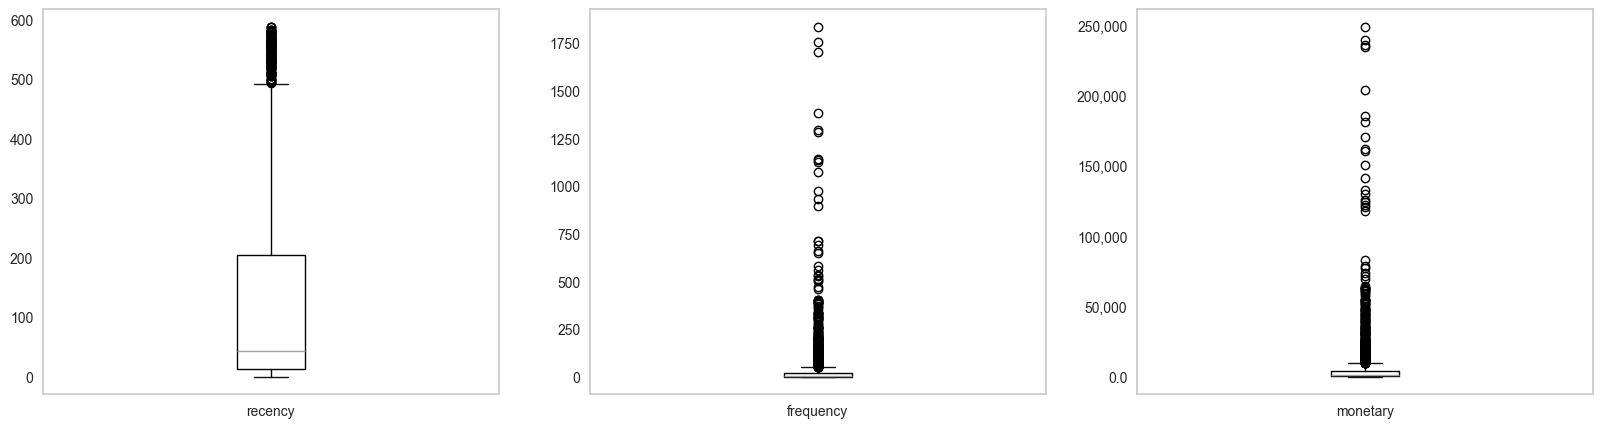

In [91]:
col_list = ['recency','frequency','monetary']
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(20,5))

for i,el in enumerate(col_list):
    a = seller_rfm.boxplot(el, ax=axes.flatten()[i],grid=False)
plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands_formatter))
plt.show()

In [92]:
rfm_seller = seller_rfm.copy()
rfm_seller.columns = ['seller_id','recency','frequency','monetary']
rfm_seller.describe().map(commas)

,recency,frequency,monetary
count,"2,998.00","2,998.00","2,998.00"
mean,129.72,32.33,"5,191.74"
std,160.39,104.99,"16,032.66"
min,0.00,1.00,12.22
25%,13.00,2.00,278.39
50%,44.00,6.00,"1,034.03"
75%,204.75,21.75,"4,118.26"
max,588.00,"1,835.00","249,177.84"


### 2. Scoring

In [93]:
# Rscore
df_rfm_score_seller = rfm_seller.copy()
RFM_quantiles = df_rfm_score_seller[['recency', 'frequency', 'monetary']].quantile(q = [0.2, 0.4, 0.6, 0.8])

df_rfm_score_seller.loc[(df_rfm_score_seller['recency'] <= RFM_quantiles.recency[0.2]), 'Rscore'] = 5
df_rfm_score_seller.loc[(df_rfm_score_seller['recency'] > RFM_quantiles.recency[0.2]) & (df_rfm_score_seller['recency'] <= RFM_quantiles.recency[0.4]), 'Rscore'] = 4
df_rfm_score_seller.loc[(df_rfm_score_seller['recency'] > RFM_quantiles.recency[0.4]) & (df_rfm_score_seller['recency'] <= RFM_quantiles.recency[0.6]), 'Rscore'] = 3
df_rfm_score_seller.loc[(df_rfm_score_seller['recency'] > RFM_quantiles.recency[0.6]) & (df_rfm_score_seller['recency'] <= RFM_quantiles.recency[0.8]), 'Rscore'] = 2
df_rfm_score_seller.loc[(df_rfm_score_seller['recency'] > RFM_quantiles.recency[0.8]), 'Rscore'] = 1

# Fscore
df_rfm_score_seller.loc[(df_rfm_score_seller['frequency'] <= RFM_quantiles.frequency[0.2]), 'Fscore'] = 1
df_rfm_score_seller.loc[(df_rfm_score_seller['frequency'] > RFM_quantiles.frequency[0.2]) & (df_rfm_score_seller['frequency'] <= RFM_quantiles.frequency[0.4]), 'Fscore'] = 2
df_rfm_score_seller.loc[(df_rfm_score_seller['frequency'] > RFM_quantiles.frequency[0.4]) & (df_rfm_score_seller['frequency'] <= RFM_quantiles.frequency[0.6]), 'Fscore'] = 3
df_rfm_score_seller.loc[(df_rfm_score_seller['frequency'] > RFM_quantiles.frequency[0.6]) & (df_rfm_score_seller['frequency'] <= RFM_quantiles.frequency[0.8]), 'Fscore'] = 4
df_rfm_score_seller.loc[(df_rfm_score_seller['frequency'] > RFM_quantiles.frequency[0.8]), 'Fscore'] = 5

# Mscore
df_rfm_score_seller.loc[(df_rfm_score_seller['monetary'] <= RFM_quantiles.monetary[0.2]), 'Mscore'] = 1
df_rfm_score_seller.loc[(df_rfm_score_seller['monetary'] > RFM_quantiles.monetary[0.2]) & (df_rfm_score_seller['monetary'] <= RFM_quantiles.monetary[0.4]), 'Mscore'] = 2
df_rfm_score_seller.loc[(df_rfm_score_seller['monetary'] > RFM_quantiles.monetary[0.4]) & (df_rfm_score_seller['monetary'] <= RFM_quantiles.monetary[0.6]), 'Mscore'] = 3
df_rfm_score_seller.loc[(df_rfm_score_seller['monetary'] > RFM_quantiles.monetary[0.6]) & (df_rfm_score_seller['monetary'] <= RFM_quantiles.monetary[0.8]), 'Mscore'] = 4
df_rfm_score_seller.loc[(df_rfm_score_seller['monetary'] > RFM_quantiles.monetary[0.8]), 'Mscore'] = 5

df_rfm_score_seller['rfm_score'] = df_rfm_score_seller[['Rscore','Fscore','Mscore']].sum(axis=1)
df_rfm_score_seller.map(commas)

,seller_id,recency,frequency,monetary,Rscore,Fscore,Mscore,rfm_score
0,0015a82c2db000af6aaaf3ae2ecb0532,315,3,"2,748.06",1.00,2.00,4.00,7.00
1,001cca7ae9ae17fb1caed9dfb1094831,48,200,"34,098.69",3.00,5.00,5.00,13.00
2,001e6ad469a905060d959994f1b41e4f,22,1,267.94,4.00,1.00,2.00,7.00
3,002100f778ceb8431b7a1020ff7ab48f,139,50,"1,985.06",2.00,5.00,4.00,11.00
4,004c9cd9d87a3c30c522c48c4fc07416,120,147,"21,227.99",2.00,5.00,5.00,12.00
...,...,...,...,...,...,...,...,...
2993,ffcfefa19b08742c5d315f2791395ee5,67,1,79.52,3.00,1.00,1.00,5.00
2994,ffdd9f82b9a447f6f8d4b91554cc7dd3,10,18,"2,828.66",5.00,4.00,4.00,13.00
2995,ffeee66ac5d5a62fe688b9d26f83f534,107,14,"2,259.55",2.00,4.00,4.00,10.00
2996,fffd5413c0700ac820c7069d66d98c89,3,59,"12,187.04",5.00,5.00,5.00,15.00


In [94]:
df_rfm_score_seller['rfm_score'].value_counts().reset_index().set_index('rfm_score')

,count
rfm_score,
11.0,262
5.0,255
6.0,253
8.0,252
15.0,235
10.0,233
4.0,233
12.0,230
7.0,228


### 3. Labeling

In [95]:
df_rfm_score_seller['level'] = 'Bronze'
df_rfm_score_seller.loc[df_rfm_score_seller['rfm_score']>6,'level'] = 'Silver'
df_rfm_score_seller.loc[df_rfm_score_seller['rfm_score']>10,'level'] = 'Gold'
df_rfm_score_seller.loc[df_rfm_score_seller['rfm_score']>13,'level'] = 'Platinum'
df_rfm_score_seller.head().map(commas)

,seller_id,recency,frequency,monetary,Rscore,Fscore,Mscore,rfm_score,level
0,0015a82c2db000af6aaaf3ae2ecb0532,315,3,"2,748.06",1.00,2.00,4.00,7.00,Silver
1,001cca7ae9ae17fb1caed9dfb1094831,48,200,"34,098.69",3.00,5.00,5.00,13.00,Gold
2,001e6ad469a905060d959994f1b41e4f,22,1,267.94,4.00,1.00,2.00,7.00,Silver
3,002100f778ceb8431b7a1020ff7ab48f,139,50,"1,985.06",2.00,5.00,4.00,11.00,Gold
4,004c9cd9d87a3c30c522c48c4fc07416,120,147,"21,227.99",2.00,5.00,5.00,12.00,Gold


In [96]:
df_rfm_score_seller = df_rfm_score_seller[['seller_id', 'level']]
df_rfm_score_seller.head()

,seller_id,level
0,0015a82c2db000af6aaaf3ae2ecb0532,Silver
1,001cca7ae9ae17fb1caed9dfb1094831,Gold
2,001e6ad469a905060d959994f1b41e4f,Silver
3,002100f778ceb8431b7a1020ff7ab48f,Gold
4,004c9cd9d87a3c30c522c48c4fc07416,Gold


## RFM - Scoring Method Buyer ID

### 1. Clustering

In [97]:
buyer_rfm = base.groupby('customer_unique_id').agg({
    'order_purchase_timestamp' : lambda x : (timebound- x.max()).days,
    'order_id' : 'nunique',
    'total_sales_value' : 'sum'}).reset_index()
buyer_rfm.columns = ['customer_unique_id','recency','frequency','monetary']
buyer_rfm.map(commas)

,customer_unique_id,recency,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19
2,0000f46a3911fa3c0805444483337064,537,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,288,1,196.89
...,...,...,...,...
93778,fffcf5a5ff07b0908bd4e2dbc735a684,447,1,"1,838.28"
93779,fffea47cd6d3cc0a88bd621562a9d061,262,1,84.58
93780,ffff371b4d645b6ecea244b27531430a,568,1,112.46
93781,ffff5962728ec6157033ef9805bacc48,119,1,133.69


In [98]:
rfm_customer = buyer_rfm.copy()
rfm_customer.columns = ['customer_unique_id','recency','frequency','monetary']
rfm_customer.describe().map(commas)

,recency,frequency,monetary
count,"93,783.00","93,783.00","93,783.00"
mean,236.34,1.03,165.97
std,151.27,0.21,228.96
min,0.00,1.00,9.59
25%,114.00,1.00,63.01
50%,218.00,1.00,107.59
75%,345.00,1.00,183.26
max,601.00,15.00,"13,664.08"


### 2. Scoring

In [99]:
# Rscore
df_rfm_score_customer = rfm_customer.copy()
RFM_quantiles2 = df_rfm_score_customer[['recency', 'frequency', 'monetary']].quantile(q = [0.2, 0.4, 0.6, 0.8])

df_rfm_score_customer.loc[(df_rfm_score_customer['recency'] <= RFM_quantiles2.recency[0.2]), 'Rscore'] = 5.0
df_rfm_score_customer.loc[(df_rfm_score_customer['recency'] > RFM_quantiles2.recency[0.2]) & (df_rfm_score_customer['recency'] <= RFM_quantiles2.recency[0.4]), 'Rscore'] = 4.0
df_rfm_score_customer.loc[(df_rfm_score_customer['recency'] > RFM_quantiles2.recency[0.4]) & (df_rfm_score_customer['recency'] <= RFM_quantiles2.recency[0.6]), 'Rscore'] = 3.0
df_rfm_score_customer.loc[(df_rfm_score_customer['recency'] > RFM_quantiles2.recency[0.6]) & (df_rfm_score_customer['recency'] <= RFM_quantiles2.recency[0.8]), 'Rscore'] = 2.0
df_rfm_score_customer.loc[(df_rfm_score_customer['recency'] > RFM_quantiles2.recency[0.8]), 'Rscore'] = 1.0

# Fscore
df_rfm_score_customer.loc[(df_rfm_score_customer['frequency'] <= RFM_quantiles2.frequency[0.2]), 'Fscore'] = 1.0
df_rfm_score_customer.loc[(df_rfm_score_customer['frequency'] > RFM_quantiles2.frequency[0.2]) & (df_rfm_score_customer['frequency'] <= RFM_quantiles2.frequency[0.4]), 'Fscore'] = 2.0
df_rfm_score_customer.loc[(df_rfm_score_customer['frequency'] > RFM_quantiles2.frequency[0.4]) & (df_rfm_score_customer['frequency'] <= RFM_quantiles2.frequency[0.6]), 'Fscore'] = 3.0
df_rfm_score_customer.loc[(df_rfm_score_customer['frequency'] > RFM_quantiles2.frequency[0.6]) & (df_rfm_score_customer['frequency'] <= RFM_quantiles2.frequency[0.8]), 'Fscore'] = 4.0
df_rfm_score_customer.loc[(df_rfm_score_customer['frequency'] > RFM_quantiles2.frequency[0.8]), 'Fscore'] = 5.0

# Mscore
df_rfm_score_customer.loc[(df_rfm_score_customer['monetary'] <= RFM_quantiles2.monetary[0.2]), 'Mscore'] = 1.0
df_rfm_score_customer.loc[(df_rfm_score_customer['monetary'] > RFM_quantiles2.monetary[0.2]) & (df_rfm_score_customer['monetary'] <= RFM_quantiles2.monetary[0.4]), 'Mscore'] = 2.0
df_rfm_score_customer.loc[(df_rfm_score_customer['monetary'] > RFM_quantiles2.monetary[0.4]) & (df_rfm_score_customer['monetary'] <= RFM_quantiles2.monetary[0.6]), 'Mscore'] = 3.0
df_rfm_score_customer.loc[(df_rfm_score_customer['monetary'] > RFM_quantiles2.monetary[0.6]) & (df_rfm_score_customer['monetary'] <= RFM_quantiles2.monetary[0.8]), 'Mscore'] = 4.0
df_rfm_score_customer.loc[(df_rfm_score_customer['monetary'] > RFM_quantiles2.monetary[0.8]), 'Mscore'] = 5.0
df_rfm_score_customer['rfm_score'] = df_rfm_score_customer[['Rscore','Fscore','Mscore']].sum(axis=1)
df_rfm_score_customer.map(commas)

,customer_unique_id,recency,frequency,monetary,Rscore,Fscore,Mscore,rfm_score
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90,4.00,1.00,4.00,9.00
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19,4.00,1.00,1.00,6.00
2,0000f46a3911fa3c0805444483337064,537,1,86.22,1.00,1.00,2.00,4.00
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62,2.00,1.00,1.00,4.00
4,0004aac84e0df4da2b147fca70cf8255,288,1,196.89,2.00,1.00,4.00,7.00
...,...,...,...,...,...,...,...,...
93778,fffcf5a5ff07b0908bd4e2dbc735a684,447,1,"1,838.28",1.00,1.00,5.00,7.00
93779,fffea47cd6d3cc0a88bd621562a9d061,262,1,84.58,3.00,1.00,2.00,6.00
93780,ffff371b4d645b6ecea244b27531430a,568,1,112.46,1.00,1.00,3.00,5.00
93781,ffff5962728ec6157033ef9805bacc48,119,1,133.69,4.00,1.00,4.00,9.00


### 3. Labeling

In [100]:
df_rfm_score_customer['level'] = 'Bronze'
df_rfm_score_customer.loc[df_rfm_score_customer['rfm_score']>6,'level'] = 'Silver'
df_rfm_score_customer.loc[df_rfm_score_customer['rfm_score']>10,'level'] = 'Gold'
df_rfm_score_customer.loc[df_rfm_score_customer['rfm_score']>13,'level'] = 'Platinum'
df_rfm_score_customer.head().map(commas)

,customer_unique_id,recency,frequency,monetary,Rscore,Fscore,Mscore,rfm_score,level
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90,4.00,1.00,4.00,9.00,Silver
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19,4.00,1.00,1.00,6.00,Bronze
2,0000f46a3911fa3c0805444483337064,537,1,86.22,1.00,1.00,2.00,4.00,Bronze
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62,2.00,1.00,1.00,4.00,Bronze
4,0004aac84e0df4da2b147fca70cf8255,288,1,196.89,2.00,1.00,4.00,7.00,Silver


In [101]:
df_clustering_customer = df_cluster.merge(df_rfm_score_customer[['customer_unique_id','level']], how = 'left', on = 'customer_unique_id')
df_clustering_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96937 entries, 0 to 96936
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   customer_unique_id        96937 non-null  object        
 1   customer_id               96937 non-null  object        
 2   seller_id                 96937 non-null  object        
 3   order_id                  96937 non-null  object        
 4   product_id                96937 non-null  object        
 5   product_category_name     96937 non-null  object        
 6   price                     96937 non-null  float64       
 7   qty                       96937 non-null  int64         
 8   freight_value             96937 non-null  float64       
 9   total_sales_value         96937 non-null  float64       
 10  payment_type              96937 non-null  object        
 11  payment_sequential        96937 non-null  int64         
 12  payment_installmen

In [102]:
df_rfm_score_customer = df_rfm_score_customer[['customer_unique_id', 'level']]
df_rfm_score_customer.head()

,customer_unique_id,level
0,0000366f3b9a7992bf8c76cfdf3221e2,Silver
1,0000b849f77a49e4a4ce2b2a4ca5be3f,Bronze
2,0000f46a3911fa3c0805444483337064,Bronze
3,0000f6ccb0745a6a4b88665a16c9f078,Bronze
4,0004aac84e0df4da2b147fca70cf8255,Silver


## EDA

In [103]:
fig = df_rfm_score_customer.groupby('level').agg({'customer_unique_id': lambda x: len(x)}).reset_index()

fig.rename(columns={'customer_unique_id': 'Customer Count'}, inplace=True)
fig['percent(%)'] = (fig['Customer Count'] / fig['Customer Count'].sum()) * 100
fig['percent(%)'] = fig['percent(%)'].round(1)

fig.set_index('level').map(commas).sort_values(by=['Customer Count'], ascending=False)

,Customer Count,percent(%)
level,,
Platinum,842,0.90
Silver,"50,771",54.10
Gold,"5,050",5.40
Bronze,"37,120",39.60


In [104]:
colors = ['#6A3805','#e5e4e2','#d4af37','#c0c0c0']

fig = px.treemap(fig, path=['level'],values='Customer Count', width=800, height=400, title="Customer Level")
fig.update_layout(
    treemapcolorway = colors, 
    margin = dict(t=50, l=25, r=25, b=25))

fig.data[0].textinfo = 'label+text+value+percent root'
fig.show()

In [105]:
fig = df_rfm_score_seller.groupby('level').agg({'seller_id': lambda x: len(x)}).reset_index()

# Rename columns
fig.rename(columns={'seller_id': 'Seller Count'}, inplace=True)
fig['percent(%)'] = (fig['Seller Count'] / fig['Seller Count'].sum()) * 100
fig['percent(%)'] = fig['percent(%)'].round(1)

fig.set_index('level').map(commas).sort_values(by=['Seller Count'], ascending=False)

,Seller Count,percent(%)
level,,
Bronze,949,31.70
Silver,939,31.30
Gold,699,23.30
Platinum,411,13.70


In [ ]:
colors = ['#6A3805','#e5e4e2','#d4af37','#c0c0c0']

fig = px.treemap(fig, path=['level'],values='Seller Count', width=800, height=400, title="Seller level")
fig.update_layout(
    treemapcolorway = colors, 
    margin = dict(t=50, l=25, r=25, b=25))

fig.data[0].textinfo = 'label+text+value+percent root'
fig.show()

In [107]:
df_clustering_seller = df_cluster.merge(df_rfm_score_seller[['seller_id','level']], how = 'left', on = 'seller_id')
df_clustering_seller.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96937 entries, 0 to 96936
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   customer_unique_id        96937 non-null  object        
 1   customer_id               96937 non-null  object        
 2   seller_id                 96937 non-null  object        
 3   order_id                  96937 non-null  object        
 4   product_id                96937 non-null  object        
 5   product_category_name     96937 non-null  object        
 6   price                     96937 non-null  float64       
 7   qty                       96937 non-null  int64         
 8   freight_value             96937 non-null  float64       
 9   total_sales_value         96937 non-null  float64       
 10  payment_type              96937 non-null  object        
 11  payment_sequential        96937 non-null  int64         
 12  payment_installmen

In [108]:
df_clustering_customer['order_status'].value_counts()

order_status
Delivered     94854
Shipped        1073
Canceled        434
Invoiced        288
Processing      286
Approved          2
Name: count, dtype: int64

In [109]:
df_clustering_customer.order_status = df_clustering_customer.order_status.replace({'Delivered': 'Delivered', 'Shipped': 'Delivered', 'Processing':'Processing', 'Invoiced': 'Processing', 'Approved':'Delivered', 'Canceled':'Canceled'})
df_clustering_customer['order_status'].value_counts()

order_status
Delivered     95929
Processing      574
Canceled        434
Name: count, dtype: int64

In [110]:
df_stat = df_clustering_seller['order_status'].isin(['Delivered', 'Canceled', 'Processing'])
seller_lvl = df_clustering_seller.loc[df_stat].groupby(['level', 'order_status']).agg({
    'order_id':'nunique',
    'seller_id':'nunique',
}).reset_index()

order = ['Bronze', 'Silver', 'Gold', 'Platinum']
seller_lvl['level'] = pd.Categorical(seller_lvl['level'], categories=order, ordered=True)
seller_lvl = seller_lvl.sort_values(by='level')

seller_lvl.set_index('level').map(commas)

,order_status,order_id,seller_id
level,,,
Bronze,Canceled,80,73
Bronze,Delivered,"1,511",835
Bronze,Processing,118,99
Silver,Canceled,82,70
Silver,Delivered,"6,683",934
Silver,Processing,65,43
Gold,Canceled,122,81
Gold,Delivered,"22,601",699
Gold,Processing,66,30


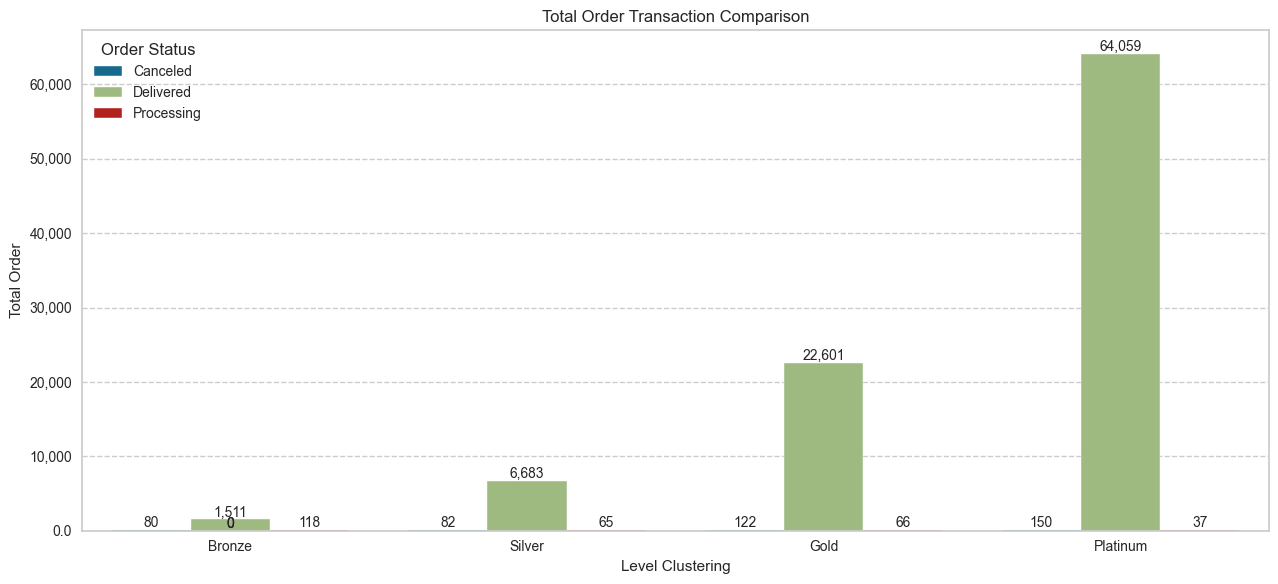

In [111]:
plt.figure(figsize=(25, 6))

ax = plt.subplot(1, 2, 1)
sns.barplot(x='level', y='order_id', hue='order_status', data=seller_lvl)
plt.title('Total Order Transaction Comparison')
plt.xlabel('Level Clustering')
plt.ylabel('Total Order')
plt.legend(title='Order Status', loc='upper left')
for bar in ax.patches:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval, f'{int(yval):,}', 
        ha='center', va='bottom', fontsize=10)
plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands_formatter))
plt.grid(axis='y', linestyle='--')

plt.tight_layout()
plt.show()

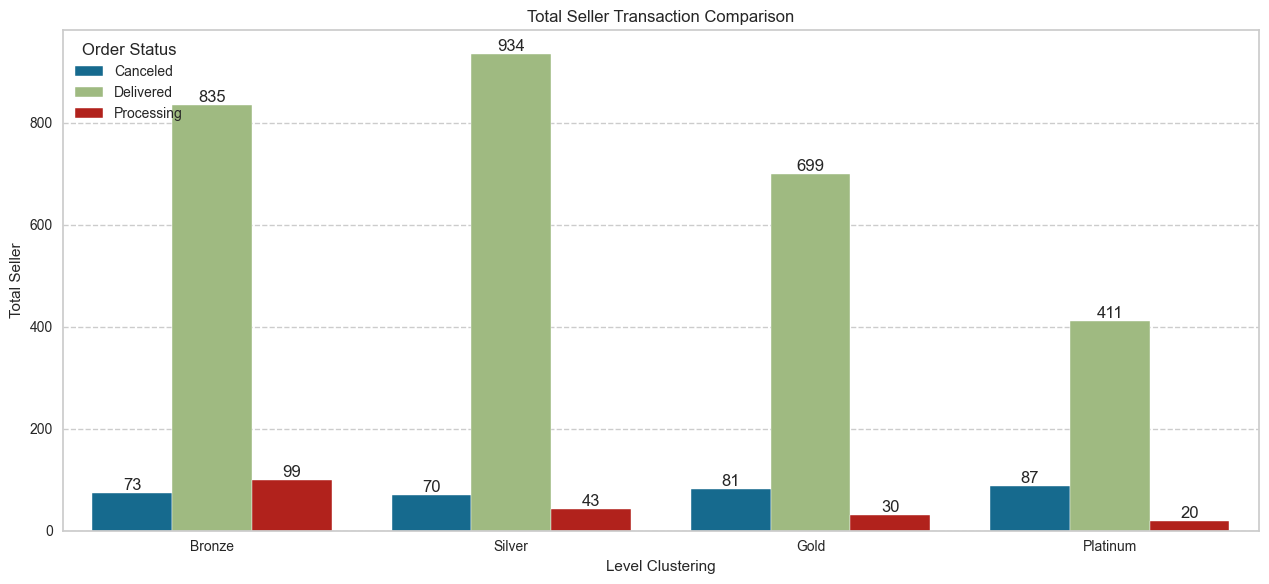

In [112]:
plt.figure(figsize=(25, 6))

ax = plt.subplot(1, 2, 1)
sns.barplot(x='level', y='seller_id', hue='order_status', data=seller_lvl)
plt.title('Total Seller Transaction Comparison')
plt.xlabel('Level Clustering')
plt.ylabel('Total Seller')
plt.legend(title='Order Status', loc='upper left')
for i in ax.containers:
    ax.bar_label(i)
plt.grid(axis='y', linestyle='--')

plt.tight_layout()
plt.show()

In [113]:
cluster_seller = df_clustering_seller.groupby(['level']).agg({
    'order_id':'count',
    'seller_id':'nunique',
    'total_sales_value':'sum',
}).reset_index()

cluster_seller = cluster_seller.sort_values(by='total_sales_value', ascending=False)
cluster_seller.map(commas).set_index('level')

,order_id,seller_id,total_sales_value
level,,,
Platinum,"65,099",411,"9,579,409.26"
Gold,"23,136",699,"4,332,133.68"
Silver,"6,952",939,"1,376,190.32"
Bronze,"1,750",949,"277,089.08"


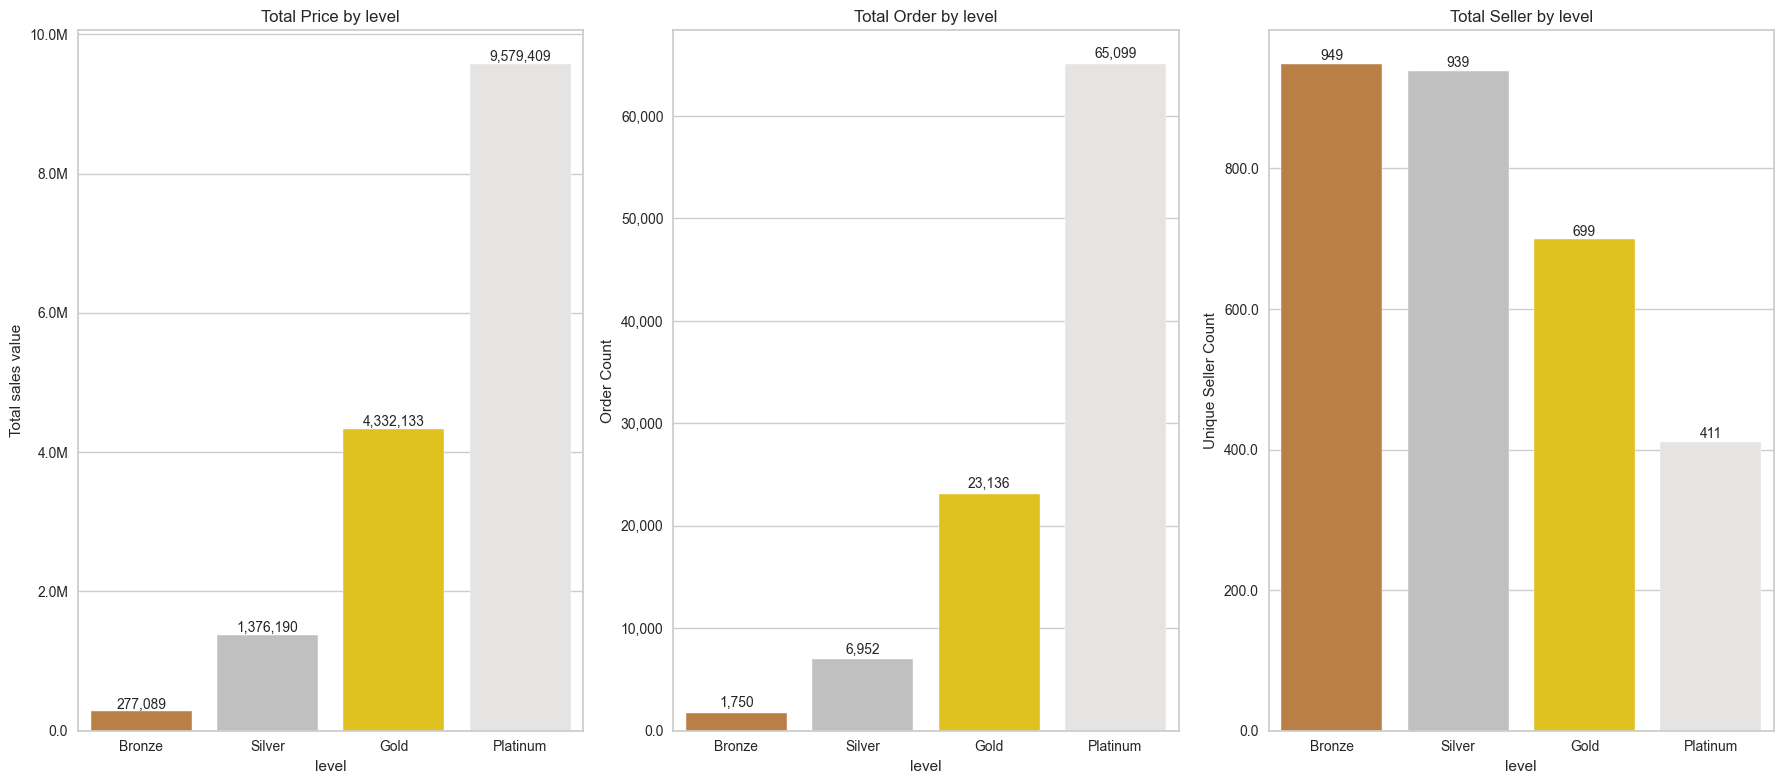

In [114]:
def plot_bar_chart(ax, data, x, y, title, ylabel, colors, order, label_offset=250):
    sns.barplot(data=data, x=x, y=y, palette=colors, order=order, ax=ax)
    ax.set_title(title)
    ax.set_xlabel(x)
    ax.set_ylabel(ylabel)
    ax.yaxis.set_major_formatter(FuncFormatter(thousands_formatter))
    for bar in ax.patches:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, yval + label_offset, f'{int(yval):,}', 
                ha='center', va='bottom', fontsize=10)

order = ['Bronze', 'Silver', 'Gold', 'Platinum']
filtered_data = cluster_seller[cluster_seller['level'].isin(order)]
filtered_data['level'] = pd.Categorical(filtered_data['level'], categories=order, ordered=True)
colors = ['#cd7f32', '#c0c0c0', '#ffd700', '#e5e4e2']

plt.figure(figsize=(18, 8))

# Subplot 1: Total price
ax1 = plt.subplot(1, 3, 1)
plot_bar_chart(ax1, filtered_data, 'level', 'total_sales_value', 'Total Price by level', 'Total sales value', colors, order)
# Subplot 2: Order Count
ax2 = plt.subplot(1, 3, 2)
plot_bar_chart(ax2, filtered_data, 'level', 'order_id', 'Total Order by level', 'Order Count', colors, order)
# Subplot 3: Unique Seller Count
ax3 = plt.subplot(1, 3, 3)
plot_bar_chart(ax3, filtered_data, 'level', 'seller_id', 'Total Seller by level', 'Unique Seller Count', colors, order, label_offset=1)

plt.tight_layout()
plt.show()

## Cohort Monthly Level

In [115]:
df_clustering_customer[df_clustering_seller['level']=='Platinum']

,customer_unique_id,customer_id,seller_id,order_id,product_id,product_category_name,price,qty,freight_value,total_sales_value,payment_type,payment_sequential,payment_installments,order_purchase_timestamp,order_approved,order_delivered_carrier,order_delivered_customer,order_estimated_delivery,order_status,shipping_limit_date,review_score,review_title,review_message,customer_city,seller_city,customer_state,seller_state,geolocation_state,customer_zip_code,seller_zip_code,latitude,longitude,delivery_estimation_days,delivery_delay_days,year,level
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,7c67e1448b00f6e969d365cea6b010ab,00e7ee1b050b8499577073aeb2a297a1,a9516a079e37a9c9c36b9b78b10169e8,Office Furniture,124.99,1,21.88,146.87,Credit Card,1,2,2017-05-16,2017-05-16,2017-05-23,2017-05-25,2017-06-05,Delivered,2017-05-22,4,No review,No review,Franca,Itaquaquecetuba,São Paulo,São Paulo,SP,14409,8577,-23.494316,-46.364539,13.0,-11.0,2017,Bronze
2,060e732b5b29e8181a18229c7b0b2b5e,4e7b3e00288586ebd08712fdd0374a03,7c67e1448b00f6e969d365cea6b010ab,b2059ed67ce144a36e2aa97d2c9e9ad2,bd07b66896d6f1494f5b86251848ced7,Office Furniture,139.94,1,17.79,157.73,Credit Card,1,7,2018-05-19,2018-05-20,2018-06-11,2018-06-14,2018-06-13,Delivered,2018-06-05,5,No review,No review,Sao Paulo,Itaquaquecetuba,São Paulo,São Paulo,SP,1151,8577,-23.494316,-46.364539,2.0,1.0,2018,Silver
3,259dac757896d24d7702b9acbbff3f3c,b2b6027bc5c5109e529d4dc6358b12c3,7c67e1448b00f6e969d365cea6b010ab,951670f92359f4fe4a63112aa7306eba,a5647c44af977b148e0a3a4751a09e2e,Office Furniture,149.94,1,23.36,173.30,Credit Card,1,1,2018-03-13,2018-03-13,2018-03-27,2018-03-28,2018-04-10,Delivered,2018-03-27,5,No review,No review,Mogi Das Cruzes,Itaquaquecetuba,São Paulo,São Paulo,SP,8775,8577,-23.494316,-46.364539,14.0,-13.0,2018,Silver
4,345ecd01c38d18a9036ed96c73b8d066,4f2d8ab171c80ec8364f7c12e35b23ad,4a3ca9315b744ce9f8e9374361493884,6b7d50bd145f6fc7f33cebabd7e49d0f,9391a573abe00141c56e38d84d7d5b3b,Home Confort,230.00,1,22.25,252.25,Credit Card,1,8,2018-07-29,2018-07-29,2018-07-30,2018-08-09,2018-08-15,Delivered,2018-07-31,5,A melhor nota,O baratheon e esxelente amo adoro o baratheon,Campinas,Ibitinga,São Paulo,São Paulo,SP,13056,14940,-21.754867,-48.838906,16.0,-6.0,2018,Gold
5,4c93744516667ad3b8f1fb645a3116a4,879864dab9bc3047522c92c82e1212b8,8f2ce03f928b567e3d56181ae20ae952,5741ea1f91b5fbab2bd2dc653a5b5099,0be701e03657109a8a4d5168122777fb,Sports Leisure,259.90,1,22.31,282.21,Debit Card,1,1,2017-09-14,2017-09-14,2017-09-18,2017-09-28,2017-10-04,Delivered,2017-09-20,5,No review,Loja responsavel,Jaragua Do Sul,Pirituba,Santa Catarina,São Paulo,SP,89254,5141,-23.491300,-46.731735,16.0,-6.0,2017,Gold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96927,ca186065de6e2d01cfc99763e6d62048,be842c57a8c5a62e9585dd72f22b6338,4c18691b6037662be2df78a765d98ab5,75c3993b743335fa57b1645f056b59d2,c65f71634a9d0de5b4a1d7dbb6d3ae01,Housewares,45.50,1,18.23,63.73,Boleto,1,1,2018-06-05,2018-06-06,2018-06-07,2018-06-13,2018-07-23,Delivered,2018-06-14,5,Recomendado,Otimo,Marau,Sao Paulo,Rio Grande do Sul,São Paulo,SP,99150,3167,-23.554830,-46.594355,46.0,-40.0,2018,Silver
96928,d111b06b6f3a2add0d2241325f65b5ca,f255d679c7c86c24ef4861320d5b7675,9f505651f4a6abe901a56cdc21508025,ca978d2459ea2c5ef6d5fde02be26b9c,163da86e86f0089de089399c28c3fcbb,Computers Accessories,99.00,1,9.59,108.59,Credit Card,1,3,2018-03-06,2018-03-06,2018-03-06,2018-03-07,2018-03-19,Delivered,2018-03-13,5,No review,No review,Rio Claro,Sao Paulo,São Paulo,São Paulo,SP,13500,4102,-23.592534,-46.631700,13.0,-12.0,2018,Silver
96932,1a29b476fee25c95fbafc67c5ac95cf8,17ddf5dd5d51696bb3d7c6291687be6f,527801b552d0077ffd170872eb49683b,6760e20addcf0121e9d58f2f1ff14298,ccb4503d9d43d245d3b295d0544f988b,Books General Interest,74.90,1,13.88,88.78,Credit Card,1,6,2018-04-07,2018-04-07,2018-04-11,2018-04-13,2018-04-25,Delivered,2018-04-12,4,Recom

In [116]:
from operator import attrgetter

df_clustering_seller['month_year'] = df_clustering_seller['order_purchase_timestamp'].dt.to_period('M')
df_clustering_seller['cohort_month'] = df_clustering_seller.groupby('seller_id')['order_purchase_timestamp'].transform('min').dt.to_period('M')

df_cohort_month = df_clustering_seller[df_clustering_seller['level'] == 'Platinum']
df_cohort_month_platinum = df_cohort_month.groupby(['cohort_month', 'month_year']).agg(n_buyer=('seller_id', 'nunique')).reset_index()

df_cohort_month_platinum['period_number'] = (df_cohort_month_platinum.month_year - df_cohort_month_platinum.cohort_month).apply(attrgetter('n'))
df_cohort_month_platinum

,cohort_month,month_year,n_buyer,period_number
0,2017-01,2017-01,65,0
1,2017-01,2017-02,62,1
2,2017-01,2017-03,60,2
3,2017-01,2017-04,60,3
4,2017-01,2017-05,62,4
...,...,...,...,...
205,2018-06,2018-07,4,1
206,2018-06,2018-08,4,2
207,2018-07,2018-07,2,0
208,2018-07,2018-08,2,1


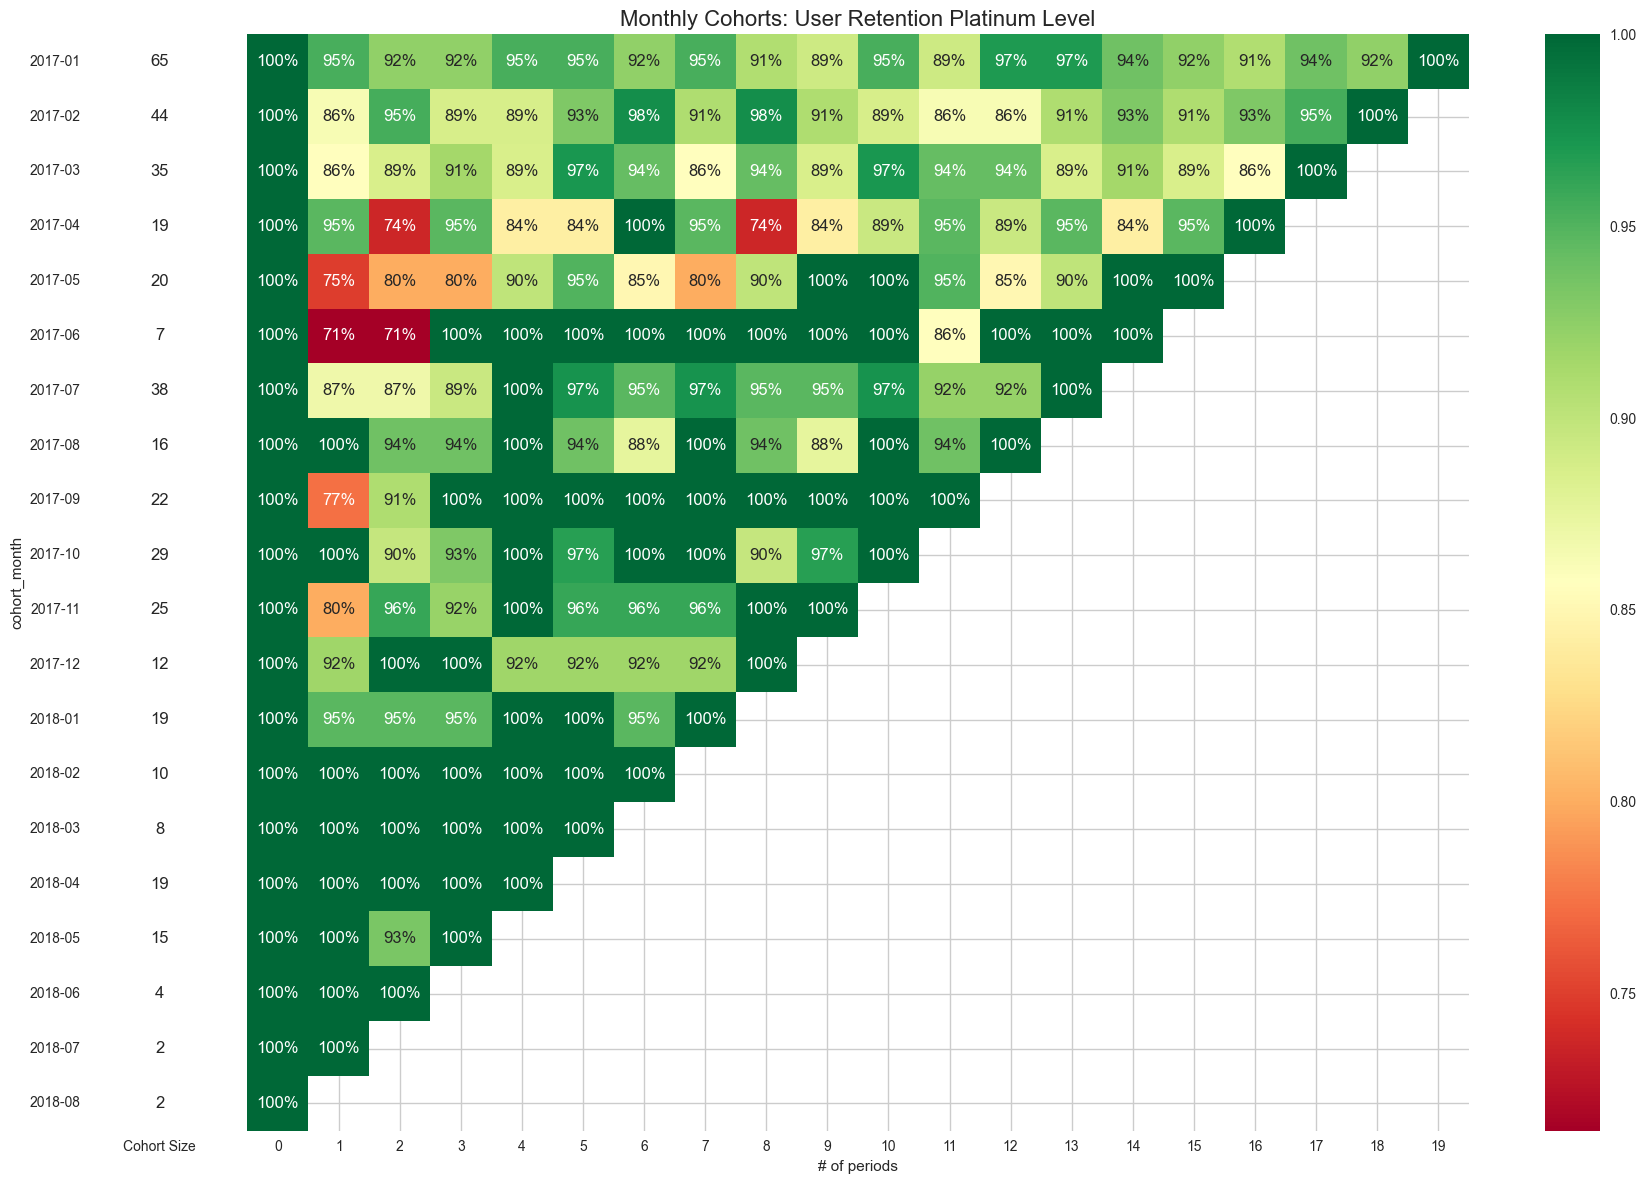

In [117]:
cohort_pivot_month_platinum = df_cohort_month_platinum.pivot_table(index = 'cohort_month', columns = 'period_number', values = 'n_buyer')
cohort_size_month_platinum = cohort_pivot_month_platinum.iloc[:,0]
retention_matrix_month_platinum = cohort_pivot_month_platinum.divide(cohort_size_month_platinum, axis = 0)

fig, ax = plt.subplots(1, 2, figsize=(18, 12), sharey=True, gridspec_kw={'width_ratios': [1, 11]})

sns.heatmap(retention_matrix_month_platinum, 
            mask=retention_matrix_month_platinum.isnull(),
            annot=True, fmt='.0%', cmap='RdYlGn', ax=ax[1])
ax[1].set_title('Monthly Cohorts: User Retention Platinum Level', fontsize=16)
ax[1].set(xlabel='# of periods', ylabel='')

sns.heatmap(pd.DataFrame(cohort_size_month_platinum).rename(columns={0: 'Cohort Size'}), 
            annot=True, cbar=False, cmap=mcolors.ListedColormap(['white']), ax=ax[0])

fig.tight_layout()
plt.show()

- Inisght:
  - Mempertahankan tingkat retensi yang tinggi sangat penting untuk keberlangsungan layanan, dan ada peluang untuk memperbaiki strategi retensi, terutama untuk cohort baru. Penyebab penurunan retensi pada cohort tertentu harus dianalisis lebih lanjut, mungkin melalui survei pengguna atau analisis data tambahan. Secara keseluruhan, keberhasilan retensi di cohort awal dapat dijadikan acuan untuk meningkatkan retensi di cohort berikutnya.
- Rekomendasi:
  - Pentingnya mempertahankan pengalaman pengguna yang baik sejak awal untuk mengurangi churn (pengurangan pengguna). Strategi peningkatan bisa difokuskan pada pemahaman kebutuhan pengguna baru dan meningkatkan engagement pada bulan-bulan awal setelah registrasi.

In [118]:
df_cohort_month = df_clustering_seller[df_clustering_seller['level'] == 'Gold']
df_cohort_month_gold = df_cohort_month.groupby(['cohort_month', 'month_year']).agg(n_buyer=('seller_id', 'nunique')).reset_index()

df_cohort_month_gold['period_number'] = (df_cohort_month_gold.month_year - df_cohort_month_gold.cohort_month).apply(attrgetter('n'))
df_cohort_month_gold

,cohort_month,month_year,n_buyer,period_number
0,2017-01,2017-01,66,0
1,2017-01,2017-02,57,1
2,2017-01,2017-03,60,2
3,2017-01,2017-04,53,3
4,2017-01,2017-05,52,4
...,...,...,...,...
205,2018-06,2018-07,41,1
206,2018-06,2018-08,42,2
207,2018-07,2018-07,33,0
208,2018-07,2018-08,31,1


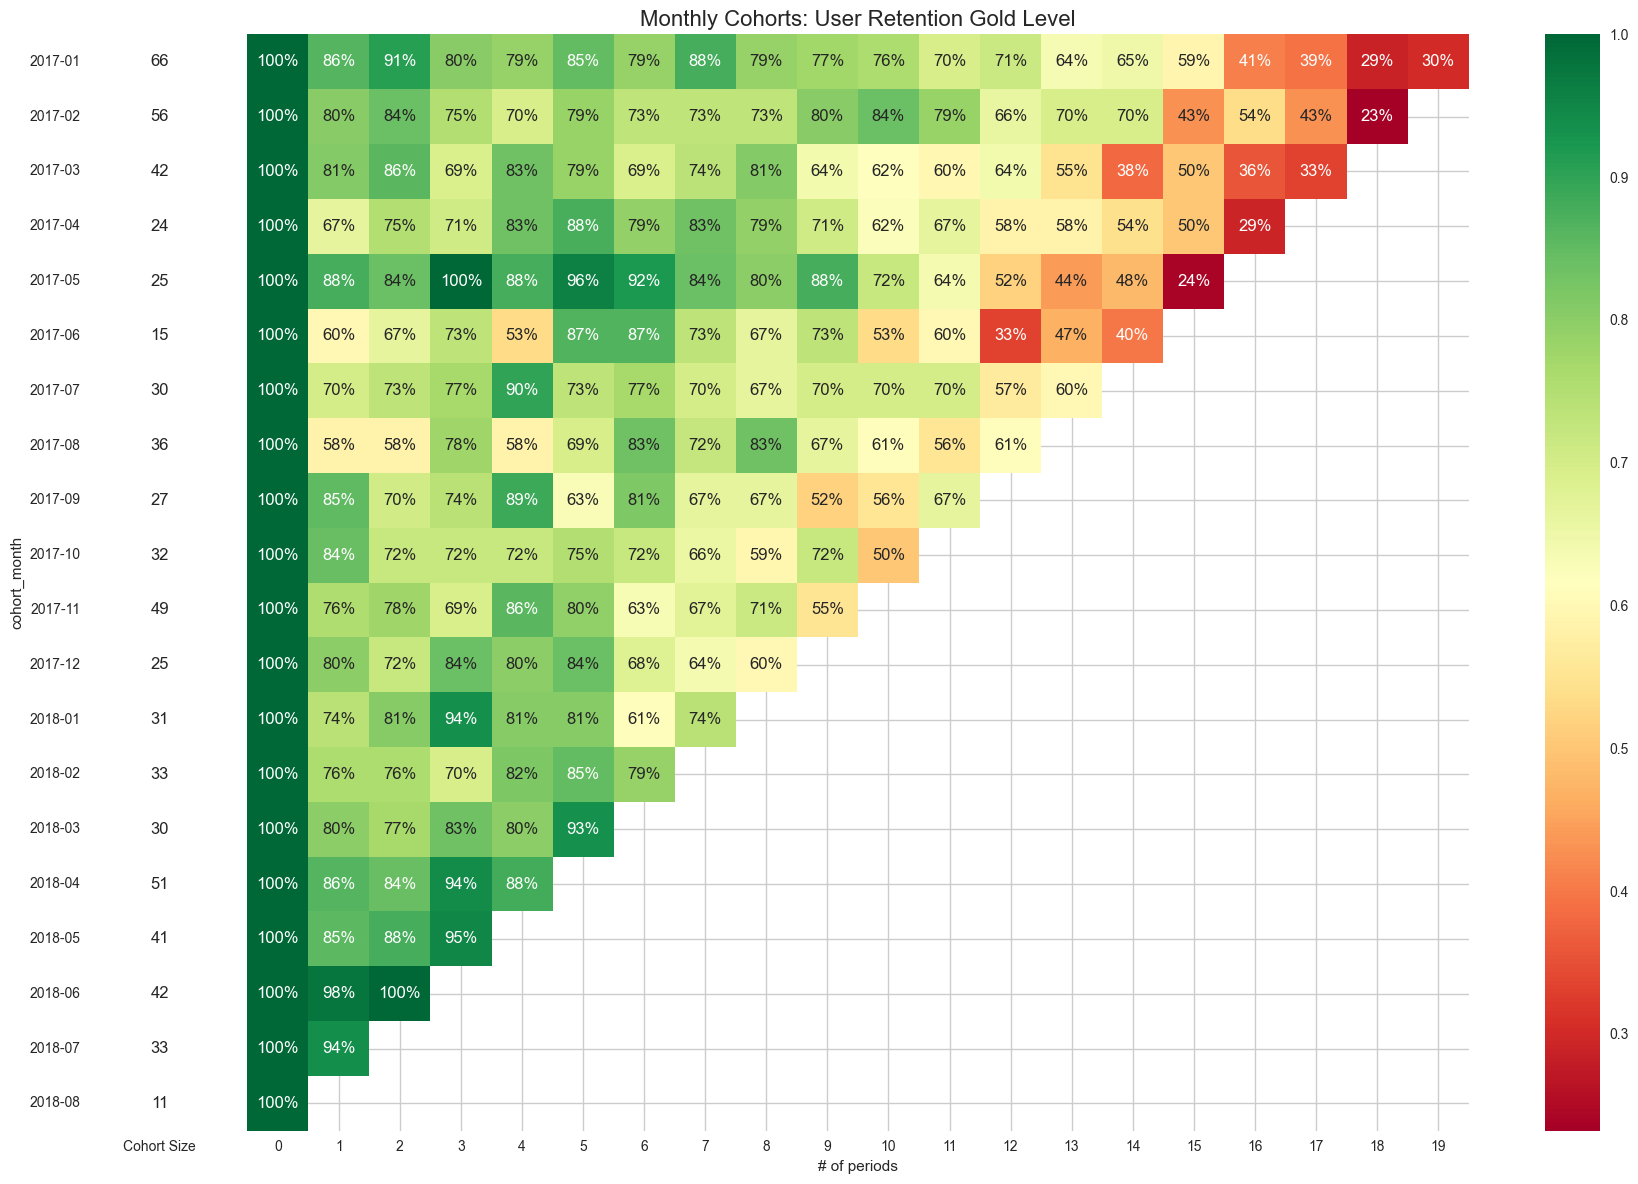

In [119]:
cohort_pivot_month_gold = df_cohort_month_gold.pivot_table(index = 'cohort_month', columns = 'period_number', values = 'n_buyer')
cohort_size_month_gold = cohort_pivot_month_gold.iloc[:,0]
retention_matrix_month_gold = cohort_pivot_month_gold.divide(cohort_size_month_gold, axis = 0)

fig, ax = plt.subplots(1, 2, figsize=(18, 12), sharey=True, gridspec_kw={'width_ratios': [1, 11]})

sns.heatmap(retention_matrix_month_gold, 
            mask=retention_matrix_month_gold.isnull(),
            annot=True, fmt='.0%', cmap='RdYlGn', ax=ax[1])
ax[1].set_title('Monthly Cohorts: User Retention Gold Level', fontsize=16)
ax[1].set(xlabel='# of periods', ylabel='')

sns.heatmap(pd.DataFrame(cohort_size_month_gold).rename(columns={0: 'Cohort Size'}), 
            annot=True, cbar=False, cmap=mcolors.ListedColormap(['white']), ax=ax[0])

fig.tight_layout()
plt.show()

In [120]:
df_cohort_month = df_clustering_seller[df_clustering_seller['level'] == 'Silver']
df_cohort_month_silver = df_cohort_month.groupby(['cohort_month', 'month_year']).agg(n_buyer=('seller_id', 'nunique')).reset_index()

df_cohort_month_silver['period_number'] = (df_cohort_month_silver.month_year - df_cohort_month_silver.cohort_month).apply(attrgetter('n'))
df_cohort_month_silver

,cohort_month,month_year,n_buyer,period_number
0,2017-01,2017-01,51,0
1,2017-01,2017-02,34,1
2,2017-01,2017-03,35,2
3,2017-01,2017-04,24,3
4,2017-01,2017-05,28,4
...,...,...,...,...
202,2018-06,2018-07,45,1
203,2018-06,2018-08,60,2
204,2018-07,2018-07,76,0
205,2018-07,2018-08,68,1


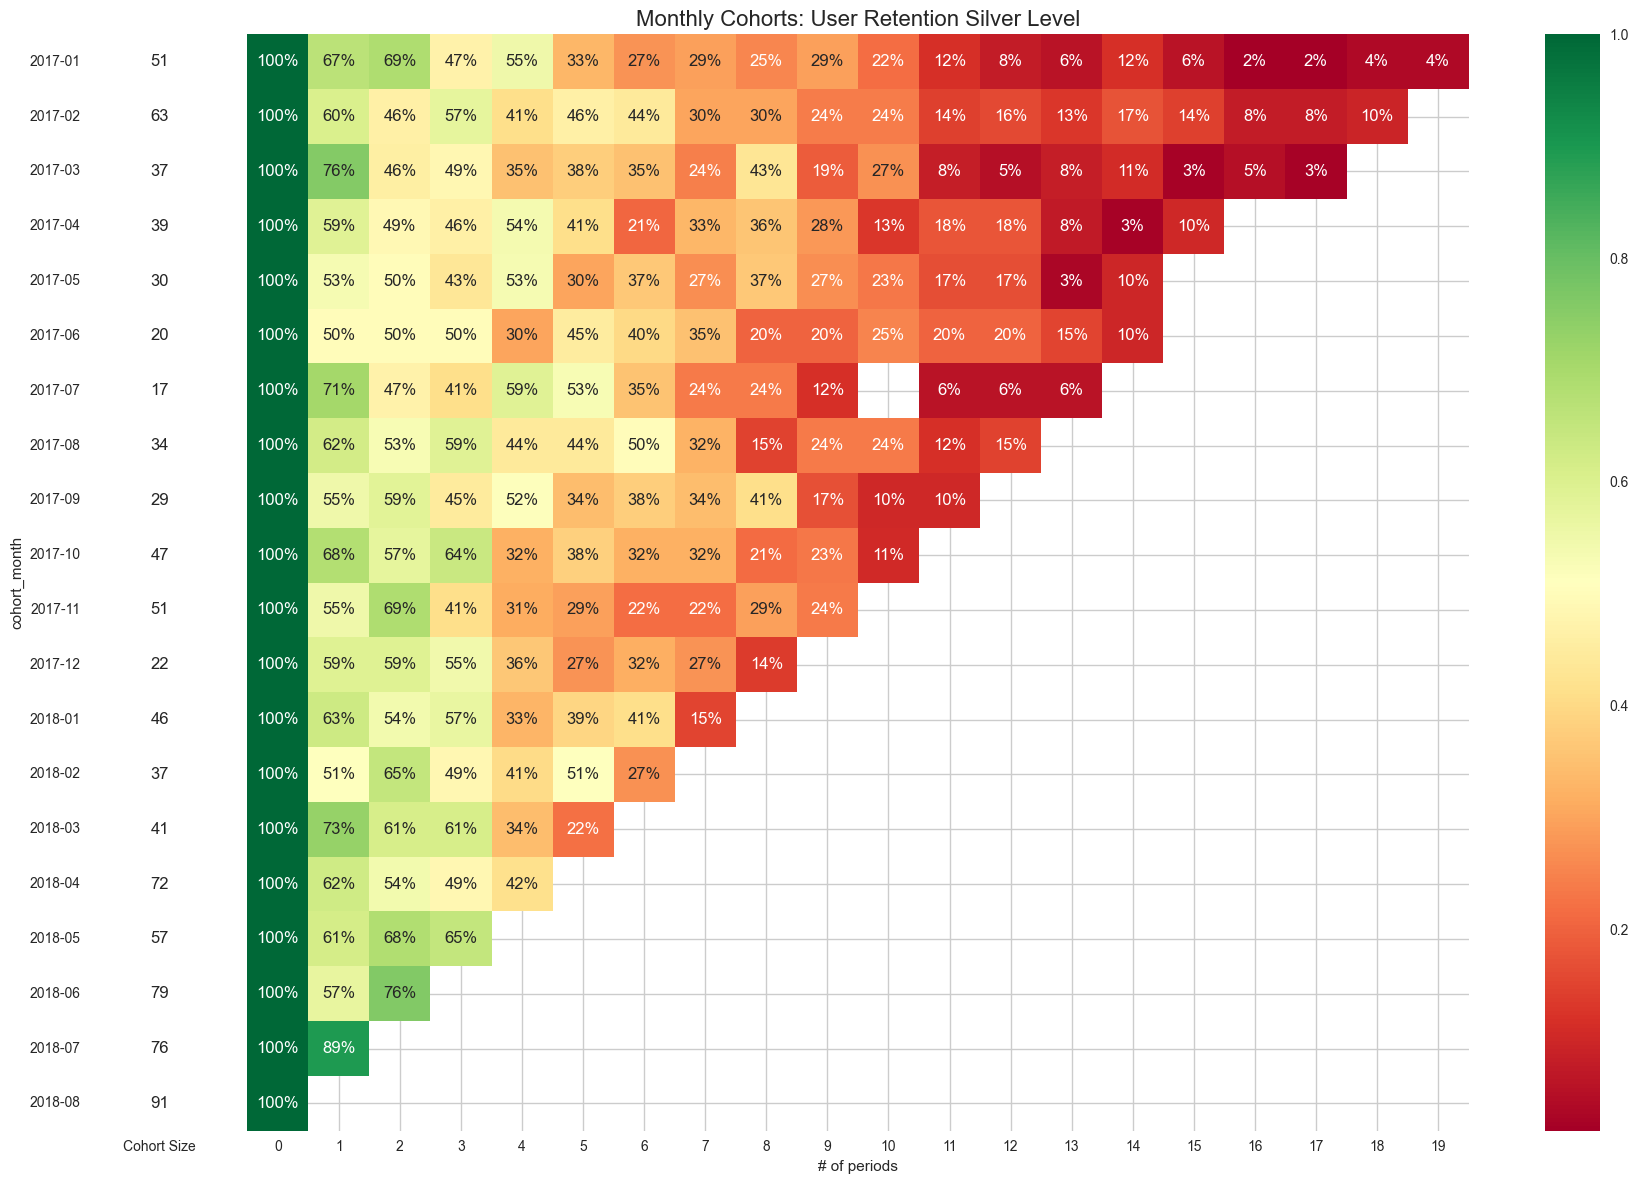

In [121]:
cohort_pivot_month_silver = df_cohort_month_silver.pivot_table(index = 'cohort_month', columns = 'period_number', values = 'n_buyer')
cohort_size_month_silver = cohort_pivot_month_silver.iloc[:,0]
retention_matrix_month_silver = cohort_pivot_month_silver.divide(cohort_size_month_silver, axis = 0)

fig, ax = plt.subplots(1, 2, figsize=(18, 12), sharey=True, gridspec_kw={'width_ratios': [1, 11]})

sns.heatmap(retention_matrix_month_silver, 
            mask=retention_matrix_month_silver.isnull(),
            annot=True, fmt='.0%', cmap='RdYlGn', ax=ax[1])
ax[1].set_title('Monthly Cohorts: User Retention Silver Level', fontsize=16)
ax[1].set(xlabel='# of periods', ylabel='')

sns.heatmap(pd.DataFrame(cohort_size_month_silver).rename(columns={0: 'Cohort Size'}), 
            annot=True, cbar=False, cmap=mcolors.ListedColormap(['white']), ax=ax[0])

fig.tight_layout()
plt.show()

In [122]:
df_cohort_month = df_clustering_seller[df_clustering_seller['level'] == 'Bronze']
df_cohort_month_bronze = df_cohort_month.groupby(['cohort_month', 'month_year']).agg(n_buyer=('seller_id', 'nunique')).reset_index()

df_cohort_month_bronze['period_number'] = (df_cohort_month_bronze.month_year - df_cohort_month_bronze.cohort_month).apply(attrgetter('n'))
df_cohort_month_bronze

,cohort_month,month_year,n_buyer,period_number
0,2017-01,2017-01,40,0
1,2017-01,2017-02,14,1
2,2017-01,2017-03,8,2
3,2017-01,2017-04,3,3
4,2017-01,2017-05,3,4
...,...,...,...,...
129,2018-06,2018-07,14,1
130,2018-06,2018-08,4,2
131,2018-07,2018-07,80,0
132,2018-07,2018-08,6,1


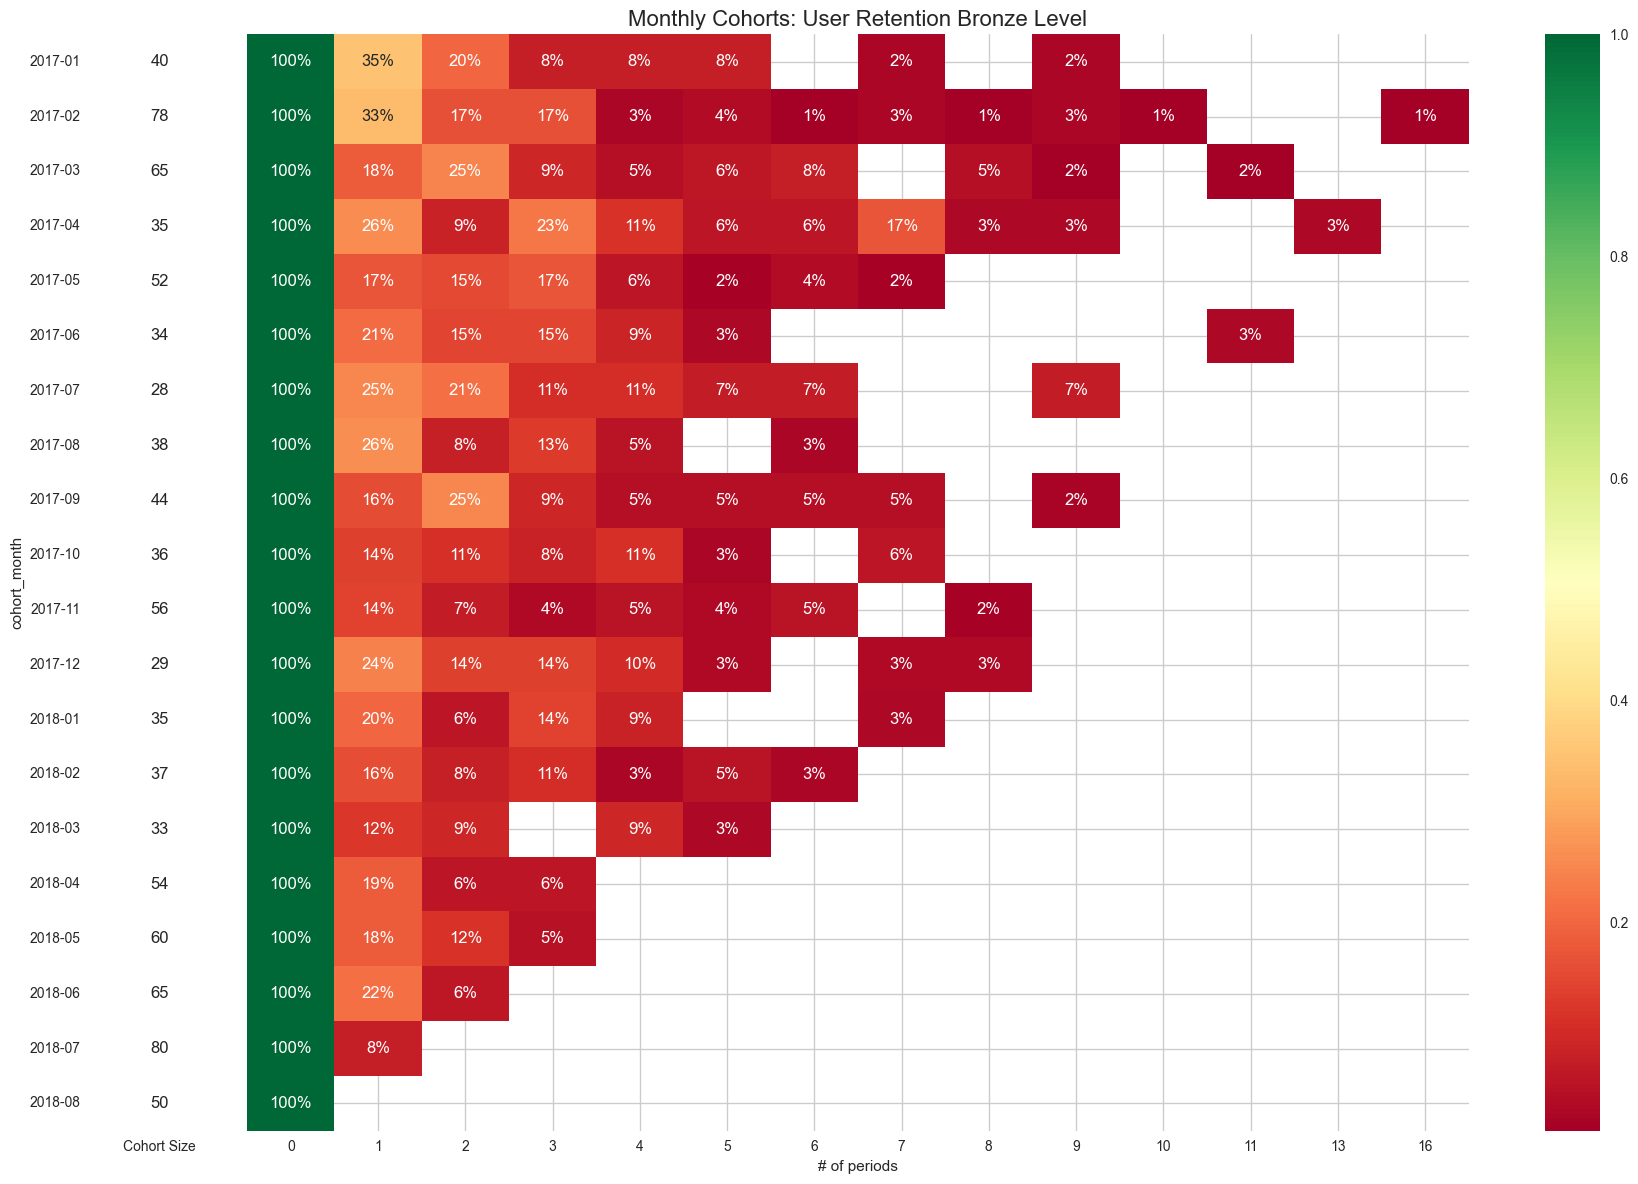

In [123]:
cohort_pivot_month_bronze = df_cohort_month_bronze.pivot_table(index = 'cohort_month', columns = 'period_number', values = 'n_buyer')
cohort_size_month_bronze = cohort_pivot_month_bronze.iloc[:,0]
retention_matrix_month_bronze = cohort_pivot_month_bronze.divide(cohort_size_month_bronze, axis = 0)

fig, ax = plt.subplots(1, 2, figsize=(18, 12), sharey=True, gridspec_kw={'width_ratios': [1, 11]})

sns.heatmap(retention_matrix_month_bronze, 
            mask=retention_matrix_month_bronze.isnull(),
            annot=True, fmt='.0%', cmap='RdYlGn', ax=ax[1])
ax[1].set_title('Monthly Cohorts: User Retention Bronze Level', fontsize=16)
ax[1].set(xlabel='# of periods', ylabel='')

sns.heatmap(pd.DataFrame(cohort_size_month_bronze).rename(columns={0: 'Cohort Size'}), 
            annot=True, cbar=False, cmap=mcolors.ListedColormap(['white']), ax=ax[0])

fig.tight_layout()
plt.show()

# Segmentation

In [124]:
buyer_segment = {
    r'111|112|121|131|141|151': 'Lost customers',
    r'332|322|233|232|223|222|132|123|122|212|211': 'Hibernating customers', 
    r'155|154|144|214|215|115|114|113': 'Cannot Lose Them',
    r'255|254|245|244|253|252|243|242|235|234|225|224|153|152|145|143|142|135|134|133|125|124': 'At Risk',
    r'331|321|312|221|213|231|241|251': 'About To Sleep',
    r'535|534|443|434|343|334|325|324': 'Need Attention',
    r'525|524|523|522|521|515|514|513|425|424|413|414|415|315|314|313': 'Promising',
    r'512|511|422|421|412|411|311': 'New Customers',
    r'553|551|552|541|542|533|532|531|452|451|442|441|431|453|433|432|423|353|352|351|342|341|333|323': 'Potential Loyalist',
    r'543|444|435|355|354|345|344|335': 'Loyal',
    r'555|554|544|545|454|455|445': 'Champions'
}
buyer_segment_order = ["Champions", "Loyal", "Potential Loyalist", "New Customers", "Promising", "Need Attention", "About To Sleep", "At Risk", "Cannot Lose Them", "Hibernating customers", "Lost customers"]

1. Champions – Pelanggan terbaik dengan skor tertinggi. Mereka sering berbelanja dan memiliki engagement yang tinggi.
2. Loyal – Pelanggan setia yang tetap membeli secara konsisten.
3. Potential Loyalists – Pelanggan baru yang berpotensi menjadi pelanggan setia.
4. New Customers – Pelanggan baru yang baru mulai bertransaksi.
5. Promising – Pelanggan dengan potensi menjadi lebih bernilai bagi bisnis.
6. Need Attention – Pelanggan yang menunjukkan tanda-tanda menurun dalam interaksi atau pembelian.
7. About To Sleep – Pelanggan yang hampir tidak aktif dan berisiko churn.
8. At Risk – Pelanggan yang hampir hilang, perlu upaya besar untuk mempertahankan mereka.
9. Cannot Lose Them – Pelanggan yang sebelumnya sangat baik tetapi kini menunjukkan tanda-tanda berhenti berbelanja.
10. Hibernating Customers – Pelanggan yang sudah lama tidak aktif, tetapi masih mungkin bisa di-reengage.
11. Lost Customers – Pelanggan yang sudah tidak aktif dan kecil kemungkinan kembali.

In [125]:
seller_segments = {
    r'555|554|544|545|454|455|445': 'Star Seller',
    r'543|534|533|532|531|442|441|431|453|432|423|353|352|351|341|342': 'Rising Star',
    r'444|435|355|354|345|344|335|433|434|443': 'Reliable Seller',
    r'535|525|524|523|522|521|515|514|513|425|424|413|414|415|315|314|313|324|325': 'Developing Seller',
    r'512|511|422|421|412|411|311': 'New Seller',
    r'331|321|312|221|213|231|241|251|333|334|323': 'Inactive Seller',
    r'255|254|245|244|253|252|243|242|235|234|225|224|153|152|145|143|142|135|134|133|125|124': 'At Risk Seller',
    r'155|154|144|214|215|115|114|113|332|322|233|232|223|222|132|123|122|212|211|111|112|121|131|141|151': 'Problematic Seller'
}
seller_segment_order = ["Star Seller", "Rising Star", "Reliable Seller", "Developing Seller", "New Seller", "Inactive Seller", "At Risk Seller", "Problematic Seller"]

1. Star Seller - Penjualan tinggi, rating tinggi, sedikit komplain, aktif, dan memenuhi syarat program tertentu (misalnya, kecepatan pengiriman)
2. Rising Star - Penjualan meningkat pesat, rating baik, aktif, dan berpotensi menjadi Star Seller
3. Relliable Star - Penjualan stabil dan konsisten, rating baik, sedikit komplain
4. Developing Star - Penjualan cukup baik, tetapi masih perlu meningkatkan aspek lain (misalnya, rating, kecepatan pengiriman, partisipasi program)
5. New Seller - Baru bergabung, penjualan masih rendah, perlu bimbingan dan dukungan agar bisa berkembang.
6. Inactive Seller - Jarang aktif, penjualan rendah, berpotensi churn jika tidak ada intervensi.
7. At Risk Seller - Penjualan dan rating menurun, banyak komplain, perlu intervensi agar tidak semakin menurun atau berhenti berjualan.
8. Problematic Seller - Banyak komplain, rating buruk, pelanggaran kebijakan, berisiko di-suspend atau dihentikan dari platform.

In [126]:
current_date = merged_clean['order_purchase_timestamp'].max() + dt.timedelta(days = 1)
print(f"Current date is: {current_date}")

Current date is: 2018-08-30 00:00:00


## Buyer Segmentation

In [127]:
recency_df = merged_clean.groupby(['customer_unique_id'], as_index = False)['order_purchase_timestamp'].max()
recency_df.head()

,customer_unique_id,order_purchase_timestamp
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07
2,0000f46a3911fa3c0805444483337064,2017-03-10
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14


In [128]:
recency_df['recency'] = recency_df['order_purchase_timestamp'].apply(lambda x: (current_date - x).days)
recency_df.head()

,customer_unique_id,order_purchase_timestamp,recency
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10,112
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07,115
2,0000f46a3911fa3c0805444483337064,2017-03-10,538
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12,322
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14,289


In [129]:
frequency_df = pd.DataFrame(merged_clean.groupby(["customer_unique_id"], as_index = False).agg({"order_id":"nunique"}))
frequency_df.rename(columns={"order_id":"frequency"}, inplace=True)
frequency_df.head()

,customer_unique_id,frequency
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1


In [130]:
monetary_df = merged_clean.groupby('customer_unique_id', as_index=False)['total_sales_value'].sum()
monetary_df.rename(columns={"total_sales_value":"monetary"}, inplace=True)
monetary_df.head()

,customer_unique_id,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19
2,0000f46a3911fa3c0805444483337064,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,43.62
4,0004aac84e0df4da2b147fca70cf8255,196.89


In [131]:
buyer_segmentation = recency_df.merge(frequency_df, on='customer_unique_id')
buyer_segmentation = buyer_segmentation.merge(monetary_df, on='customer_unique_id')
buyer_segmentation.head()

,customer_unique_id,order_purchase_timestamp,recency,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10,112,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07,115,1,27.19
2,0000f46a3911fa3c0805444483337064,2017-03-10,538,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12,322,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14,289,1,196.89


In [132]:
buyer_segmentation.drop(columns='order_purchase_timestamp', inplace = True)
buyer_segmentation.head()

,customer_unique_id,recency,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,27.19
2,0000f46a3911fa3c0805444483337064,538,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,322,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,289,1,196.89


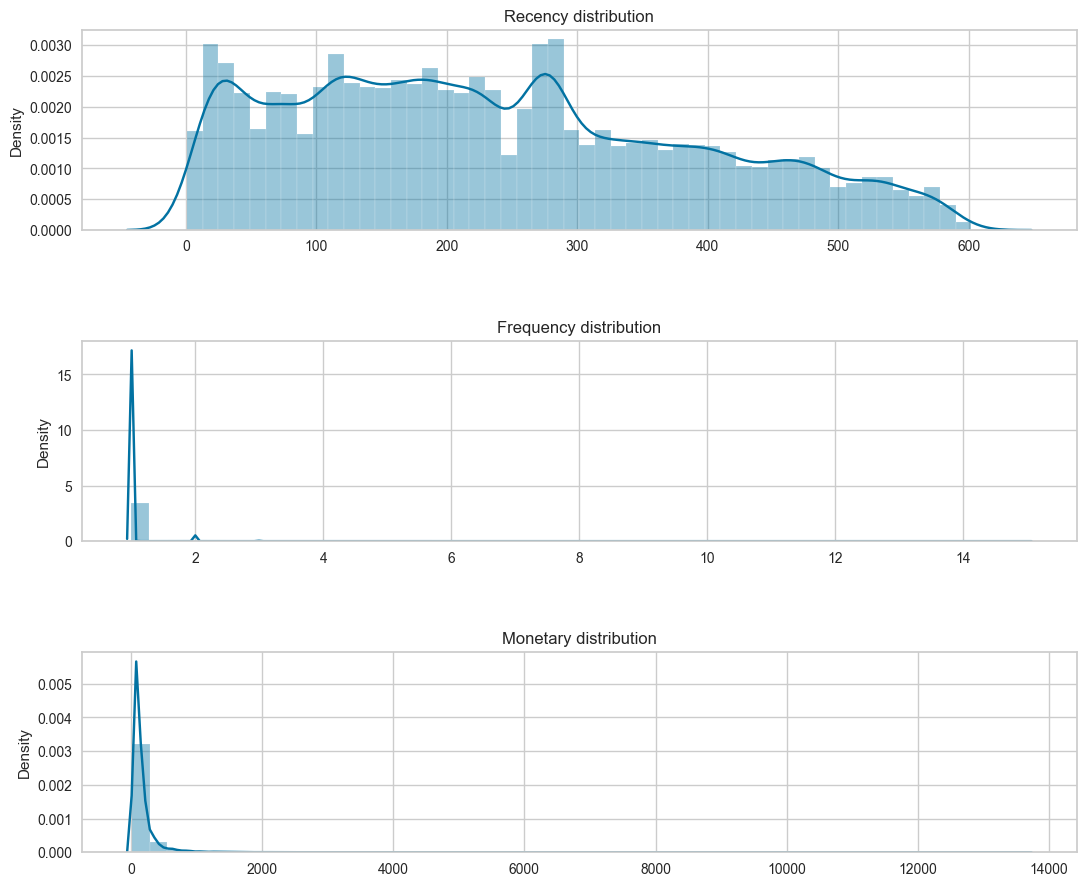

In [133]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

plt.figure(figsize=(12, 10))

#Recency
plt.subplot(3, 1, 1)
sns.distplot(buyer_segmentation['recency'])
plt.title('Recency distribution')
plt.xlabel(None)

#Frequency
plt.subplot(3, 1, 2)
sns.distplot(buyer_segmentation['frequency'])
plt.title('Frequency distribution')
plt.xlabel(None)

#Monetary
plt.subplot(3, 1, 3)
sns.distplot(buyer_segmentation['monetary'])
plt.title('Monetary distribution')
plt.xlabel(None)

plt.tight_layout(pad = 4)

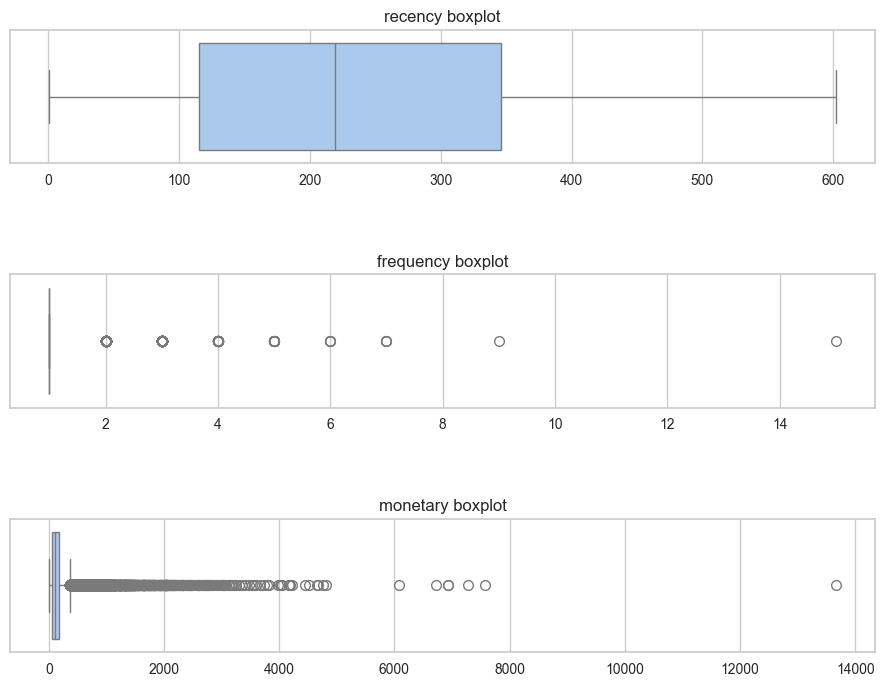

In [134]:
features = ['recency', 'frequency', 'monetary']
n = 1

plt.figure(figsize = (10, 8))

for feature in features:
    plt.subplot(3, 1, n)
    sns.boxplot(x=buyer_segmentation[feature], palette='pastel', orient='h').set(xlabel=None)
    plt.title(f'{feature} boxplot')
    n = n + 1
plt.tight_layout(pad=4)

In [135]:
#Create function to detele extreme outliers
def remove_outlier(input_df, colum_name):
    q1 = input_df[colum_name].quantile(0.05)
    q3 = input_df[colum_name].quantile(0.95)
    iqr = q3-q1     
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    index_outliers = input_df.loc[(input_df[colum_name] < fence_low) | (input_df[colum_name] > fence_high)].index
    input_df = pd.DataFrame(input_df.drop(index_outliers.to_list(), axis=0, inplace=True))
    return input_df
#Apply the function to the columns, except frequency column
for i in ["recency", "monetary"]:
    remove_outlier(buyer_segmentation, i)

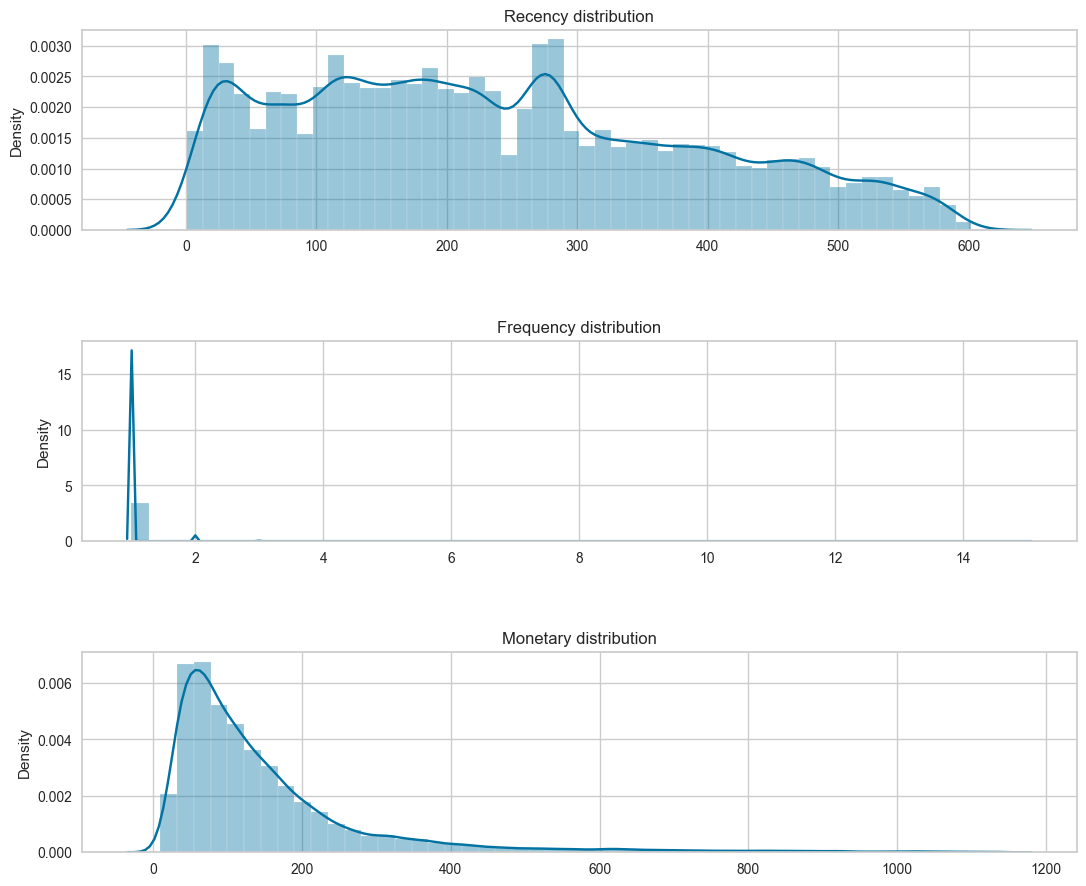

In [136]:
#Distribution plots after eliminating extreme outliers
plt.figure(figsize=(12, 10))

#Recency
plt.subplot(3, 1, 1)
sns.distplot(buyer_segmentation['recency'])
plt.title('Recency distribution')
plt.xlabel(None)

#Frequency
plt.subplot(3, 1, 2)
sns.distplot(buyer_segmentation['frequency'])
plt.title('Frequency distribution')
plt.xlabel(None)

#Monetary
plt.subplot(3, 1, 3)
sns.distplot(buyer_segmentation['monetary'])
plt.title('Monetary distribution')
plt.xlabel(None)

plt.tight_layout(pad = 4)

In [137]:
buyer_segmentation["recency_score"] = pd.qcut(buyer_segmentation['recency'], 5, labels=[5, 4, 3, 2, 1])
buyer_segmentation["monetary_score"] = pd.qcut(buyer_segmentation['monetary'], 5, labels=[1, 2, 3, 4, 5])
buyer_segmentation['frequency'].value_counts(normalize=True)*100

frequency
1     97.015922
2      2.751553
3      0.187312
4      0.027989
5      0.008612
6      0.003230
7      0.003230
9      0.001077
15     0.001077
Name: proportion, dtype: float64

In [138]:
def parse_values(x):
    switch = {
        1: 1,
        2: 2,
        3: 3,
        4: 4
    }
    return switch.get(x, 5)

In [139]:
buyer_segmentation['frequency_score'] = buyer_segmentation['frequency'].apply(parse_values)

In [140]:
buyer_segmentation['rfm_score'] = buyer_segmentation.recency_score.astype(str)+ buyer_segmentation.frequency_score.astype(str) + buyer_segmentation.monetary_score.astype(str)
buyer_segmentation.head()

,customer_unique_id,recency,frequency,monetary,recency_score,monetary_score,frequency_score,rfm_score
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,141.90,4,4,1,414
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,27.19,4,1,1,411
2,0000f46a3911fa3c0805444483337064,538,1,86.22,1,2,1,112
3,0000f6ccb0745a6a4b88665a16c9f078,322,1,43.62,2,1,1,211
4,0004aac84e0df4da2b147fca70cf8255,289,1,196.89,2,4,1,214


In [141]:
buyer_segmentation['segment'] = buyer_segmentation['rfm_score'].replace(buyer_segment, regex=True)
buyer_segmentation.head()

,customer_unique_id,recency,frequency,monetary,recency_score,monetary_score,frequency_score,rfm_score,segment
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,141.90,4,4,1,414,Promising
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,27.19,4,1,1,411,New Customers
2,0000f46a3911fa3c0805444483337064,538,1,86.22,1,2,1,112,Lost customers
3,0000f6ccb0745a6a4b88665a16c9f078,322,1,43.62,2,1,1,211,Hibernating customers
4,0004aac84e0df4da2b147fca70cf8255,289,1,196.89,2,4,1,214,Cannot Lose Them


In [142]:
buyer_statistics = buyer_segmentation[["segment", "recency", "frequency", "monetary"]].groupby("segment").agg(['mean','median', 'min', 'max', 'count'])
buyer_statistics['ratio'] = (100 * buyer_statistics['recency']["count"]/buyer_statistics['recency']["count"].sum()).round(2)
buyer_statistics.map(commas)

recency                           frequency             \
                         mean  median  min  max   count      mean median min   
segment                                                                        
About To Sleep         268.12  268.00  178  381   7,107      1.00   1.00   1   
At Risk                380.36  365.00  269  602     761      2.09   2.00   2   
Cannot Lose Them       408.10  407.00  269  602  17,362      1.00   1.00   1   
Champions               81.96   77.00    7  177      27      4.93   4.00   4   
Hibernating customers  317.82  312.00  178  602   7,743      1.03   1.00   1   
Lost customers         471.03  466.00  382  602   7,723      1.00   1.00   1   
Loyal                  169.48  166.00   95  256      61      3.33   3.00   3   
Need Attention         201.96  209.00    2  268     518      2.11   2.00   2   
New Customers          117.56  116.00    1  268  18,236      1.00   1.00   1   
Potential Loyalist     176.14  179.50    3  265     144      2.03   2.00   2   
Promising              131.86  131.00    1  268  33,211      1.03   1.00   1   

                                  monetary                                    \
                      max   count     mean  median     min       max   count   
segment                                                                        
About To Sleep          2   7,107    88.28   86.24   39.34    130.57   7,107   
At Risk                 6     761   314.44  257.58   73.48  1,069.77     761   
Cannot Lose Them        4  17,362   234.70  177.72   86.61  1,133.96  17,362   
Champions              15      27   618.29  583.10  232.57  1,115.71      27   
Hibernating customers   3   7,743    57.06   57.68   10.07    130.14   7,743   
Lost customers          3   7,723    55.07   55.01   12.28     86.60   7,723   
Loyal                   9      61   476.23  416.39  209.79  1,038.72      61   
Need Attention          3     518   306.33  254.09  131.20  1,131.08     518   
New Customers           2  18,236    51.18   49.03    9.59     86.60  18,236   
Potential Loyalist      3     144   108.79  108.75   86.61    130.58     144   
Promising               2  33,211   211.75  160.51   35.94  1,135.89  33,211   

                       ratio  
                              
segment                       
About To Sleep          7.65  
At Risk                 0.82  
Cannot Lose Them       18.69  
Champions               0.03  
Hibernating customers   8.34  
Lost customers          8.31  
Loyal                   0.07  
Need Attention          0.56  
New Customers          19.63  
Potential Loyalist      0.16  
Promising              35.75

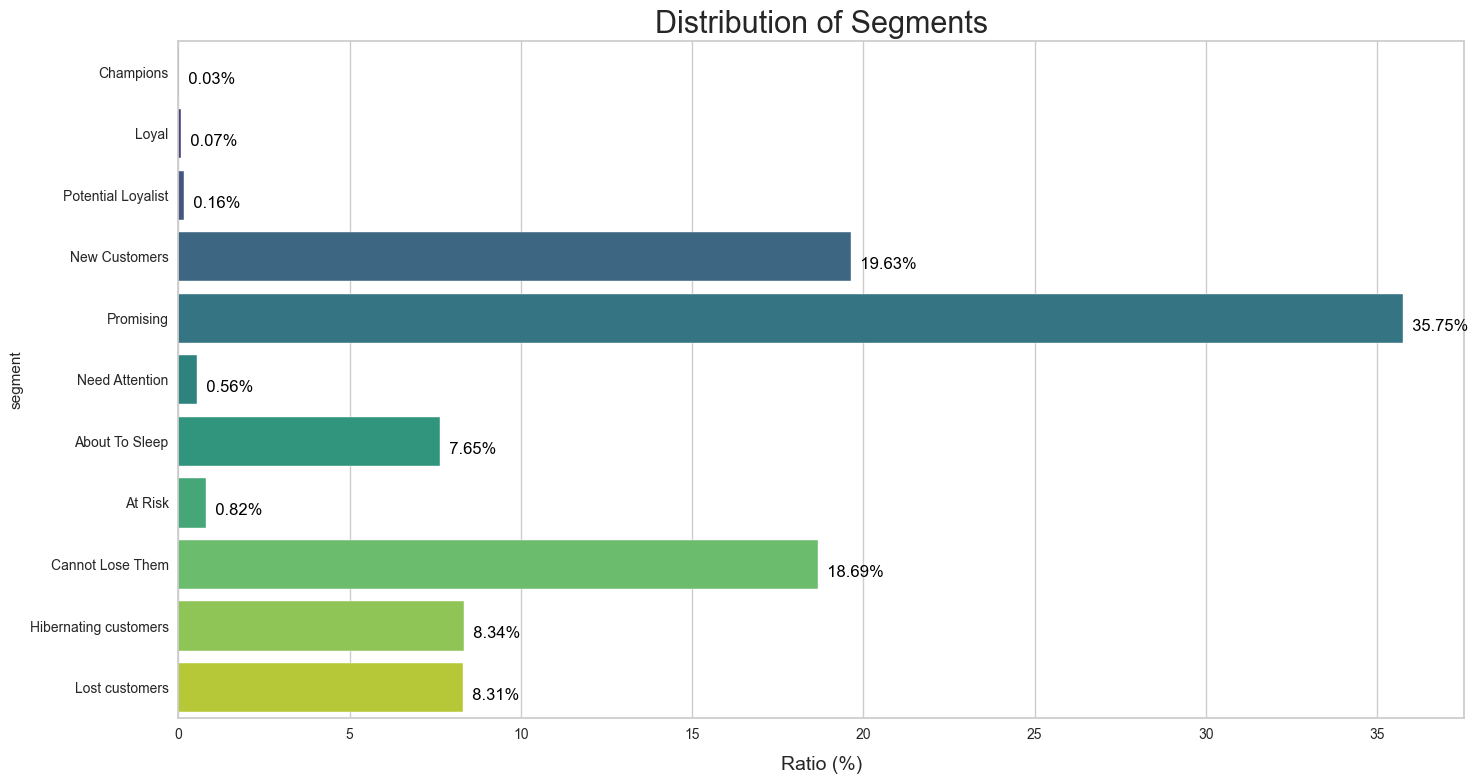

In [143]:
buyer_statistics['Segment'] = pd.Categorical(buyer_statistics.index, categories=buyer_segment_order, ordered=True)
buyer_statistics = buyer_statistics.sort_values(by="Segment")

plt.figure(figsize=(15,8))

plot = sns.barplot(x = 'ratio', y = buyer_statistics.index, data = buyer_statistics, palette = "viridis")
for i, v in enumerate(buyer_statistics['ratio']):
    plot.text(v, i+.20,"  {:.2f}".format(v)+"%", color='black', ha="left")

plt.title('Distribution of Segments', fontsize=22)
plt.xlabel('Ratio (%)', fontsize=14, labelpad = 10)
plt.tight_layout()

## Seller Segmentation

In [144]:
recency_df = merged_clean.groupby(['seller_id'], as_index = False)['order_purchase_timestamp'].max()
recency_df.head()

,seller_id,order_purchase_timestamp
0,0015a82c2db000af6aaaf3ae2ecb0532,2017-10-18
1,001cca7ae9ae17fb1caed9dfb1094831,2018-07-12
2,001e6ad469a905060d959994f1b41e4f,2018-08-07
3,002100f778ceb8431b7a1020ff7ab48f,2018-04-12
4,004c9cd9d87a3c30c522c48c4fc07416,2018-05-01


In [145]:
recency_df['recency'] = recency_df['order_purchase_timestamp'].apply(lambda x: (current_date - x).days)
recency_df.head()

,seller_id,order_purchase_timestamp,recency
0,0015a82c2db000af6aaaf3ae2ecb0532,2017-10-18,316
1,001cca7ae9ae17fb1caed9dfb1094831,2018-07-12,49
2,001e6ad469a905060d959994f1b41e4f,2018-08-07,23
3,002100f778ceb8431b7a1020ff7ab48f,2018-04-12,140
4,004c9cd9d87a3c30c522c48c4fc07416,2018-05-01,121


In [146]:
frequency_df = pd.DataFrame(merged_clean.groupby(["seller_id"], as_index = False).agg({"order_id":"nunique"}))
frequency_df.rename(columns={"order_id":"frequency"}, inplace=True)
frequency_df.head()

,seller_id,frequency
0,0015a82c2db000af6aaaf3ae2ecb0532,3
1,001cca7ae9ae17fb1caed9dfb1094831,200
2,001e6ad469a905060d959994f1b41e4f,1
3,002100f778ceb8431b7a1020ff7ab48f,50
4,004c9cd9d87a3c30c522c48c4fc07416,147


In [147]:
monetary_df = merged_clean.groupby('seller_id', as_index=False)['total_sales_value'].sum()
monetary_df.rename(columns={"total_sales_value":"monetary"}, inplace=True)
monetary_df.head()

,seller_id,monetary
0,0015a82c2db000af6aaaf3ae2ecb0532,2748.06
1,001cca7ae9ae17fb1caed9dfb1094831,34098.69
2,001e6ad469a905060d959994f1b41e4f,267.94
3,002100f778ceb8431b7a1020ff7ab48f,1985.06
4,004c9cd9d87a3c30c522c48c4fc07416,21227.99


In [148]:
seller_segmentation = recency_df.merge(frequency_df, on='seller_id')
seller_segmentation = seller_segmentation.merge(monetary_df, on='seller_id')
seller_segmentation.head()

,seller_id,order_purchase_timestamp,recency,frequency,monetary
0,0015a82c2db000af6aaaf3ae2ecb0532,2017-10-18,316,3,2748.06
1,001cca7ae9ae17fb1caed9dfb1094831,2018-07-12,49,200,34098.69
2,001e6ad469a905060d959994f1b41e4f,2018-08-07,23,1,267.94
3,002100f778ceb8431b7a1020ff7ab48f,2018-04-12,140,50,1985.06
4,004c9cd9d87a3c30c522c48c4fc07416,2018-05-01,121,147,21227.99


In [149]:
seller_segmentation.drop(columns='order_purchase_timestamp', inplace = True)
seller_segmentation.head()

,seller_id,recency,frequency,monetary
0,0015a82c2db000af6aaaf3ae2ecb0532,316,3,2748.06
1,001cca7ae9ae17fb1caed9dfb1094831,49,200,34098.69
2,001e6ad469a905060d959994f1b41e4f,23,1,267.94
3,002100f778ceb8431b7a1020ff7ab48f,140,50,1985.06
4,004c9cd9d87a3c30c522c48c4fc07416,121,147,21227.99


In [150]:
seller_segmentation.map(commas)

,seller_id,recency,frequency,monetary
0,0015a82c2db000af6aaaf3ae2ecb0532,316,3,"2,748.06"
1,001cca7ae9ae17fb1caed9dfb1094831,49,200,"34,098.69"
2,001e6ad469a905060d959994f1b41e4f,23,1,267.94
3,002100f778ceb8431b7a1020ff7ab48f,140,50,"1,985.06"
4,004c9cd9d87a3c30c522c48c4fc07416,121,147,"21,227.99"
...,...,...,...,...
2993,ffcfefa19b08742c5d315f2791395ee5,68,1,79.52
2994,ffdd9f82b9a447f6f8d4b91554cc7dd3,11,18,"2,828.66"
2995,ffeee66ac5d5a62fe688b9d26f83f534,108,14,"2,259.55"
2996,fffd5413c0700ac820c7069d66d98c89,4,59,"12,187.04"


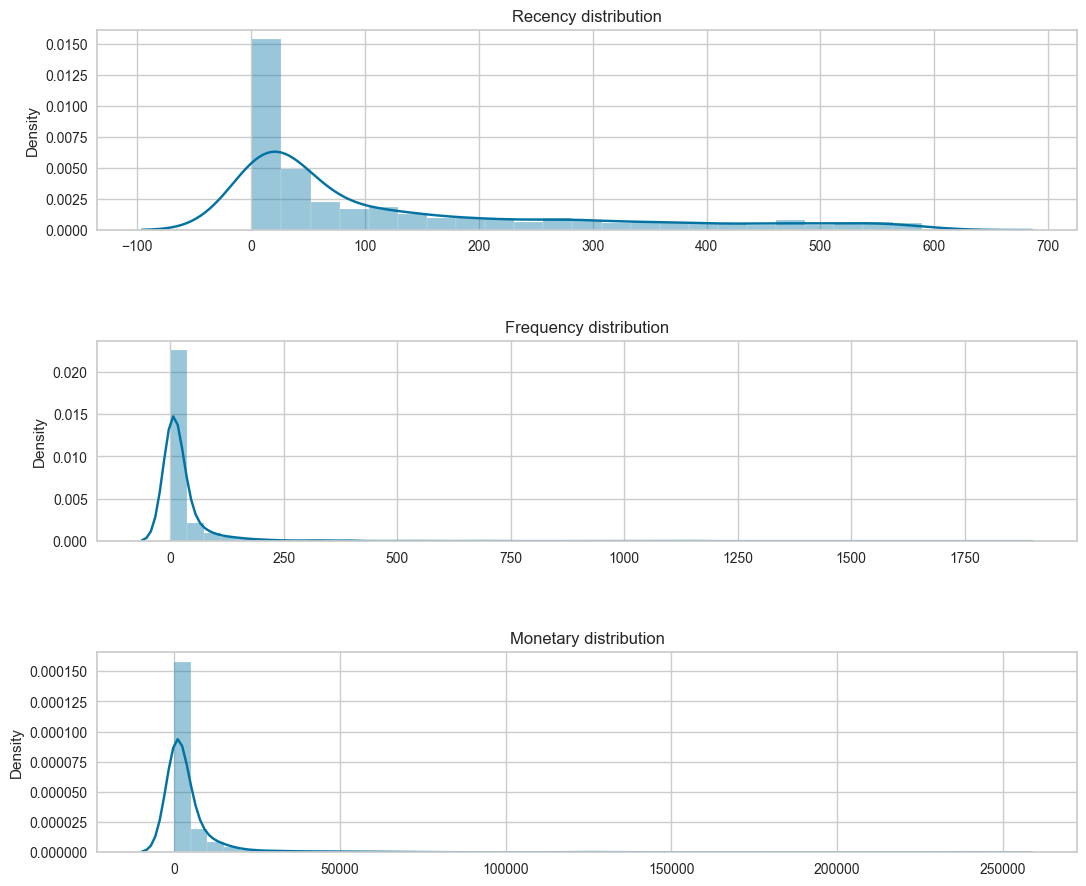

In [151]:
plt.figure(figsize=(12, 10))

#Recency
plt.subplot(3, 1, 1)
sns.distplot(seller_segmentation['recency'])
plt.title('Recency distribution')
plt.xlabel(None)

#Frequency
plt.subplot(3, 1, 2)
sns.distplot(seller_segmentation['frequency'])
plt.title('Frequency distribution')
plt.xlabel(None)

#Monetary
plt.subplot(3, 1, 3)
sns.distplot(seller_segmentation['monetary'])
plt.title('Monetary distribution')
plt.xlabel(None)

plt.tight_layout(pad = 4)

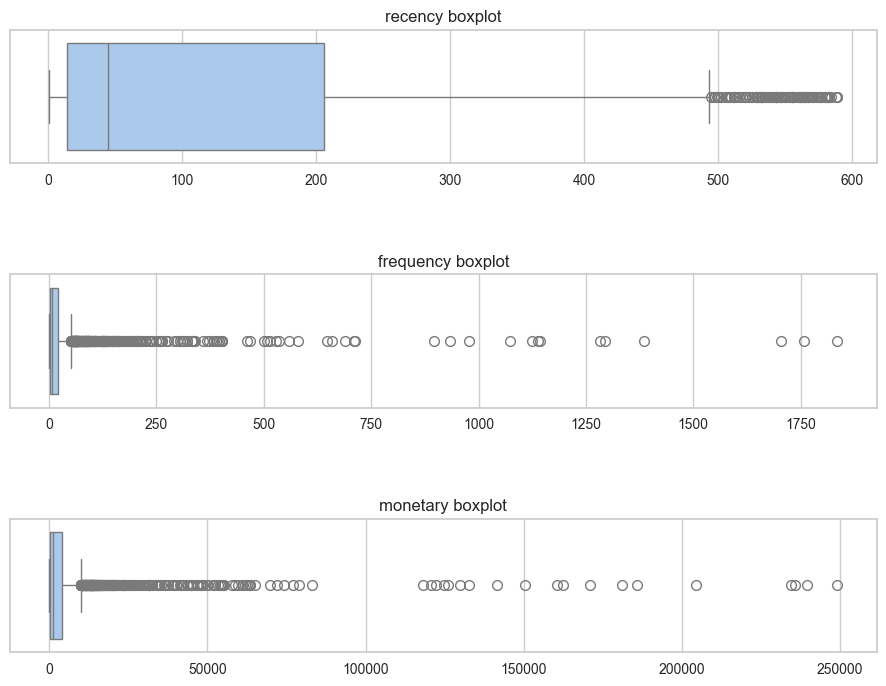

In [152]:
features = ['recency', 'frequency', 'monetary']
n = 1

plt.figure(figsize = (10, 8))

for feature in features:
    plt.subplot(3, 1, n)
    sns.boxplot(x=seller_segmentation[feature], palette='pastel', orient='h').set(xlabel=None)
    plt.title(f'{feature} boxplot')
    n = n + 1
plt.tight_layout(pad=4)

In [153]:
def remove_outlier(input_df, colum_name):
    q1 = input_df[colum_name].quantile(0.05)
    q3 = input_df[colum_name].quantile(0.95)
    iqr = q3-q1     
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    index_outliers = input_df.loc[(input_df[colum_name] < fence_low) | (input_df[colum_name] > fence_high)].index
    input_df = pd.DataFrame(input_df.drop(index_outliers.to_list(), axis=0, inplace=True))
    return input_df

for i in ["recency", "monetary"]:
    remove_outlier(seller_segmentation, i)

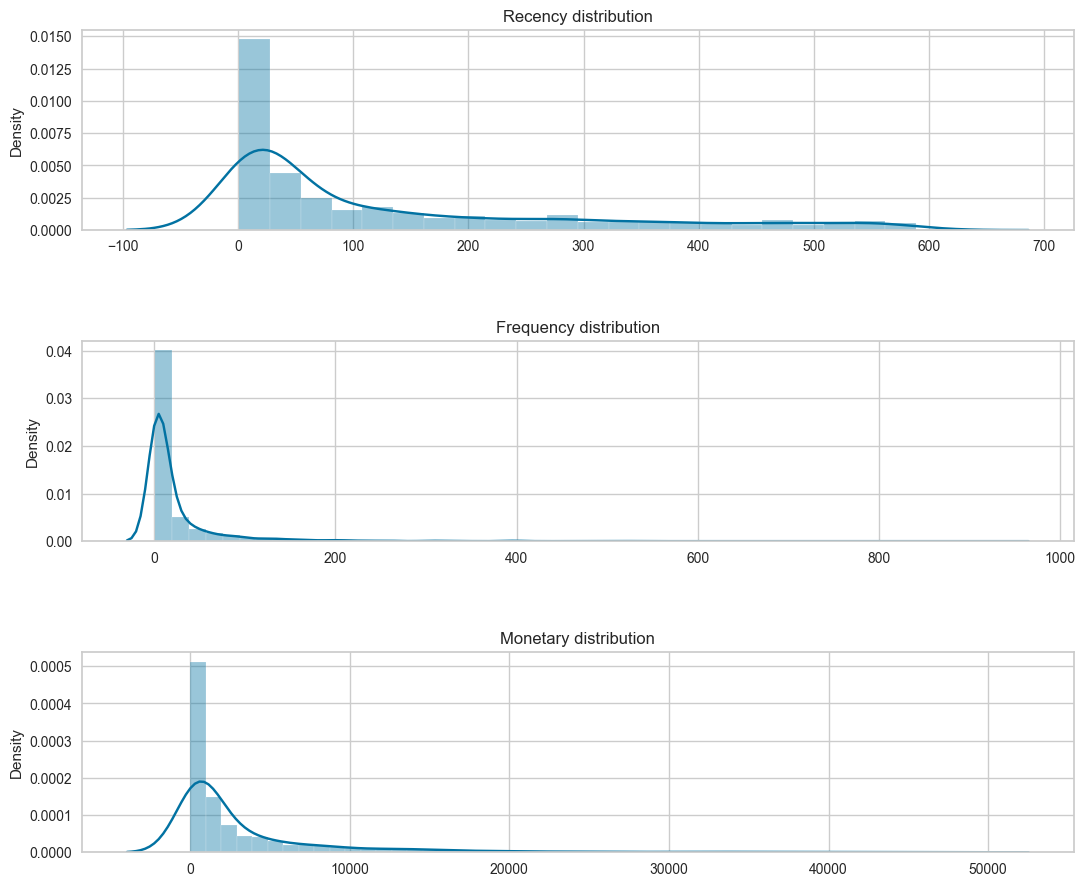

In [154]:
plt.figure(figsize=(12, 10))

#Recency
plt.subplot(3, 1, 1)
sns.distplot(seller_segmentation['recency'])
plt.title('Recency distribution')
plt.xlabel(None)

#Frequency
plt.subplot(3, 1, 2)
sns.distplot(seller_segmentation['frequency'])
plt.title('Frequency distribution')
plt.xlabel(None)

#Monetary
plt.subplot(3, 1, 3)
sns.distplot(seller_segmentation['monetary'])
plt.title('Monetary distribution')
plt.xlabel(None)

plt.tight_layout(pad = 4)

In [155]:
seller_segmentation["recency_score"] = pd.qcut(seller_segmentation['recency'], 5, labels=[5, 4, 3, 2, 1])
seller_segmentation["monetary_score"] = pd.qcut(seller_segmentation['monetary'], 5, labels=[1, 2, 3, 4, 5])
seller_segmentation['frequency'].value_counts(normalize=True)*100

frequency
1      19.057308
2      11.291963
3       7.019329
4       5.256019
5       5.188199
         ...    
321     0.033910
192     0.033910
185     0.033910
191     0.033910
116     0.033910
Name: proportion, Length: 204, dtype: float64

In [156]:
def parse_values(x):
    switch = {
        1: 1,
        2: 2,
        3: 3,
        4: 4
    }
    return switch.get(x, 5)

seller_segmentation['frequency_score'] = seller_segmentation['frequency'].apply(parse_values)
seller_segmentation['rfm_score'] = seller_segmentation.recency_score.astype(str)+ seller_segmentation.monetary_score.astype(str) + seller_segmentation.frequency_score.astype(str)
seller_segmentation.head().map(commas)

,seller_id,recency,frequency,monetary,recency_score,monetary_score,frequency_score,rfm_score
0,0015a82c2db000af6aaaf3ae2ecb0532,316,3,"2,748.06",1,4,3,143
1,001cca7ae9ae17fb1caed9dfb1094831,49,200,"34,098.69",3,5,5,355
2,001e6ad469a905060d959994f1b41e4f,23,1,267.94,4,2,1,421
3,002100f778ceb8431b7a1020ff7ab48f,140,50,"1,985.06",2,4,5,245
4,004c9cd9d87a3c30c522c48c4fc07416,121,147,"21,227.99",2,5,5,255


In [157]:
seller_segmentation['segment'] = seller_segmentation['rfm_score'].replace(seller_segments, regex=True)
seller_segmentation.head().map(commas)

,seller_id,recency,frequency,monetary,recency_score,monetary_score,frequency_score,rfm_score,segment
0,0015a82c2db000af6aaaf3ae2ecb0532,316,3,"2,748.06",1,4,3,143,At Risk Seller
1,001cca7ae9ae17fb1caed9dfb1094831,49,200,"34,098.69",3,5,5,355,Reliable Seller
2,001e6ad469a905060d959994f1b41e4f,23,1,267.94,4,2,1,421,New Seller
3,002100f778ceb8431b7a1020ff7ab48f,140,50,"1,985.06",2,4,5,245,At Risk Seller
4,004c9cd9d87a3c30c522c48c4fc07416,121,147,"21,227.99",2,5,5,255,At Risk Seller


In [158]:
seller_statistics = seller_segmentation[["segment", "recency", "frequency", "monetary"]].groupby("segment").agg(['mean','median', 'min', 'max', 'count'])
seller_statistics['ratio'] = (100 * seller_statistics['recency']["count"]/seller_statistics['recency']["count"].sum()).round(2)
seller_statistics.map(commas)

recency                        frequency                  \
                      mean  median min  max count      mean median min  max   
segment                                                                       
At Risk Seller      251.95  214.00  94  583   513     17.57   9.00   2  304   
Developing Seller    18.77   10.50   1   88   310      6.56   5.00   1   31   
Inactive Seller      98.28   82.00  29  265   149      1.81   1.00   1    4   
New Seller           33.12   25.00   2   92   201      1.25   1.00   1    2   
Problematic Seller  321.76  321.00  29  589   645      2.65   2.00   1  188   
Reliable Seller      42.65   37.00  13   93   422     25.46  12.00   3  298   
Rising Star          19.75   19.00   3   93    55      2.44   3.00   1    4   
Star Seller          12.17   11.00   1   28   654     68.43  41.00   4  934   

                          monetary                                       ratio  
                   count      mean    median       min        max count         
segment                                                                         
At Risk Seller       513  2,998.32  1,564.72    210.57  46,704.13   513  17.40  
Developing Seller    310    575.71    461.16     84.01   1,570.53   310  10.51  
Inactive Seller      149    496.94    321.34     52.62   2,818.74   149   5.05  
New Seller           201    143.84    114.57     19.29     606.45   201   6.82  
Problematic Seller   645    689.77    182.59     12.22  37,657.77   645  21.87  
Reliable Seller      422  4,502.20  1,793.70    612.39  48,218.41   422  14.31  
Rising Star           55  1,406.14    843.93    242.23   7,939.25    55   1.87  
Star Seller          654  9,633.64  6,259.88  1,600.88  48,555.10   654  22.18

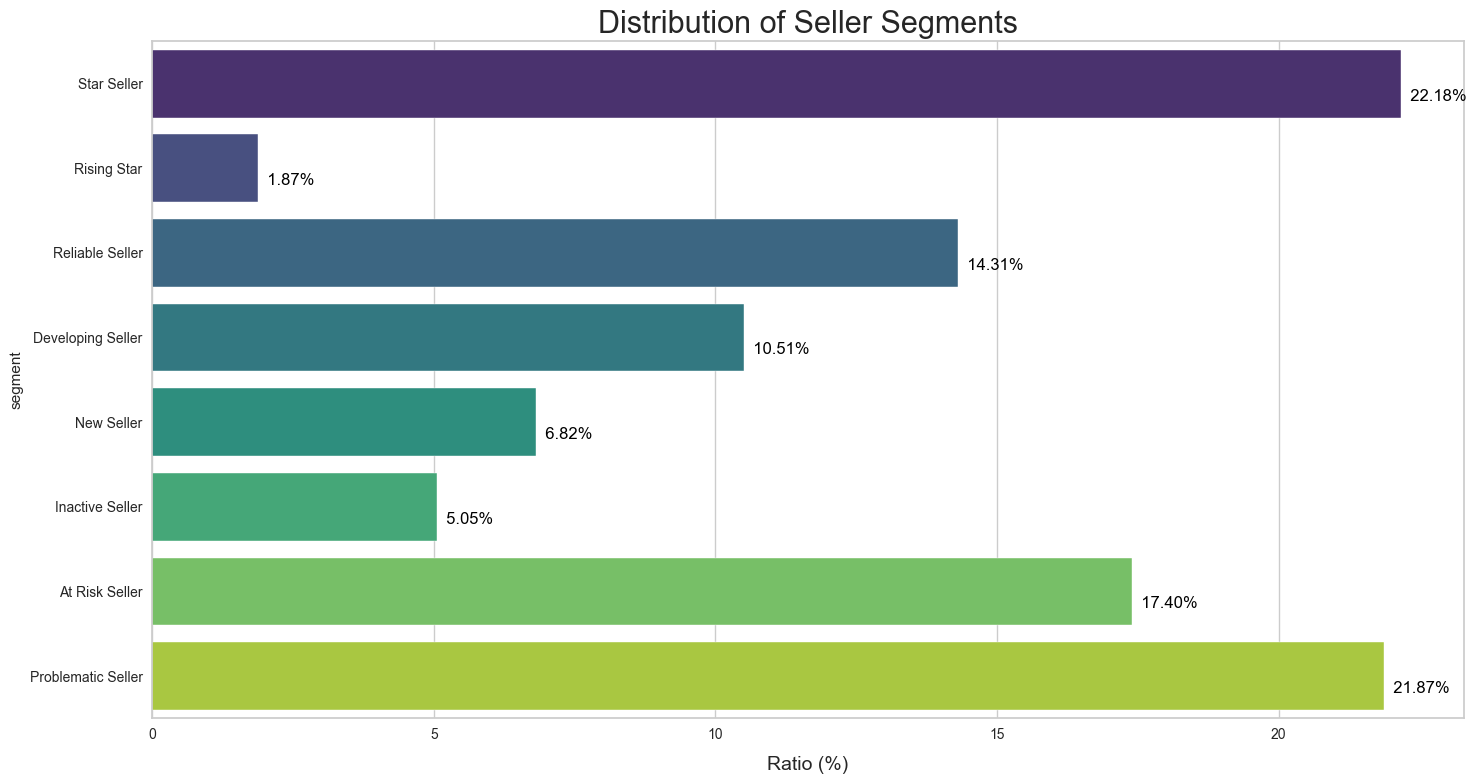

In [159]:
seller_statistics['Segment'] = pd.Categorical(seller_statistics.index, categories=seller_segment_order, ordered=True)
seller_statistics = seller_statistics.sort_values(by="Segment")

plt.figure(figsize=(15,8))
plot = sns.barplot(x = 'ratio', y = seller_statistics.index, data = seller_statistics, palette = "viridis")

for i, v in enumerate(seller_statistics['ratio']):
    plot.text(v, i+.20,"  {:.2f}".format(v)+"%", color='black', ha="left")
plt.title('Distribution of Seller Segments', fontsize=22)
plt.xlabel('Ratio (%)', fontsize=14, labelpad = 10)
plt.tight_layout()

# Extract to CSV

In [170]:
# df_clustering_customer = df_clustering_customer.drop(columns=['year'])
# df_clustering_customer.to_csv(r'C:\Users\farid\VSCode\ecommerce_brazil_cleanest.csv', index = False)

In [171]:
# seller_segmentation.to_csv(r'C:\Users\farid\VSCode\seller_segmentation.csv', index=False)
# buyer_segmentation.to_csv(r'C:\Users\farid\VSCode\buyer_segmentation.csv', index=False)